

```
# This is formatted as code
```

# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [1]:
# Fetching base64 string
import base64
with open("790-1000x500.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAOgDAAADoAQAAQAAAPQBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDc5MP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAfQD6AMBIgACEQEDEQH/xAAaAAACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAe3ppnl6jWxtmc2BmmapYK1It6AIQNZmKtZY9UZ9GPaPYB3MklkkhJISSFCVRnZF51VKfKdyrDJN0WdzThr9CqzmMrXnWLTsCwctdCOD2k8uuzgPbCmlyK7Kju58gGhN0zrcj0Oa56pIvTC1JclkkhIBFyQkkJJCSQkkJJCSQkkJJCSQkkJJCSQkkJJCSQkkJJCSQlXKXn2TNx65Fvk9QJM1jqlZM2nc5+nn3jXXz6F7xnmaS68G5WdP0ZySLvOutCM6ECa3NEzVWh2Zma61gXu5+k6loeXKu5kkJJCSQklEEl5o3RynJNwYa4jBFTClw7NoOznntTKUxlGxTRpAP48dRL8ZOtytR55GrJs3pcfZL2HYujzp2c3mWK0bWbHL1AyOzrVeZm8stdoV

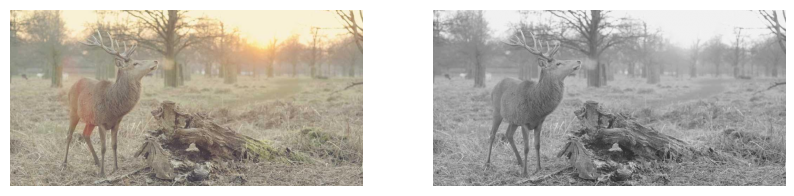

In [2]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2
# PASTE BASE64 STRING HERE
base64_image = """/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAOgDAAADoAQAAQAAAPQBAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDc5MP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAfQD6AMBIgACEQEDEQH/xAAaAAACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAe3ppnl6jWxtmc2BmmapYK1It6AIQNZmKtZY9UZ9GPaPYB3MklkkhJISSFCVRnZF51VKfKdyrDJN0WdzThr9CqzmMrXnWLTsCwctdCOD2k8uuzgPbCmlyK7Kju58gGhN0zrcj0Oa56pIvTC1JclkkhIBFyQkkJJCSQkkJJCSQkkJJCSQkkJJCSQkkJJCSQkkJJCSQlXKXn2TNx65Fvk9QJM1jqlZM2nc5+nn3jXXz6F7xnmaS68G5WdP0ZySLvOutCM6ECa3NEzVWh2Zma61gXu5+k6loeXKu5kkJJCSQklEEl5o3RynJNwYa4jBFTClw7NoOznntTKUxlGxTRpAP48dRL8ZOtytR55GrJs3pcfZL2HYujzp2c3mWK0bWbHL1AyOzrVeZm8stdoV1NS5ISSEkhJISSEkhJISSEkhJISSEkhJISSEkhJISSEkhJIVRDAcnt42lrtuQc0Bb9RKvfPjw5i8xnO27nWPGGNOrFNS9PP2VLSQsqmsmeZ4YyZoaEkbtfL6Obpur1mSQkgFiK8a00ldPz1il6bObpHzK6tKpmk1HzWrsyMuKYabG8/VnmmnWKMvZVzNTs8u25uD0HluzuYN+XnQlTFdD/QczbjW2c0Mu6XE62sOoEGleIc76A810u48VJtLG2Qn4r03Sp0xdSJLqFyQkkJJCSQkkJJCSQkkJJCVdFyoXKskkJJCSQkkJJAbsYrFqqaDidJcu3Vwu5qJj4nm1Zz1OoOPRnegGIlzNSGsOpNajaoRg2wKpIjEOVvRwuxrezMaNtR6hVBKSN43SW4jXzNWPWbfz207ZzajbWZS7aGS3pylHRodMIVs51gll7C4MnYs46uiEYaV1NOdkHVrOMbu3dWvoc7zerptOeHVAw30s8vHdodNcrUTLI7PM3RBuH5GJ1noXJvFjefFaxDQ5V9cyVZJISSEkhJISSEkhJKJKvNupLLklKqHz2mjbUoprAFdlCcF2cOUntZc7wcv0vOVOrH37EzkwwWLuvPqa+Lr5bdWvLNYM3UVvOOjdqZIa7GULYqgljbGS7N/LbjfSidMrapdyYXeaixzNXzm1vGLp83drGAjWussu+XRzWZM61Lx1qdLq+dLLr5+e+Xo5DQvWiDl1CAlqXkTGrVi6Zfi0AKaths6GEc30wcApeq3CrN6A8Vup0UUOdaUqg9/K0S6rxw6eXNR2i5bJN1YNcaqz6NZKXW8SxIuVekkiSSEq6W5IkkhBsc24quenxbOkuSaykdCOe16segO1DqPsD1JIqLJMzpiSs52fq85cW7njp3pwpki6rvxfQFNbbyXnXRQmhtLpHZ5VjqLOS6qxzsj5dD0uxtpYyNF5wXoDgORmd2HUApW86cmpFj8b05q9mWDkbLlxBpWoG5IJatEvLbr5NjNGUDp1y2RuHMdFSqBzas5TlGa1SRo1ZWqzJToQY1TokpaaYRGAxW7s7saZmWwU3OctsVolLTi1yEec2dBVOnO4BF3U3m6kWBA5aM1M1LihW1rnPpZZ2W7TWfXjVxVjsb8WdaqBedbok9ZuKUahTUuhABbFZxsdniNAoGCJoiJFldOQnCWiuRUuEEoUJClwYXY0p3VmwM9SutbaKBSmslSESxowCk0swWakB0ZcEddj0OzSvzuzmpDaW9GF8oZ9eZLW1dAt9C3gMm8sRS1l15rVmpwWi5DABKsJ+iXON1YVVUE1Fqdr2C9vOdnV0IjKjZaatudJcl0NJY5uo8h5zpLOxl1rLpzIaTKaxDHXalc6RbFqaNaw0bEyzVo5rk6l802WIvKvVvLEc1DiAOCmzOehrFVkqRJRggI05q1zNC5Jvnd0SyiouDQQEJIIoyquKElSutTArEqJioFBJSoXICurimsouq5CzGIB2XSht3rSYS164Ezz0QpgwNSJZcpHqE1RZmnPY/OacwjNUwDNIVC9FWFa4XI4VHJluqoo6uW4MVkCQ4llK5ua5pjEXK8Ama213mtNV5OtNyNWI1BGrdNJDeYMHcgwNSVV2FdWVJVloYpH2MHNRolzo05UZa7slVVFUll0ECC4zmhQZIWsyWIVjCSUGI2SioqrqWJeuIdGEVXbIRKEdViqdSKuDEuUSjGIN3VUYiQelVdXFS9TmCyxx59EBUokuwDIhYuGAHQK50dJGbiYygNCzuWMTZZCbQkJB3ABhxV3VxVFUtFClhhJWWJLCCwpUlKwuUyUWdNtRIS7WXSzsIbDUuqG5lVeoN1aFRKJINGowGXYhNVdFQVJKGrCqrqrqiwIGSsSqpcQaIbLtZFwYXUKpJcVRiFV1FLahSYnRFsC2zsbqyCIS5dzQ2SLjRKBoSgRQgkAFMVKyIdVc/t5ytily7a4vQs0RTizEJG4NammiQynLmapblRldlfrLKW/UExco0ylANCxcYqLOjlgaQFCa86IaKUiCBwSorqBQSlowuUoN1Kgkfn0MgtqqqmVrKwcIuUaWJHYiOWKq6GWxRd2dgqYMDRjoMIUqXAVsAK7lgy4BYlJYmdJjqAt0Ex0pEeEDKGCU9Mq2gedtOnWqja1F0yxI6BuUx1srpsFUapTEqIBDlNePWuSUNupUAbUZDiCtQiUsfWdUrby7oNJBY5mSZ1pzUmFac2us+3DuuYYnRUJ1KYstOvFNE5D4eiNMlgeKJVFOxMC6lrLlWXY3LRLMuSVQMTgTsr7DGVoVVVkgyxbAKCuhoqomVja5dAS7GSqqXUIBjUWwUUQmDQ3DaYNKjImU7aJbZwBZCrRTLhRMeZ19fDWJZ1FqaqBaB53qdW/TnBvzKmOqVYvG5TH0iY6jODV2S7sETCK1ZdMvKYB61ptRsvtNw8FgpCLZVmMs0kLrM4aFQpOjPFBcitWPYZ9uPTo2wIJpXBpOjXyNalz6lEtsSQglnkQGMpNSwEzKnLsNymouAIXZ0FkeolGvNgLlaaVTKsGOK3JH1ZlImQFuK5y20BAuVDREKfVXUOoCVGUGgLMp2yMVlY4dK6TGwXpQ/KXIKz7YqnLIu5CkPhjm2GFG/npHKZnW3ZkbRhVy1LBaSoLXNRbOosh2AnUpKmdS7W4tCNF2KMZmrY4Iw8lOlWQnKzpLalDdWSjCBFpGLNtyCQMQdebQCcaCbrGEMlKCQInSrhWSwhVNEzAQxbVNHMWwkqlISgsrsoqsESEu6pDpVDYmh1KobS4OJEuXiuBIdSoTuGsdbKROirClUHF0MsISxEZE3TImGgjAhDYdBIopQUlFwbDCqAxaJWYzPOnacesuCBWSltiamKyhlzDXdyxEEBBitvU1NKIFzQEFWJqGszNzpq9CDrvyNzGhBsMkMDg1CsmpaYl9BNufQGmE6Clui8roYIRWXRIMqySxWiuiwshI6IIJqiOzVD7Qs12pgVIcXFLNQqZEq5QCYEqUXUoKVBlrO5IGCtEBEAhtuxoCyjJxRhUdAqZjp+FzTGXRExTdASugxlwBXCXLJBsq6oIVtBMCClqaK0hLpQeWKWQtSxfbBsbLobZAalgwDDkG5YA0WFSjChCkZNNND46JQcx1KiNCANEKIJFasjouwpTCpIYmsWdErLQSLHUSZ22RExQ0s5KdrZLotTSrghLuEgwu6suDUHQCNFdDAGUVVUFdQuS7IcBGnju3TS6QhhFZdtGNzhKNQ02UwzsdYAsgpbaBkhCWFagUcQl2Mmchyyokg0ZikZEUPRYzVuVcWu5NLAwlYdVoIlBdkNlJcNyiSqZS2M2NS1ZDSGIErGodm27PpOlTKzMY7gRdPqqOxLgQJbagRaFVJQUAi7VZcCxkUcEWcxlVYRLMklg1ILZVNSxoZapBWukYIwupay6hUOUFnUXKAM877LqAhWJUVSEIIVdlApmWt0yMDYFD6CofS7o4CxsXAbYFSpYqzAO1ENAbBI6CoxM8dQIuuXLHqmoBrhdXU09Lk6FcsASGygoLlVXKqyXY0QqWwu7JdErWIblXVy64kFbLQgB3nY1p0ZM6aA54r03cWJ375+mGyjZAWKUhIgbGrTqiRMKouCKsgEgyoslESQpallQ05ZREYgjohroaClBnnuti8mmLvOVOOjkEGUim0FoC0JIS2Ud1ZlrQoIgsdeWGkQUaaqqNTkgyoNNSh91QwDEUZ0AdKNEQQyqEEkrNajoMxuUVXedZqGprXn05qMlMURlXKGQN5mdi0YhoWyoQBrMku4mhXVlYdrkluq5SLrMscuapQ4aEXiU5El6VppOieakbdJXTFVIQ3SnF1Y2oEXGDbDxhG1amkImC7si5QBqctBtZW0SjFNCKVEUhCR2IZEDUjVrSxuhxSyExQNw7FRqkOAQkXwXGmIZBCtA0+l2WFyLmeVqqXBC0CWaaK6WHRXCSass4gaEYWFKNDMDyAxOdoGDnexJqCgS2CF1Kla5rlyxQkBdAyrEBDdp6eSdNlMrKWAFwMoC8yac2qhunmBacm7LKRmYN2LPp3nci47iOTuhj86qPRhhoZnhsIc8NBRlIcIGrLoNB57NBoAeGUDRnNak7O5KpwgkajRWax0RDRePXZePbjWmqeRoCzcQTTlME1qU5kBOxTZdDdrGLozPGQKBIagF0+KhpITi4ahg08SvQkoQA0GDA1tOsbgqCohqqZUAnXlzrINqnTQ0XCKNLQnKsEbHXOVagQMNSpdqOzL2MzWAtZNcscohAtywQbWdHyehVc6MlZNh1CmBZjNA6dBbqkxnnXo3ooCXTQ6Ix6NJmW9AFG0EUJpl0IpFaWIdAjsAzzTZml2qyOkMmDc0BqmowIEKWgNuqPn9NYENYRqtlUdSrYsTTVBZou6CURRCz6AbESqiDTY3SdA0BCgunBFPzOCYoi7zMGaMrAqhJYBUHYEEFNWhuVWHocqXNU6WemmyG5Vzd3NnQSReq+ujnvLJm6WGpFkgkjda3t8/ZiHBbcg/NrhMglKhKefVkGCsFWTVDUWxE3eVEAbdacY6MzloXs6TUhmbN03mKXezPcHk0rC0ckq6UrWJZEmgTqKYRiqO7lVvsx530VFwPM1LQPrSJNbQ2qjJRuE0RdFtS0INKoUYktiV2DRqVhpYhWBFhDBS1amt0sz1pVC5plLsTyQb21iZpSENEQaAZaTkYumAGxYu5JbpbKLl6Mi12cO+CGwXmKlz0J6GXr3Gjk9HDeWW066waOnDz2gxt6bYEy5mRg1qQDIRkDRMisCYrNQ5xqDiz1s1YtMuq0rzB05g1rY3A+Nb+eFnZXyyNilhLovE8zlrygrsRrFNNC811v0cpx0WJuQhqSR6KGiZVmp9GZjzM5MguPhlI2GQdYwmaIAqc40jicaWGiTavOC7F1dWYVRwbKtpC8ejMujRlcWKWIyJhoAaGVLi2LsAjoIaKgZdCxpwkjIzGtwl1FGPE/LddAHUyiZwW5Fzpv15dlwQWpnlaE6GtwE6Z5CXBddRZkyrSpihYRYwWMlacx0sXM01lT1VVyuoeM28/q4hNXlghQOrslaM3OTTF24AdmOQWrnuNBJIYtbzIzoIMy7ultIw2qCNp42TO0eU6t5gcXRHWZ7QAqlmm8azZQLhy0aClmijzbM8IeLKx4tpSClrdGUmZagWldbc7tNBcxsal87TGxme6kKEjIc61lR6EuNChdAnSxxZtBLtQVEIZKeZBISqsTKotC1rXEUh+s5+P0PHUuhy+nVS0JlKxl7BpFOajRmXqOVSGRVBXKq0toRTucVfM36VqyPgef2M9c1h4K0KVZIE01MxNyN+HXLpmzFLnWk6fM1HVdg15Ify9OnQtK8mQUU21toTWUy9ydMOZi24cxms6LTyzy32oqtIN0tTw0TQLhzAUNRQw6jRTEsWTXnYi6oUBD7tLRlKVl2mmEJmV5KTaoJK/PdDpIYyzOp1iZbKIOLOFas7BxWsQTVlKYk1IMxLFGc7o4esudLxQdGZ4zOcXjdXBS9gW5mcaWYa7rFyOTm3Z7e0DQzLao6gsEzlozGfm7MVMcSytI1UM1xxndDNuYR0rVFaaM5slTe7p4LybCy8ffoPN9DolpoXpGazMOD7DRJgbqwU1uLSjSJEb9QqyfXK6GG5BJinoKtNZeeegrn7aiSy6bYvKaT8/29F0BxBFQ0EyGa88Dq6sfeDQrhA0HVz3ysWYUA0VSxkMmZ0aYmCG6woH2JSdMjHtlUZLzG8hzDHAEQWWAshGAMMvRwbA1BoF1LF2Sicvtctd+zkdFOYrWVdCLkZ8O7BXdHPUaQIQhWJMChpG08wlvN6+j1tvI0aBIeXTKnn9fname4qot8pRFnNKFNGZXKIshot3O1S6WY9eahkI1oJcLw7ufvL2qOOrzdHMO4jSzADzYjpnj14ORGGBq2bE/m6DdzSYYuhk0aatfOdmBNFmBmxVZTztti9uIJvN6IvJoShuQxTJGqSFnlaZiNS0ZtsZYyGwlNKS04qGBlmoaWLTLTYjLSwhZriOli16OYb7G6N+e40LEA25CCRYHN7PG26PvM2NazSTDv5x0M2tEXqyOq4khDzWNy7MZyui5Q3Xi1QAHCoLDONdPTmp282ws7zVePsVHEYw9FAzQc9e0RLmOhb7dLlzdFaYtK9QpO1FY3MlDi6ejJLLuMwI11uWs8COIMrzIfRprUgyjnV0VamcqIMs45aypNarU+kg968u+gszac50kMe5MAaqqXrylmapbbVlwZGhzQKKMMjFlD4ghi6CtB5GQaRA0MziaqQ+s+XRhrduwhlqaoy87TFA+hObS04jt2LRmvFrh4LYVy+nza6ybrI4Cq0gKDQeCG5aTgVRNbKAh8AjOQwZ0uRR6Ks2RNXNzIt6enAg7XLJcOx9SanG7ywjfk1Y5cIucZtmLSuvk7edY9qdImk6irecKrXmEtEKctiIfpyFAUTKNS2DE1ZebWqFkxunO1W2INXCrdBq5dU1YjVtWY70qsyse1VjrqMidhVlHagCa5IwlcxejM2wbleMLsLGrKgjUdlRRKKiCCsiq82hYJ0uHsXQ+1rGAgDQ3LRrSVmDXh26McuoHHNhnYRnN1PgFnZnPJks2522vPe9mimA3K2JKFk8aYq6jnC09MR6M1lGWwydDD0Ibty0aOZ0mRjE+dKlgutcpQJs0croSiotEYo0NRbCo3Ku4ITWOzMUaFiwVqsBca8z59AFpTqp4GEWREWK4MW0jOykh2twD7oUws4xdCEdOM2kSF0ZkmaIxTYo3CAYsAjzth1mAl1VSXUiNK6ugp6zEyaiqIQs5WDoAQa0qMq9wCCbdYnsFNGTe+XIG3KUJMDDGBS9C6xv20GtTjNm6fPTI1R6dBC2Zrejx3w2Gijl6bEHeA7HNrj1pSIVvZznm/RzVxvlDmt1clxovaswHoVGhudNb18Yk7mKilIKlWGkYjBRWssOuFUo6ZAA0Cs4IgEfKIqLshFKWKtELarPWpyWBASoEXGAcWNEDAuILMapcRDqwVQ8s7yWeaLuNF2GlUI6SU5taAoHtQWbBMzSAImqiXkZQMwmaI1BTgaaAme5258mhVasuKteUTlDaLRelR50ALVrOlmbaZh2ZTpJy40bVajlh01Vy2bYvK1dIE06OfjOrlylKWHrIs5c6QVl0XoCs9kuNvTTHJ2XnNiVnEVrzVnV1c1Vn0CnO25+osaLMoohHZGQgasI8GDSjIDPo0gZXaQKkspK6NB42xWoUjnIbQnMablYnLpzqo1uy7IzxqqsA0Qlq5QyQB8mUCSiqSLkgOmRVjIlyRcwSWBokNeaQwb5DRlkJskJz5C9UlZXSJJIqBkMfWkjNJKFsma10llIkTPUlrwkFlIZujJZkuRQdImTTITfJLh5siP0yW58kiPVIvTuTLaUgipBxyF4JK1IkiBJTNEkJuQXokG5ZBlSBXJVhJGDrSGepBNSBFIHUhWiSs6JE6KZFUUka8UgdyDRkJnkq5JH//xAArEAACAgIBBAICAgMBAQEBAAABAgARAxIhEBMiMSBBBDIjMBRAQjNQNEP/2gAIAQEAAQUCB2ylWd2wGDGyxfUuXHbhGl8tzLl3A3PuE1MQuXz/AFEzbyIhWfdXKqAg9NRCz6lMzzbKD28hnZYwB8ZX8gQOrjMi0v5b7rlV5kRXUYdouRlmT9VNjMu2Iwft9YMx7ePHRLAT/ITYeX/z2QMP8dJrkWfUzpo5xEJhyN12GJsLbYpnH8P45vFrWYvypvpXS+LmQig5oGx6PuAkBWucEH3j9D+uoywhod9gp2INuLCrqoulNyumRA6hM2OY8ocVHQMqocMqZvx1yjDgIdRkxucigWuRPyEfGMfONv1f9x7MQ41xLlFaBjqPl9//ADnFpidgXXaJl8p+UQT+G3R+U/FMK2zA7oOITwLMqE1HPJeor1GMRpVKB43ULW2Ef3fRNQGz0In0oodGM+n/AB1aXnxz/IEBVxyIGBmXHuq5tZmwq8XD2plzI2L8d2Vfczr28oM+gyjCmqr3Jvc2+FweieR8Pv8A+QDcdA4ObLhyPg7sT8jQ51V0/HNZ+i/x/lDINi95r8ubYgTed7lnLGiTVTaF4nEa5t4+wJjJMU/2GXCNooofARvQPF+Q6kijgAIy9ucEGwOHXLvhmFi+LN+OCMBDYxmAP5DbZemNC8XGQy8yunqXcyDJVZTF2lzebS+Af/lV0z4e4uNmwz8jD3VJpcZp+n5axMx27n8i5VhYtLBj6iXNeEtWyrcUSoDXQ9DMfERuQ1n5g9WPjjafYNx21im+jES4ZVAcZDsSNptHychjsTjaPkOJkyq6uAwyo7j8bOccHIy/w/kZ0V8H1E5mCgrMKTMuoyIZyZqIqhAxnqAgwmohHS57m1Pd/wDyfXQgOqOcT5cC5QcZxthbbHMy74lLAk8sxqnhRlhTx1img5M7kubdfUPoQQGIvHy+39Xxty9xrBx5TaPHyXMR8WIMdvFMpj5YmTaa3kJqdzYm9GTwU2MmJbVUKZcIxzFnWvZyAq/435AZPylDQZWC3fTBrO4s7tqqUia7DMs7i02cRs8OUkbVO4DAePKcwGZTxgNy/wD5PM2EyIMiYc/P5LAnFm7bA2JjCsWWshAC4rhtoV0jckGpdwVCIBcPHxW4P2D8A/IiBhZoxKncEd/LbxR6DPMJGrnyXLxvCdor6NifysQtUIZg961y2xAxuB5ln84yv+PMZGTJmxHGRlsNcE+8SsytjoYQ6gYbX/FFnDqdDbqpHbiKJqNu2oVP0jGB+Wpl/HEvrc+/9ljUsmPk0gzKZc2E2l9Nptc2mbZphdicn4zGWZiQO1v+MyZleKWWbNBtkgfSDJsCLh4m0Mvr76CEy4h4HMFy6F8A9S1QsTAtR5k8guoXMmj3F1hFxQ96NOYMVpi5bJj8lxFYiieNWBPyIvJQUpFnWhkx3GJYf+GZsodB4PmZdYBEy6hMaicQTgQcmOtgcNQjpDQT/nUwUII+1YRfwJCm5f8Ast0fmV/Vkx3Eyhp+Vi5wtrkNMM347YzDPx9AhVTNOTjBj46JUyrhXp7PqXBPuosBisBPcX4EXDxBHMZjNjX/ALfjXDMVMMTau9Rqm40DDXFl52UhvELyFJSZcvdbGoVQ1z1DcvWPrkmVeUei42B6LF8SrlysfIEl95my6T/IFDNcdiQLhfjkwtrN7jPFaHLxjbkQPC8AE9C/9S/i1mLYnvN89hLmwlsxyfjsXOVgBMf5MLbLcYilfxR+FPixlXMgqAz3COfua+PTkwQCARG6XLs3L4LQuYxN67rU/H8TlXTLtAwEpXDptNOSIIFBhsQbTYQWYydt+5sOAA4rfnIbl8u0IitGggg9WbX8jIJZyS9RkYFbgep3hVwkUcoA7tkZQIclxdqO0FzZoJt5BuNrg9f6N8BugHxP7JZbmczYwdSJqKAnEBj5JlIKCFLmPO2P4bVO9wH2O9Rn2jCDiNREOOl/46fSQC5RgFTkSzAeZtGaHmEm1bnIA8U02XkVNRMBqOHWUdBOYrCMUlmXtBlonLZ3ZT3p3BQyiF7m3FAziOlS4IJfBuYwALEL7RjPfQIDCJU1lQjhF4DTIQFRPEwSuZ9IeNub/qM2+BM2lwcwevhlfQ4zwzcyp6m3S76XUZ+NoTDD75jNfS5cu4BPU/aepdy5cJnc8PhdDGOXebXNoWuFp3JsD0aw3clAyuObu0uFpjNZMsTyRttVEONdQOVMC1Gxow5UljN+gqgohWDYGzZNxh0uDmHmD9fU5aaDWwIWlmDmVxVS5cFVMvMXJ4fZeCAcXBxD7Hv+gR/SDoWhhPS/IHkdbo7CZjsq/rRLXU2qMeA02uXU35d43uFh0eY/TID8eeg/pHVXha5cBgaH3DN3Wd4Q5MRAyY1ndBnjkA/9GBU2ID5Z/wBUemzcNtMR2QMJ3AD3bxo1wv5Vc1hUyoDE5gbWMVj0Yet3EWejkfhcuqcmdsa6ia8cS5d9RNvFzAYYBB7s9A0EubS/lcvm7N1C0swGEzaCE8hzBlge40PMyfqo8WNQyrBhIrapsSLuEy57lV0bkCXxKlf2j5V0uXx0uUJ6lzmbFSGDBsYsY+cnljqN5YyoEw+2x24TyagOFBAmgqiJZEsGaz1Pcquj9dQAfRNDW4mNYQK+zxNuty4P1MVuGg6KZ9/UHw2m0DS5fQnm+b8r6FptD0uXLiwNyckDx8htMtx8gve4Wobii/S6lwmGCHqeCp/puX/Zt8dDCsqazXpUorAwdRshDAw2OhmHh2fm9YTpNTUvp40wE1n0SQe5csav0HQmKvW+tV8QxEuDoOqmcdAYT8bl9LhMuXcEJ/pvpcPsGGK87kYy4DD8b6mX8L+VfMf0oZwAxv5lZ3CkGeHPMdswxOZrqCZtApv3PR6m26CqIhWul30EuAX0r4Ce4eP6b/0DB7uH+q4eiwmL61WsgFV0v+lx/Tfz+6qD4ASpUqVLMv8ApIE7dwbY2XOrQuojcsoGxgPJ99KgJnv4FLlSulcj5/bf619Sf67+Bg5hg6X0v/Xrr9/GpX9xmzXupHbhdkmwpHuEH51KlSpXBTnWVPvqOoh6fZ/076XD/oiGCX/un53L/q9da5/6LzUKfyFOihzAoAUcXOJQEBgvpwIcuVYvnjrrUIn2Ov0B/TUrqYJcv+4DjpXyuV1Pxr+8/wBghhg/uPzcc5f1Q7LVCp9ZHOg3ywIyQE3PULdGS5+iX1MJhNtdQPyfSdK61Khn0kPRh8a/uvg/Gug+BhgHMMA6GD5n+ipXwr+gQQfHn4czn5DrQZe2AxVZ5MK1m3Ral9TAVWP+QJUyNBLl9GM+/oex6HzPv6T0fUuD/RH9B+R4ly4ep9D0epHUwdD8alQD5N0vnoIIv9h+A6r6zN/KDzyZ7mkrpc2m3RuVTByABKuHiXQ343hM+/r7HodD0rj7I4PQerleJi9PsdDB/SYeg+Z+T9Fh+A9HqfgOh+NHrUqcwAmdt5oYYPfQQTHzNYQROfjR68w/AdR6yeTCI3F046nrcGog5jeh6aH19Qz7+oPXQiD1fA/Y1q3uD9YDwYvT7HQxPdCEDpQr76mHoPhXU/JoIIYIei+jB0PwHQ9ALOk16Ndpd9UNTYVkeHr9QTD0f1XWulfA9R8P+T1vkHptPsmDGSO2WnamNI3oenh/T6hg/b6MQ8T7+Buqhg9VzrQMWffUCxXSoQZzPuDoRD7iypUrow6VZqDpUqOIJtNritNpfUQCMJUqawDmuCOmMSpUqFLjJrF5FdRGHJWBIw4+hB7x9D8dpsZvLBlRwbhg9Ly3bnbj+KDl+hNS5fT1MWPY18DKhS460p9QwfsDH5ieh0HxqawSoeZoJrXxX5cdB02lSp66XLl9eJcuXLlw8yprNDNTKMW4OlzabS5fTiXLlzF8xK+WT9foek9rDB1LRzB0ubS5ZjawtNyIMsXNFafkm5j4i9CeejcFeYgpPnk9H9YYPY9ETGs0mkrpXyrq3wqL1rrrKldK+Fy/7a618K6VK68Q+7E2E1roOp/ouP6rj0FiGX1dqhPyDQt0bpVxeJtQJuA8H2fbex6Vo89Njuulj45Rwf1h9r7Xpj+FdfXSuldTzNJ25pDQgb4j51KlSulf389B8T7uPw38hnbedjpt86+Nxhc141mtBB1ZqFxul/EnoegEEJjT6n0YJ+sBBFTFdXz0qX1fmazQQ4+QlMoqcS+l1Ll/C5c9/wBBWVU2MJNcxT05uG55QE9b6XL/AKalQCGGV8RL6E1DkO2m0VAs9/Culy7lf0VB8Ll9GPUfE8Az6qCfbGCGexL5MX3+pSX544f263L+A68Q9B0Bm0DQvCSYCYpvoTLm02m02gPSpXS+bEue/jcuXL/rvpfS5cJN7GCDmXC3RlLRUqazWeoWHyrpc2lwGEzabc2eg6FoYG5Jpeo911B2h6meh9HjoYp49E+iYOn6leYvozYdNhVj48fGpzKM1M1lRbmsoSujTmazWAdb+Pv43Nv66lTaEmAmbT30EqaiaiGp7hxwVQr4lZpKgl9b6cSxOOn3wZVQGoWE2m0YwcyhMn6j0eiy+hlXD8Pc/wCW6GD1fiDz/wBCDmGLPowrOZXAWeuldDNpcuVLm02m02m0ubzaX1sda+Fy/ltL/qrpcuCGCDr66G4J7lcjiFpsIOl9Ll9L426DoZdTkmj09dfpjUvaV1HHRjwP16fR63ProeIIDPr10HE+hzL2gNEDk8HGL6cdbAgaVKlGVXw+5XSoRAJXM1lQ9eIOPjU1EPwuX1v5VNeusuj7hldAPjfRnqF4Gn7TWCXL5uDlVPIbma2elcczmXLgMM5nPTWwElTU1pNTKhHj9dDPv76fUMaLNY0+lPQe/R6AVKN41oXz1rorcw5abuNO6RBkU/CpUqX0E9dK+TGXLly/iBxKhFdKlTicdCed6lw+5cKQLUIms0n6zYyzBc5gMMZDFSaCayqHEM46A8D3XO09Fun1CeZz0EM5Jm0LQGCEiE9fqCGfe3WofZJlcf8AX3d9Ry1U/wBz7uoi309gkz2LoXtNoCDHZt+5BzPOB8tYLssRF+PuXCYD0rn4H1Ur4fUqAdB74EuXLnsXD7PszciLTFrBSfcHS4elT0bly5cMDQvNrnssIqsCBPs+6lcfZMPME+z0u5rNaX2PXQjipxKmtypqIRD1Pwvj699Dy/3PsGHgL7JnvqqkkLQqepxOIU2lQLTWogKszTkQXY9Y+Jue7Lg930+offT31rmfX399AOgh4hHW4Wn/AASRB66eNUpmlhTw1WeYD0AYz2ALFVF5musMEqGGVc0qUZUXiXNqBeXcvmK0Hry24n3xNhPGcVfBeptxzLM7nJfktzqag9nibz6M+4fh9GXKroPh6+CLtEWhDc+oanqHxPcWMQXdqysAchHRmKTahqLEsiABgxgMBuXbMsA45m3HufRm0LwPQHocyhBKMAMPJhYT3Pow8R+Z6A6ffEuiTPsmoDyPatUeKa6imLjWczyg9leel9DPXQC56lT6Y8HnprORKmonE+q4+rM5M5lXDjgTmyJ9LUuND6MX9oepi+wTZlXPuGXK8rl1LMRCTjQLLnuGe1DVPcb9d2B2Mo7FAhUnfoymtihxujT9ooBmrAlSZtAvAyeV9L1Crsfu4fVQdP8Akdfo5Km0Z2nMBlkDbnYw+h0BBhebS4a0X9X/AGVYTPvYCNlgbaFoD5KwprSblp6gLXLly+C1i5XK+qhNTfna4eSfQ/S4fV7SpRJAqUD0uEcbEHYwGN7swE2PWsaXLl3DPUs9B7P7dDDDLIl3LnuYvx7g1ScSuvKtzYlzJjZ4gh7eOHL3Tj6ATSZhQAg2xzvPNmiZaniWGQiMA0Di2W4CEiE9vepdy+IYPf1dS4GjZKhaB5c5MsT9pqIVmvE24H6gRgYDyORUb2vM1lc1KE4E4nE9DYMoE140PVriobAolOWFAcdMgLTWhRh/deIfQm3QQnnabXFYwgT6owtzc2gMvnapvG56fakl2Ujpc+gJfUmvjUxJsa44JqD3cuA82YDUrYkxwyudWXGg0xro/wBcz6/I9pjXXm2UNDjYFWAi8sRLEZA0TcHI6xcplq0GMCVxUFQgULv76ftNIFKyqmw6huhsdApaVUsCZWOlkqpqHhNWZkTWMDa+yk5BuVPU+vYT19m6gqGfX0YXEoNGFS4QNbl+R4ntPpeYeJVztmawA7SuQJcZAxCUNZUAuayhGhlzEp1+vUuLyT69w/CunuEzDj1XUwAA7WRCemhVz+31+sBjFZSrA3ky7T3Lok8ZsmzI1vxQundtgS7YlOux20g1ETRjZEOhlVDVXCem1LTGBIsKhhpXSjDAsbxA2g4jcyoaU7m9tujeIRg81qVaCXU++YboSrh4mzGczmxVck3U/aDiLTKRApMYGAc+yTctVm+09xuD7gYA8V9bCiZuJYJqoQLl8dbhQwcSrP08MRTkYCprCi1c2Abaeh7hJALGKehizEmzxuGEC8oomT9kE32yH0OFrmp26h1BqofdV0HIzLWQY4t6j3+Xr3cQuXGrbbWbgxGW2yEFyjqX1i5RKuGBbAwkTQCUDCQIPfuMtQcR8YMRZ992ztUBjmoSZ5SjDGa4FVBATrVT3KAMvgTbmhEAlT1ByCefYQ+APPqe4PZh6akCiJ9/fBjTXncLA1z6PEsPPsMYIIRK6bQHz3haXL8XN9Px11QQzM1IP1mtlfxVMy4xierV1qDpdlRQwLZ5hETgC6Q+J4mQ0qHlfIw8T62MdVKKDNqPqEQlhNmZFfxXKkydtMZvI+ujHYRjZsmERcba78dyMVINRGdCudSPryMDbFQZQ6KKhq6HT6NTt1KM5jGUTAs9pxNZfDGgvA3NjhUBKlIvLNRc452+FWprApl0PZInoQmfQO0NzJ+qENCtTmj6Fa8GNiaypjIQqGD1QYBNYOJ7Ny+WPX66CXzkYDG3oeUFVrNTMrW3/M/HSyopvyPaGOtjtPf+Oe0FqCYQdH/bkRWi3bnlT/JYaIKf9I0YGhcbIgLZafvbLblu4WgYRmEGO14A8GnaxkD8fDO2k2m9xqh0pAEJDRhMeSXjMrWVyIM1FwchR7nuLcY8TaBzLBms5lGVx29p2RBi1lTQTWp9BfFLMZfJPKBOSuqhwI2ad8mDPZHu6AYtG5gE16G59EGLYLxj4g1CZfHuVw2PWWRNpwYU6CHkfRu+YI3pOI4vrXQiZD5ZP2wY+PATYRm/j9wwCyvCIfHPyog9BOMnGDWGPS4g1K7EhFIVPYNytUEUUeWbIjEfyiH8qp3leZGuDiHghSQOA1NMpubcKZtO5U74neJgZmmzgMpnJKZCYV5OKMsBqexYo5IM5WdzeIW3TIu188Q0RXFGXOIRUB4vm+gIlz3OJxR4gIoQGM5Mf9iQZjUMfCHOobI+o3m07s25uz90aCw+3Pkw4A8vbf8Ad8WYJtya6BjLDRhUCz6I6ECcQ2ZUPr1D6EHlHGrNzP0RWuHaMWONemFYbq6GYfxRfTWMjXr6iC8rkNCoC+4nCgwsIXls0Prap/GQ4DB8LWy6TGgyZMeFMbZse8tlZm4DhRtsTUAuWRBl2nJg2qjEdgRkBFI0KTzxy5WwOIzUhgywoTNTNTEOpq4J3agdDKEPW2lcj2V4gW404UkHXbxXkcCXaWJoRD7VAYRw1wnlG3RH5PIGqwRWENTGZ3LIK7ErbET6jcvdMAbWD2OIxFAcRuV5IW4V5rjmcbcQLz7n36nG2yrMrXkPkbGqrxmoOsPEuYLOPgAtGfgzFy7/ALAfxmY//YCGte2D0CsIxEsFRKniAuVbfFkYear4ZAXXFNizbbhm/k47jjnebQA66sR5ibKZus3nuc1Vy9lwv4soqyAn5E1DxloUVgYkhjB22HbM81gyTJi2AdsUT8lWlWCvAE9H7sSxGy6gMWJNRDx6l0WFHgKQLvgAEsQpvYG4uOzjxFHKUfY4WK9x9gceQkBgYx1bGY2U0huawNBsJk4i+yWEQttuTNublmHYzmLCYWIikzglloHyX0WuCrP7OY8xi5YMBCl8Ft9ut9MJqG3S7hyUSOU/ZuD/APzMX/0n3yIp2JnuH00LNCC8ZcYmqsPJIvKu9jc63Rs2dp7hgNFWhnMXaHiHgX0Dmr5UxwSFeeBi41j4monzoS+J+pGQidwELtA4YlJkRwV/JyJMecNP2hygTgxkG+qknHY7bCeQhiw8y4/iCRSRhRi+3btqTtM3r0MnMTBwyVNJry5JGoOHULAoq/G4tx5zK2THSz9Ci0Q3O1nWVFJnsBSZ+h+rJBPPuHmcqPa1s2XiBOMa8O8ZeAAcK4tGy49XU03IK3QXVskx/u45f/zaYjedqC7Q0ZQBnqGXGIo5m1Pk/oo3PIIpjkw0CqabEQsTL4ly53IHMB2K/i6D8nEUUG4DRMHBR4cgCe4j1FBZfJDfcnKtsCf1h9AXBhsYMbI93Ajg7gtpwcdFXYTZckQqIDZ1KwtRszfnyuqLMapqG2zqIfFzGPIgGy0DN1AOIzGtKTwMzJExjJAsLG29sA02EHoHyLXPaf8APO/JF82NV2EsCftK47R2Uc8iftD0aAz7eCDgN5ZWUq7Gi63ElbJMo2EwNsgh4OWIfK7hU1k94/8A0lDopKz22xUk3E9O3DtFXUfZWoDsvM/JxbooCsWCwC4V+AlcfiLCePycZfGRUDz30o0bMJggyPihZ8i26HuBgaMF0Swiq9mxPx3seLEhkgIyQ42Q4y6sXRX2M7gm3iW5osWtQjhgVEUnTkBrgvZA2zNvPuthj4gNiudQMSHjghgAECzyYmssK1G2Z943stS+hfAg9DyKeySH/wCiNYptAKHO54IYwz1CJfjYMHiAah9/fIGMbfkHgmwQeNTFOqE3PYyjywvrko0LDZz5KfLyo7GZk5/GW/yTxKiXQNRQDG/ZSoY8FyAmNbh9HpjrZktUyskb8fGJ2F2fEcc9w8jtHXSaz8f8YNNUQb44uQT8nEuVegMBEIlGepfjj5j44U5UlIpUjctBuGXjHXbyjbHEy7TlRvShi5yIMos6pkNq4iDWO1Sofb9wp+P+QcEysDiUKZ22rzRWMXJbDJqe2tksCSQvcGvegJpcoM2Uw5ACGqKwGNlaavNPHtkxpvTDgA0jWCOYwtivjG8jqysTcK86gxGucT/riFSs/YEFUUvVtP8AnBy5Ny5XNGNtZ2JEdTk6LlZlsifk/vhW3WeVZRMPGf8AdZwD9jmBhWTJGPiLykLHy8/spPgvH5P21rk8hKQjMdY4i6qrEGepcV3Wbsx7rVZU91gG5ZhXRW1O1icGCJ4xX2AWFQI1sw8YMnJelD3+QMAD+ojnWwVWkl3E8ldEYJZgyHfuNSjWMx1JOJsmMEoMmPHjzpkYLTEbN22VgHlDZcuOOncUHzoaFVrGe2cuMLC+hU92C2LNCAEIEUvVAKp4K8gDQmamDSwNV7nmW3mi34CFzL2F+WwyJqVi+7MtdYWvpyI5/j/HB7Q4UEl9BWvPmsoGVcTxmUavgemImdSJgEqc2/K4/wD9B5Hc8rn2fepEY2dWyO2PRMt4weSq0GHhqO7xDPPHFJhyIYy7j9SZjUkdomc67XNjLjrQb9r6h6VX5J1gaAwVHum8lbcEeQx8PlOq4j5t/HMiq6gFMfdZHTJCVZFtIWtnt4RQbFTb9xdmva0oRT5PsCG8j5Fch2/aa0cy+WA0AbmRgkGRya1hPfQ/jtLpUO65P/awUV9lLHUE7tWqFkVXNcOSISqywVXEIBxfiSbB2bmbXGcpjFRiI4qCpZA4J5EE/IahhFYPteJYaeh7hgvRjRzi0iZAV/IPGG+1s1aFY21cjNTbkmY3MDCbDYuWHa1iaopMPadcAvJD7UVPoDyIg2EONipylJttNOCdQP3ZPE+6lWJrGHQesazRgVMdFo2JXC5BG5hqc3/xl5zKjb/lGlUFUYmCyQgoiiC0cjXkY0LMOIaRWXdqjY6K6CK4pG2hIKjIY1lQxpRwUqD26F4xGIG4iXNQZkUvMeNsbZf1x5yIdhk2uazigxjAoP2NuZ5RnonmVxXM9wmcY4wsC5zNgI0EFTQEXz+Q3OP9CQZQhUaqIbvZiVyMHsQ03TCxEcmkcqvjoVIJDa+soMY5BArNOFFrE5JNinEq1AtsgGw9gFslcV1Bn8fc/wAcTNgVl/x2UuPyBFG71UyfhzRliie4aEOhnZMXGBOyL7wlqVbmZFYAHyONGGDAm2YfyKpmFMjZd8gzo20Kd4KNG5JRqTED2ebK8a0VHG38llhqSA2s9AOt5PxdnGHJGxZCyX3CjI3LpysQwMRN1J0DDTg0rFfLLyodtuaBXtqqnJWPM3b1FcEqIh3mTzcFWfyETbVm5D1C5lmtgZcLeI2MsCeJDMANhewl3ACs0osTNFg/jitxdQkLPGj5EAmaHZgIeY37rMnrH+v/ACHWy143PmfXhLE1EqbiywBB4JqHkUQFOwU0Np9MaBitU2Csj2fcalhfHTYjaZGDF9AQGjY5/hiu0FZh28n42Q5GtSDiGIZFspjZGU+QAi0Jl4ZSNmRWnjrdK2JWZU7eMJQqPg5P42AS0Sf5CWpWB5sM7/QJo7szY1dTtGGsLvgDYUzEHtg5MmLIuTK8epwVVXrcCDUqeIc3P/rM2FVlNCusynRiLVTUBAKi43v/AB1M7RB2An44Q5/auIFFaKZoTBVc1XP/ADAwjCoeZQCrqASYk2pNd3Knbbx35V9p4klgsvjyuwFY8rrDw2hQ5PS/oBc1XU/rlEBsEgTupNuFaj3AGuoCCKMLtZYVvtEII4gPi1USLjAVsLCLiOdsc7uN1/8AInKroucqB+Q5xXcxtMShmYIkX8jTNkO07vZzfjlCVZchdqyCG4TrEHhQ0TJrkGUbMFtAYoWGjKbbbVj+OjGii9w1AVjFtWzKMlkR8jAC62QQsL/iWNpkgM9sPFvEQLyygxFFaNuVuKjrMn7j1TGDExJxtQx0BjWFVEbHz2jdeLpS/j4iM1ar3AITZXwYZCwvyqCfR0iqqwHUmr1AIM1uVN6gJGHklvILylGwhoUYBwykBbAMBWFrn3l/Zf02WrBXM3BG0VdUfxG7AobXUT60M4EfLNn10JmNPJj28NwdH4giGhxuchJZ3jZLb+Mp5KLDS5jxeHbYFARMg3OTCwOMnHjyMtMlxMjHK7jXHlmPYMyYzPcRXAZbLrRIMDLEVmPDkjxVdICGNGDZR5mDZoP02DHwLeMJDS6UwBYFEoGAMWOgOqzt2fcChQaYaqHDBjst2pBQGWRCzmbXLCzc3q0JLTy7YD6oSEyEzLlttUdtzNbH7gvtDzDYj+lAmojMoUyuFIIPiTypfeE1OLGKYwRNuf2P6oc5MXZhzHeY+VbjI5tsbeIUDoX7jhCIFVSu5ZSxJBMVXIOmOP8AkoDTE+yRKadsYybqvEeg0I3gSHmeptMepnbQw4mUjCZ/jrMjatgyjtcwOaTkbKszt21xZRimNjWrQB5+kCtAe2CNXb034+8xkU2OlFYzbzzEdhfsaxslm6g2YUR+MMgnbDT+NMX8alhs6YiExYwAoi4tyMeoLebIMkVXiPqRc2o93SKybXjKUJtzYjOwgyGr5vncKrEEcCAsYAQ26Yze0KLPKauYAyncM1LYHBBZlqNjMKsFIirXRwoBtVQWxtIhYiuQvmXMLExfWvjrZcGEtoWVggKt7PETwm+kOMk+h7VcPKo22hEcrjxK7NNcpTtG9WCqcpx04jPlM9QmYbbK3qBhAoaYwVzURDROLFy/4m5GJVhXEmPcZkN5HX33IMs7qmDIZgxl3PbE8Jkw9wDE6TmzkQZN0iua2VUVlhTFt/GQAqE+Tei3b2Jal2m8ri2J3/l/kM8TCbFgzksdcY+ypE/5O5gvoFFb8HNoe53Og1VuLhaA87eINqiczSbS2ADBjk3pcU1EK3NASdb7JmoVQDF/jmg18Vhl8uwm0vYJcUggnnuU2PyKu2oPlW+RVO37Qg3oZqoBYKSqmBAoONlgwkxVo4+V1E9hnXGzHIZ3RjxnI7DE7rDjFIxxt433PHZshxsBH2aPjM8YAUnfuWHHIisUhcuNjMCnKi4WvM0XFs/5RcRaMsodiZsYPYbhnLz8cnshbJbeY8z40x+S5AavxJlkAuFUhjMrETAd0cY2IszVWbRGOqg9sbHEAVtS16PZcFinipDAgqEbuKI9RTyP2dhZ1E/4HKPcoiBVIyL486qzMdAG1udu4AYzIoYiWQKgKtMhmlE8wEtP54VuDxZhcUpPITbJC3O9vuaokKKjLyy8YllODQLZTRP6qpMQKsbR4mM6qAsOlEosR+O6TNuNxuGnb2iJqWVabMt/5j44fyf4z+SFHeaKCzYV2ihVNiq2niTo1fpjNNB+qWVIo5cdEKe03lCm47TFu2xBZ1YAth/EfIMX+QjQuuuTKaUfxHGwlwI7AYckXBkJxKwf/GNLi7bJjlZjmsdxRwNmRZkqFgVALnTZmBUDhkzaIqLOFbgG1WAoVIBFEDe2tqanXs8lGmrgo42yMYF3iq1uYrpWqnJ4s9ZNO6Wd9u3yFR7B8WvZfALW00YYwLOxBCeOoBISuJywWba5WeEs4LMBc5BYkzyikCAWFFQUS9GMoeFImFEy5MlQZIuTeaK0I7s7bb9tFF2XbWWNG12AfufstMzhWSLkCTv7K2z4+02RlwgHJggxuJyJ2uFZVXvbllBcGzkQk/45oWpO5VuJkG8o9pc2ZoBkUAag8RnLKjlW8TGG8S982S4MIeJvEX+TIoVdu1LQ5Tjh01TGmKd0bdwdra8YPbUkGBf5FOsoAlFE7HciY1QDEFQYxG2GOvFPS3dc6qx7IaYseS0wpZC9vTQMGDH0GhcXawMocENPc5hXfD2iuJtVg/Td7LEw3pjcdtbMbtRnE3dIzkKEdmJG2JpYDOqT0DjdotJN8l/x7OgDWRP2mU8XeLHymI7BhrAYfaEl3NReM7E3/wA4vI6+f6x3Kq4rHkdqfmIqnGuFcaWSV8pxqeFOQ7bm9bf1CoVcviEfZXtXJbsrmcsoDg8z9VX9lHmQDjx4VZNpXnlOzbHXCxYmbttQaEmlUdrIoAIAObxXFx+KXZXxIrr6JwJ3s8ugqjdPRNYFJZ2MDGfhMd24fRdwo1ZRjROYL7R/XMo/xtrxqo1qwEVZsQr/AKqAC3A28fc0BJULFPkD/M2NaGNRK4ZAEzIMcx5TMp7SZL018wxLqNsyr5qBMqrjxqPLCgaBfJsYLIQM6Y1yZjWOd3I5biaCsuTSYyckYUKhJKklcePIxd8jIf/EACERAAICAgICAwEAAAAAAAAAAAABEBEgMEBQAiESMWBB/9oACAEDAQE/AdL6+xDh/UOHipeSxWKioRZcUUVx1FesbFKhDwooqKKwUUVgoaKKij4jXrjr0PUoalQ2LdZYvLGvUJWNbf5kmJjKEKGitTcqLEXoTKhZfE+I1qocKKmihYJll4oU2PG5oosvehorFL2MSF4jH9wkV7KKEioeyyy9V43pWVD8R+JQkLxF441Liy5uVwVCfDQsKKmy4vF8BIqbxXHubix6L4KGPNZqFvsssssssubiy+ApY8llXBuLLLHyVC0LgLBTWCHyGLChqKKKyfYKUMep9goQh63jXVqEKXuvq1ChQ91daoQxj2LrkIUMfdLBj1LXfS+JceP0MeDxXRrci4R5vrVuUIXkN7V0C4KH3yH+UXGX6hd+u/U3F/mHH8EPch9Isv/EACARAAMAAgEFAQEAAAAAAAAAAAABERAgMAIhMUBQQRL/2gAIAQIBAT8Bzdlq8zEpO2fI+2GfmOoRPYhB9xY/R+BYuIIg8NCezF5wz8KeR9i6J/gh5pR9QusvrMR5y13IJD1fjWn9Hk8FGyjysfuJjqxSrEyni8l4PJ5Fli2YxFKPHShofgnA8t98Q/kpc0R1OHS+K5/T9O53IQ/ntmjGsJl0Y9UstCINE0gstYncaIQaxMptvCejFjqaP6Fh9MEf0JjLpMNEJqx4h/IkIm1xCbTZ4YzwUQuruUbH1XpOkfUeSHT4LBspSleJywmt2mFouBkIMaGM7lF1D68UgkQmIQhCE9diJuuR4g0NEIJCQkQhCEJhfCpeeEIQXBOZ+q8LgekIQmEiEwvUYxc9y92LD2SIMWiy93pcUuWMWKUvGil2pSiLoilyxaIuixeC+qvoP1EP4NLpeVfKvpL4i+bfWnpvVYWj+o+J7vWfJfDeL8y/kvVCw+X8+XCZWKed4QmH9BLRcc9psRMrdciwuKYg8QhCavFGIXIvVWF41XA2IXfVDxB9MyukuZrNF6a0W3jRaTLWULCWJR+RYgjqG8zDEPR8a4VreBMuW8LCxcwmLmE3vrrmXC94L3nhaQReWYvtv2HoliYekEvbXoMW10TKXgui9RY/Ri5UdXGsvC5nu9v/xAA6EAACAQMCBAUCBAYBBAIDAAAAARECITEQEiJBUWEgMnGBkQMwQlChsRNAUmBiwTMj0eHwcoIEkrL/2gAIAQEABj8C9CMGTJn7s/djW+k6yPhN2Dikl1T2JqfwTk4rFjcvMhbjJcmlw0bfqfJu6aPwbKKTdVdsuR+YQ0c0Wc6qqmyeS3EzZ9RQ9aqXgT0q0f8AIx/IXLaZ8MHJo76NEctOlXUdNVmcXFR1Jk6pnDU9hS+2jjWVpNRj81aiT+HWvRndYY6K7VaLqVUaVIqWkfbjwz9+/wBuVZ9S9O4vS1p1WnSrkzb9ThYmTR7oaEnjSpLWOYuv5xDIbkVe68Gz6uepvTuLWCBItpcs/Bf8kuTS9ol9T506kNETwiY6uZDNtRU/Bfw8JZl/Ff8ALJ5oVH1McmSvMR+gnqq9JLlsF3rP8pfwX8dvBYvremxeCKHwmdIk2PS2CefhkyZ1hEaW8Xb8shn8OvHJn+XUio9NGiBIVjhZkz4I+1P3X448ELSS5JYml3Irs+5Z2GRVk3I263LMaSk4tMmS32cHf8qtpc2V8hQXwyVo9Lk6X/l41sTrksy/gcvWwpPMRSN7iXcSaJ/CXN1ONJ1sjuYLvTqXVtYZbxv8gsXXjwzD04UzYyUQyGdfplnpOkQYL6X+5bxxpJImTyePBBkguyGWJqJ8FvBY/h/UOqIOxbVUol+DdrD0la51t4l/OJdft7qfMiH5uhvRSzqjdRjVaWJ0x/LW075128+THTVnTJkyX04aoPMTkt4b6WvpPg3C1s7Ea4J8C8MvWX/O+n27YN265sr0hj1j+Ztpw56aQPpqq+cfoZsZ8GdYTE8lvBOlifFYguR4I8F9MGDGmf5+B/flEeHPhnWTPhn7Ni+iay/1EJ6ukyb+UwY0uWLGNMa5MmfBPiknmX+3iNJ/IJ0j71vDj7MfcujOliKlJwuPUdNXM21ef/8AoeqEVU6prWRli/hz9uxf7K1iPDH9izrxIhosjJFQ17SQ9F6i9dPXRrSR1chx9i/2bEJFyf51fnmNbFyHczHqXwe+no9LDIFQsIdK558Ny33o/t6VjoXx+x26ohm3We2n+TOtTJfhx9u/5nf8wmmzMQctGjBCJN3wbqskf2hP5LhFrMll89TqQXwsf3xZFzhcHEdy7t/fDLqw46i2/J2FpnXCOXwYMD8oq4icr+7kyZ02sUFyxG33LeNL3/u6CGyaVJe32bkUXZxuRdl/d67Cf2oJkn+8GLT2/vtaTpbwT/acov8AkNXgZGkv+9FStH6i8Pf+0Lfkrb1nSUXwJiX6kP7r/PbnDpkz/OW+zbSO2sadSxDI/Jr/AJHYu/ya+keC2lyP7px9ydHoiNZ0n+Xv+X2M/lNl9qNY/u232407lyx2/s9/kFydIHrBV9vPhiBHEtLfkseFfdv9iP51FvAkW+fA0QUv7EHfxwmRf06CLPno3U/yiP5a/wBm32r6Z+9Os6Nl9JL6x9iFox9h0tzp76tSnSTP8hb+SxpM620ekC0v9yfsdtZ8d/FYzrOkeLqIgWnp4JR28F9LeGWYLfBT/DysjGQWIz3JT+UZtp38EGTJj7E/cXjjSfAhxzEN9dLv+ct9uPsPXsdC2srSNLaY8F9HGTifsWFBvbaY2PwZucV0Zld8kxYw9JV11LO+vd/fsX8K8M6SIjS3jh4M63+7JK1laW8Fv5BaT9yWyPBHh3UqRNnDkel9L64lGERLP/I4LXpyzdTZl3tf6MmWc57vxT4oJ0jSNM+GNFq48VyUTrD/AJF+CfBK8EEfajxM9vtRrcx4INqwMckRdnESQtEoE5UsfQwTMGx5OGThvBNL080UyRTHoRHsXUErXBbS+sazpgnwX0zokricaVR4sfdlZ0jwS9bfbkkkz4nrPUjR6dyfsQTz+1HPSw3BHwh6OxIvTTnJJcksyE3Yknl0LWjlpeDquxbHgqMmfDnw28MaIa+3EeNz4ly8FvsX1t4I0fjSLfYx9pmCysOvprOkTpNVWk+D2M7SCGQly0qroWLI7ljit6CIfzpwovzN1OC5Gl9LaY1nWERpbwSbSRoetzPhla20uT4ZE9La21xohkERfS/jeseB1c2X09R6pNtvqbVj7EIsxvmSht+iMSKlY07aW0uOfUUeUdDyehYbJMKS5VUpMZKKZIU6LaTb5PJIm59iXTK6ocKUTTzOGxxJSSog4WRu8DqZPhlIfh7+BQPuOSepxOxYVJbWJ0uyPBOt8+DGkk+Bcy5YxBMGfAtV4XGiRGPFuei562RVXVy1tq9EuhL6F+enr4Irlew/OukMs7o3SvQSlomPcxkbnau5FFKfqf8AGkXpRan9THyWLx8F1PsQcP1PlEqPYdVNvQipe9I4TkjTuYfqbqLVduZezLaR4b6u2lydMaQXGdvA2RBk2vwXyWnSNbasUc9JL4P00sXWuNHHiwdBD8G0ZuMzo6p1SISOhOqgrXVaWyUo/QsPRk9Ro3PKJZEprqRuZHNdUYpRay6ElL5PkTyIa+T/AKYr4LFmY90ZZkvJY/CTuuW5fqXmxfW5a/YujyoslT7E4Z2XQzpJjxSdvE9YMFjB2LksskWQnyLF9bLmZM6vRIwRNl4c6OC6vpOt1pbxxzG3nSORUSi+rZCOWrQ10KvTShdz0GrwTyJ0wKwhKfUxZE4FH7F1bSMdRVK843I9COZDHYxbTN9MEwczoWaL1X9D/k21Cpqc9CHx0Fr6ykRUoLOSGczNyU504kZj18OLEeHJknS+UMcjRufwVVJexKSIWCBSVUc+RDcCO+ly86f4ivpCZJbSOvglaWZHj6Hm8LM8xkIuyOptTLFueliSeQ0+eNENlT7aUnrkpXISIg7HMURJL5F3kir6inmRQ6jh+rDOJruN7boilRPMu3tO5DsxyT4LVUvscW0/Ez/jR5aTr7GPUwZ4l+pD0t8nHnrpctg4X8l18GYZw1nEhKJJov2Mumfg4l7ommqV4bnLTdtMmdOEmdNyY0VPS5Y4lZG527FQn3JelsEvBiDbLwbuiZZcxsfZ6e5Sv8tc2I5aTnodxOdeusG5aLTOmL6MsbI4alEnm3enMiI7CVN300ZS0RSpgheJCZV0HJHMSOpZHlnuYbIdNLRO9fBdlmzc89hqqkibCalIhueml240k6aYIgcfJjVlkTm9zhdkWaIrUFq4FFcwR+pdR3IkyiUMwcN0RVj9jCaN9GBT+pdQyf2IguOGXIpeB4O5EmCdJR/oenCSz1Yn0E9FDFH1aWzykydYIaGqV7EGRaSj3ksbeZHMdzsbi5Z6ROj6GDv4ILFxSQQVL5FgTpeMlG/zYf8A3KvqvLtSdno3T7IlWqfI3k6ewo0pOdtILa305j+nT6T0Nozb10iL/ueVd10M36Ch48XC8nUVNC4mT9Stt/sTv54Ml9ZkdeNIqYqlgtVcnnpBZSch9e4+KOxO72Iq4WeaTbWtreCGblcwXUM6xjScsdtIvorjsdJEskI28hObGCR7vWSw1USqpRuzeBbTb8G6iVV/Sx7m01yQqSOYtyucOu3kM76Kfc7D28zErtrBbA0JrkdyZLCMlrPWSldz/sbF7lJg7mz4I6aehdSy6aM6WRyGU+pkffT05jIZCd+hezLELIxDjKwSjuKul+pencuhFFMdZuWI8Nh1dHpVtXtrfREELTt0E4SJmCGr6WMnExv/ACWB+hncizsXVyVjI02XcD7DfySimXnR3v2O6JLHEf8AknkrmbE6SvQcVTHIaelW64kng24Z3LoXOCK+XMVs4PNYzw6qotor8tYIOE4lElrmS2dVpjTtpggem6bwX0ye5HMW7zLppHU6HVD0yQj1KZME6Rokif8AQ6d/D156bnnReulVJ3RjndH8Xc/4X7My30LY0siYt10yJuq34kf00oz7kqOwohVcvB1LY17+FOq3Q4KkO+S5y4hOmqRJkzzHTyNtSjoxc2bJi3wOl56sjHVFrlXDlZLVHXoOmm8oaiex/Uue04X7Mrt+EiJqZcaJp90NroUikxJw0GCGWLwXHu8rOCHYvQQ7xhi08unsStLe5caXqh9SaDF9FtY5UG3l1HGVpuR0LXMX7jwPmVsmNLGCduBci/mLaJLzEVZ8FtPYQlrHMbzpm3Q2vBk7dSUn1Ex//HTdyfPoZhHFTtf9VIpVuvJmYN0zUK5ksZZ5mQcLcCh4uN89ZJi+l9Jvo3OeZPIl6c5F2/Up+p/kWfO6NrUI2tzFTLXgnqdJL3fM8uB1VLyuxzNtTkip3gdLN1Fx10pw+Rw3FaKi9+4+P26FqmehGxD4WkLbUP6dStFjoQnc2vy9DMU/uW8pMQyl45FNPYpqgyYn1HNOz0ZapVepxKqk2owcmRzOW7kZ9xVR69yJ0tYvnkZglZWTJceLFnerqyyLbjF+o7aT1Z1ZblpYiTEPscy+kdT/AEXGXForciwnzO+lnguepsXuRSpfbqbW1LLEdBeqN3bTqiFdHEn7Gfksm7kEQZxpyH11nwxSmLcrHbTOi6ELK6lyTd/SbedNKq/QS6m7qxORq9SOHkUt/iLadEcFialbAnz6EPzLkU7rdx8KTTFXf0POzeqcDf6Cxe4qYLOTBj4NsM9DGWRSOt35CoiOhDfuY4F+p3JnFhnDC6SQzbVhklq2cpO5LceumD8VPqyH+oufoTEI7nUVrm1Ka35oPLPYvYvg/wB6WySzOlMPS1RcgQ7CSWC4noqryU+mnQy0/UuymFJSliSMEOx1PNcvfuTNjhUyVPmTVTeC+D1KPUc9PBmzMoVDoM0w+49ly5TtfPqNLWenh6ls6cSFtfwXViU7F9IZiwqVZu59f4QoVz6fb9hYqpauJU1cX7lO5Q3zOUZLP2LqDcrvodRqOFrmTn9jdspaQr7extq9ia78h8hf1ci/mOjpL5fMT080k5N3I5SKKZI9xZhEtwbUyauXI3FL5LI1V6r0Nr0jkcKgpjLubp2ss/gtE9zyt+h09ix6mCVJG3JxeYbVqv3OXsQRyObRG2oun6kSdiBLsQp0yRaC36nk/U8rRVKwZzo0SJJNl0p5lsEtlL7k4g3RjsTb3IbbfOD/AIn/APYVs8iyFZD65g6FraX5LT99XwyjmhNeU6PkTTNME1VTHUf/AEtr9SHS/k3K86XjSLtnM8lUF5j0N2/9C5Y/9uLmi1Nyw+Of8SKMMh4P4m3hkqXcptZIiPw3PpbPw5Kp6/A/4n7jacpkIfQpfJInl1ZEy454IvI6ZKFVzsOfk2/VUdKhudvSeZ+CtdmbtjT6lW9Qnk6oSfydVpCL69Gebd/ocF7sUPlghioVPDzJVnTYuscz/wAl88+wlQPkuXoWwzFXsO0epFOS55kZxcyf7O5ekl1KSUskOEeZXOxkfRk01NMS6k7yktfuYyItrfkbeVJ5h7dEewpI5neSl9GOTGmbE8W3sW3ENlo9yU7CUyJ8tPXTPrrAsXsbZuJrS8d0bvp3Rtq4X1PPuL/BZp0k/SquuvMip2LX6M+oq5mPaCrPEbnK/wBF/pz0aZMtcJG5F7wN290NxwjqpW2ScPsTE0/uU7Z21VzHQVxLLJlz+w5t6Ep+3+h/Uiqpf0J8yKP/AMa3WSF9L9S1NXsh8Nl2Gny/Cbf4MNfiKYSbJbVJxTAlTVueLs2+Zc4NqmpPCJpW2vnShXqFDtULhUPnA8beguRxY7EX9TKIv5iIF1Fsb3FW5zJZXFTMWKYSfqbVTc9cnDg4mqfc3OqqrsXlETgptMkeUvUlSjml1LRUbnTg5luVjt1Jm2kEqWmRtPKYkamLnmHGZktkZeItcsdYOk8hQXsYsWuTA4XeDyq/EQ9PYykPF82I0TWR736nDBORrsNK5xWfQn4sLuZU9YG3W/8A7HA5SLad9Fp5RWOFwuakct7iK5U/oLZ9SxS22q45CezB+EvlCHNK39xRRAv6Sn+G1nJV9P6n/G1wjp+m7f0vkVrbD5ox2LIikqp5f6JwiWvWDZV0sbVFnBCjd3Yk1T7MhPGSEcMC+nTjqWeyp/AnJdL4JhQsD4bnAlY2VL3IUNGIjocameoocP1Mur2N6N1UxmTFPsLp+o+NR06nDEepO7Tbjsc/kz8ij3G4uczym6qG0JbX7EudNsnDTQn1ZLyuZmxPI31Zg3G3n3IsbIYv6unXS3M8xkaa9zqdi/ycL/QyZL4HF+5X9TnVakVlBtSErJEF8HfuR+x/2ITHzL4Jk9O2iKW0s/BkVQkKZ9B1dyxhGPdkKqn4PKeh6Da5nfvpS0uJl/C20WSG3mq7Nxek80G3dY4oOETrmWyFddS/6ETcktdz8FLfEb/puH0FVVlG6LH6kuuaTd0OxtmwnVXRK6lL+lh8xxUs3OGm/wDUzdiw1NuZtXQvc4atriDa8rkXdvQ3HO3I38UERLPJfoWpJqXySvS3ItSr9zCgs7TiRZJUyja1NXqf8d/UTWepd46Dilsg/wBbRxFsuDKLHOfUjYvkw/Qio7Ebb8oLT6FxzZI3VK3LsfUfN0/AqUu5sZM1dS9yc0m7HU4VbqTGSnsjhVmRVpxJiad1kb6YMP1M+0kOk5WwtFV00UnMzczdvkTInMsyRYuoH640uLnuOJLsbV7dz2M361IvUl6DiqY5MzT6Qfhn0wXyWTfcu7F59CKrvouRb6JNeVyknem+R1ZjRjlnKESYGo5P9i9R5WTdC4s8h0zDNldWMScDlEM4bnHNXoP+GnVvwV701fHYjkziU90bK70PmiHl5NtMMW5TTz7FnwvkxG7iNuacllzvJDZaEl3ItH+Rt2v2OGr9BN47FO2nC5ZJiv2I3Z6m7mn+haz6kxDJbZZWZUtzaHeolqakQ4uNUpJ/6OTZsVNUeuRxBan9SNtyubWsJX6yRLgXwiOHPUnYR8os37lvYur9iRO0E5ZmBtX6GJG+TyNU88lzyU7jNl0R5kTvUkojc0OlHKDbJO9XyXMSS8vucWNFNukDiX3Zdk8uoo55M4EXkaqFDRgtjqKrkX4auor36Dc89MTj2Mt9xXqI81XMxuktYjMc2jjaN9PoTDhdebNzqmfN2OXyKrJO6q/4iX9T6j6cQ7x2XMe5/OnOF4FezRVRVzWk1RPdjbS9jg4fUSr+rTbkhuFT35nKmpFSjBDRj3PN8lLm42lE56s/iYoRthZyJ00zV2KXzpwx1cVT6J2LUNRlSNVK8WcFO5zbkZlF6eRKk3NRuK6f3FTW7sxZdDemvkc1R6MtTSYXyTwT8llt6uS9K28ux5VGPRCvtXOGXncuUif4hb+nwfhnqdRY9mTS6b8zD9Op0gneyRcVy16hcGi4VPJs/wCMtSZNrduxnH66WUknfp1JzJbPVkz7Isr/AOTwRTZExfSI9RcVR1fQmxi4uaPUnmYliawyxf4kwkix5p7MjoQsm3no91KpF26EzYlqB08jbPwPkbb/ADY6dzP+jzT26HWR5RxNW7ku490IvwduYqKP+pV+xeqmj1Mz1bKl05JFSqX/AE3y6m6i6f6Hm9vNJLps7pvkOri9rC+pHLBwtN9hLl1Hwq3QhJvsTQziRwvSUS6bjbwb+5Y2KfU6ehH4Ry4fI4atb4LK0nDZ8i7t3/ciiqbTuaIrrV+5lO8U9zdgnmiKpq6yh8NHKDiqVMie+qGTcWyqdq4vXmKubxDRuqThYaE59ydvwOxl1I8zXZFk/UiH8kLl1JftAt9HEuQqm0RSpXQbqauWofyNbZghTSy7q/8AiXn4Nrrcd0Zl9qbGY7EK/vcbdG192cUP2LcPsWbIqcyswczsYx3JZx8S7ITiqDuOFPU/8iVN+5LbXcc/uVKLrqdPQSm+kkU5PIWn4JbY4hqPgpr5F+Yuj5DXNDbSqRVDM8x9ySEh2O/Yjd8ixYimz7IcZNs+pOSwm8iPKyXSvc2736E/UZSvpUqts4r9xPr0Ji/LaRTFHoPYlu6vmOm7WH2OJ8S6GP8AZxOH0IVcPmVU7eHrIpov6nFufallqNlJchP5JoS7jxtSyKmmZI/ERSmcLntJmpMbeW0Q1FK/EPkbok6eg6f6rtnJe5ctSzl8l6WU/Uc0009j3seaPVFrvoyVRtv2IqTVXLuQo6F4aXLTc79B0p3gptC78jM0fJtf04pRMu2V2I+tfa4nqRTPFdoSZeoi7vzOY+KqZdieInbVScPEup5tr6QJP6kRgwl3pIqSV+ha7XOCJw5Hu3W7GW1y7HQ80+qJ3ohVq3cmmn5eC9L+Cu9tvMTodMReSIv6mWZZEyf+C+SKXPqbVern2LX6su18DjpFjGObIlEfsymh3nIl1N1Lv0fI4nTbsJs4Yv8AB3MWP9D6m180YIqcHpaDAq4MbkLhgixezwcLTjobdvLJjc+hVuaS5FqJ7i+o7PsTS7P9CnbTziCbof8A3L37yWrOTqXKSHtT7CdVifKx1SWU0F2qU+WZOGn/APcxMfi5fAlVz5G9D/0cFS7l7e5sprllPD6pm7hVKWSIn1FXS3KseWr1PNSh24qr1Nj62uLhUczcsmEiHHrB/D+nTHVsX06PKvxPmZj1HSP+JeLR3IiKoiwqtq3dRuqm76XL3/8AehelG6qy6GHH+LHLtUrbjk1HITiLYVzKFU3KVx8/cSmHGCdz9inbV3lDVKtzqfIf4lX+x5rckRuhM3KmV/WnAqunIbbMjb5HDV+p1p6jq/Scm1OVgmXUuhNNe2eReE+skZZaq75IwOny26kP2cYGlO7udKFfA4hVSROTzK1vQlJv2gpSUDiu/qOY+SnGOooRLruRwtdmQ6UuZxVNTg2qW+xmpaWJh35IhUuOul0Rsn1R/EmX2eBxQ/ks4JYhDnoOyFBV6EzhjF3KaeTR7vSqXy0cCa5MdRTcqclKjJVUpt10qnkKxax7isrjQ115klm/MXSJpcH8Te5LufYXK3LSEkPvyIH/ANye2C0L0GrtVWuejJ6G14aOvrcidGu5S/YXoURzZVUsuWbudVUMiSWrkRPqVSpKij1yQV35FX10lv3bSG31Ku2BdzbyZT/7zIjJEYliayz6nYqe5yih9XBRXzbPqTyutH8QKlUqBepTXzPfSB9hFjC6EcpgSd8llBPMXc2q67iwOtZnmUVbnLaKrtw2ehFVypciYu0eVP10c/hqZ5qi9xLZTddCqmpTtwKpU0up3lkOq0Y5aSWpRmPQT3P50RVxOxR3KksH/8QAKhABAAICAgICAgICAwEBAQAAAQARITFBURBhcYGRobHBINHh8PEwUED/2gAIAQEAAT8hS3UAtHcLppMwQOeUwQkDCKXFCmdsZyjfiEXUdTEAkmQof/QFh4M15lnMUARUYI72ZkiDZLGhmDQDCwljiFaw+5TIQbZEiyLMykI+JWlZ3L+w1JCBmG5rjHVBeGb+moQp/BmNDnIiWuOZReagxBFVDRZQ3xGRogLUQ3uLwRUyY/8Az6MmdVnYyzq+4PLwthTpEdn2cxug98xL8e65PuD1GPFn5J9Q1E2IWsc5gERcTECQ0IyEYE2G4quZbdJYZYudmYSgohr/AOgMNZiGVV4mcEYNCLVc2VoBLmVlVGKJmB/bnVhseJpnUppDR5cB1H9BxCIOnKPboEo4Y3CyEiv1jir1FykMF1Uo8DwXhKnUSLcw3D0dQFsF/wCWfrL/APzcj6lVZDUD0mvkgkzWToZoIf3HuUxgbmf7DwPeFTP9sZ2ocaXK6TRNqMCZFMXBj0uAZvVuWmorZIqB5QRmolFqH/0dRbwlTyipaR9v8JoMQLpMgvGIagezc1UrykwlElxdAzRNH0TEH28MqXDea5mxUOzTL7Z6ZuR69RAUnE4hDiXZZZFQ7anHoEw4C5X2f4Uq4sJTCvxfi/8A8hUAWZn4mPUaYzucQ6o/DoqyoXZLGc48q5YFjVBbPFvqXqfaL8cAusoNlDPnMvEWy1YcGbxmNziZuGuZ2ygXDNyxrwf/AC0hliVMwTP8Dmay+k5cQisswc6l3HAzFRZMvTHUfGpM9RRW9WvhjNKXr1FY5qAVqLoajZaTT3DM1LKjnUr041Dl7gNggDRUTuWco0ZWywSslPKpzs3uplgIeseImGMf/k7WB4Khj90aHn/4wcFTXuFSUY9QNzfiur4ZaYmjMqKpw+pZLATvUpWSg4h8qLNjZDM11G7NSLgzBjG4NTLUdJRdf/hzqZYuWVuZFS+zaIuLjxrHqObigZhC4WqBZmUiLHWIpVbCi7MSnWy476WEUlLCG+ocQzcKe41oSI8S4lMubJTKzbjDiLGCuUWDSAZLwcQuQIJYZaFa7mBElcaJ1JQOIpUHKjiNbmLqHJjjQDR//J28PCsd3A7W98SWVwErx8So7w8flI8SYMDmMChG+sE31oza99S4lu42LMt3DBUqEyJtuWRcIxileP5JvNw/xsjnaZb5ggrAaMZ1qINSrOpdbLtJifTgG5UyEQSZablyrjSzogHqZA3UrQsEFsy/tiYRr5hoBGFx6wGfAZq4Frz3CjYxV3RemybI7qVMJ3RDPN6mYGZdg5JRyROIZjA97ljYTAIN2OZyG4+hB3g7u43IxwacsG2YQQzHH/8AR8eFr/6tMxm/mND5D1M586PcKUWTE+1A3B350xhLGpbdsS5VQILTqVs7iVKZcYhYcQGBqFy7iWQwQLPEtp4F3+QVcsjcAuRKFFyajXU53EEQPOzLhxNxDWYDbaNeJi8e49F3BE3S5sYTsl3xlYuiawjkogoY9ROIZwaRYuriZylAmVwdQ2wnOVCTXOSfSXjnN956mVSygNo0YqeEtogimXPhH2MIbQATO4LqEQFwCzuUXyg5l1//ADr80Ll7+09N7JSXZ7qUq7iErV0/iBYtEaF/ogf9GNTTF/BotVs4l+4VxKXIJuEuQjkLb9eLMkNMbXaohDxTWRyEY6Jk3C+oQOIKMMoAQk4IqdiVgJi2Y8SdQ8didSnczKGHEZSJlQuDwDX5QNVLNwdZiDiLXkQMkwb4+teLpEsZTrmZcIEoi0LDfmw88HFqBYgGtuJQCvcChhgrc0XlKQU1LnMAndykyruBXBG4GbFZx3FEQTUOWlxXklOapmXLKwqcyrlLMYt1AGxcW5g68VKhuZYSl1//ABX/AJ2+oOq1KQjCpQkrH/w6l+6F6BtQb/bPkGoKbSRc76XHLLhFordzgSNLHEyJpgYIBgqnonEGCXmW4puNIIZQQaot5a8mPC1FmxBaIqbi8QpWk1JfuJT5N/mAMxWaiS8bRATRagqNzMwYhNklGDtmIUpjukv2oNbCAYKqWusy3UAGI1qHEzKmfzFHakWphwDITqWhojIVEpW48KyhaEKqjxvB4U9yrb6hoKjdnUanUqKFwnBCDcK8QxxHRZAbyQHmO7opZUA//U/xfFP8aFBBs1EfSPD1NEs86nslDmWaZi8BzNK+CcR6P33HF6oou4G8x9SoBg+5pXLRM1EzZn0J2wwqCUjiLuGzwNRohxvxVZucMEWU8BE5JbxAQazmZNK29/FftzHDKklE1NDuWbkbdwg3IAc0zIQVxGoAw49lWU1wxU1BjDsYQ67mxeZsYNxjbJjlcC4zxxsrdzLxfKUJVTAG5Y3uFXSYwxv4zS7THTiZS8zEdy2Fjqawh6RZipgy4zqWmYdGMwtlqCw0VxGPgv8A8n/G6jSOyLbOa/8AFqqYjxPNT3lrNR6pr5s2tRkCUOIRADG4gxlmk2jMyMs9yhlQuoN5hrI52Jm1XEwzLCsETESMxBhL7wCZ8UValyclxTmU5MUds6cQzTUtdef5gKbRPnxMEjHXbqOj3UJzh/c0gm5WXQ4+IYmZeIA0Ywtd6TJaNQrNLtMRWOzaKUS4tFFBLgsWMuwymdBiH5oAiUqprI2mPjhNhuidyQIpUeglzjUMpReYlmAO2oWeah7zbUTjCzSEgQpmLlkaXd/UzNVK8oYhfnYw/wDk6LgHyoTLGK3H8f8ACvxSRZbuVG2IJUp5FrwBiNk4zmYm4SXzGJmYKDu4CzuGI9piYjdFmsQV34XeXFMKY4lrlseXL48EtgQLiF5TgJeBpucCU4Nz63ZOIX5i8VBYdfwwtYvlKF4HGn5meo2PfcbOsJvp3GrdkpUslq4cMFrvFfslRef5lldTDlh813D4S/FQRgVMSF+pVXhOOnSp71GsormDWMoMQjlJFNLmVtwyQwgQLE4BiPSpgRbaYJXZZljEu4hDJlmE2zzBDOrEKGLkxKaRybBaXFELLLS9xUY8DvwuXL/wYo4oL8V6isu8wL3MO46CYhGUeWJLnwGE5iA8BcohmoTYq+EwRbRbYAxMrLiEVUnD1OJRzCGWYRWfKJm7mWJ41DyiMN3KyXrZriLHGc0Iq6xBGGyUf2kV/sxuw/mXbfyjk11p5IiwqOS/mVrpgU+HpMPTFXUri1mRFQC4LPhFLyrVLb4FtxW2pTJYhcRUw4ihiUWXM1hKVlXLmCpnzAplVBUCWOWWV8QisBCFNqD0OZgxMLQHDKpgqUXKipJlaWys8PR4uIit5jVFiGUvDCEIQ8bVGkNMzBLzEbJhzCuMLMpxgHfgLaUq4EYlz9Jabl4CbDBQJMIRvxGGIeB7TeiU8Db3E3cLWgSkBArxc14ph/jc28a8bhuFo4ntHRNSojTF+H4mNKPglnj8wo3hNS+YPpHEw4V1y+GIBBRuL8Ca3UNV7xPhACNpQdGyW2kOzjUs4zlDnUIOIx3YAhFZTLvMF2jRc3uGql5m5W1uY4QexgnnXjYKonIkspkUygmYUhZlcag5ldJp47IBMsYyjlhl1BlwUF4DC4Bl+C2nCG8wF8+JvMOYPkwiGDhOO45cQTgb8SlqUrU0EdyDbUMuY6iYxVmkdTLP+HraYeCVKlPh8l/43mDDPkwzDUWXBiKxWIOf8BU9p2WCQ/2Qswu2JA6B3LSzMcCHX9wMzFxPF3Uvk50Q8tij5lXIcs2y3MCzcD2SnG+GN4OfHBCnUt2zOErM2mpdFS4rFEGptcctylxArMxcDEoleGyPB1MPOSoungCHLlwYMKQkal/KyQUQqjmMWLFlze4KQyiMsFRLFRMzUonTSHKHlqsGots1MiXOYbijyeFx8LKvwSXL8MdxEuHm/N1AXMXZl2JUJcPFzKpC9nL1Me7e6jaxVUVEYy1j3OQ13F2lvLKcneoVu/EYgy/UukJFz4GmUMTR7lkkmpwpkjDmbRw8L1MPGZmEC4g4LVB8H+CwuYQzNS5ctfNy4Pi5bLi+ChZFfhix8mYlS68m2YFsvlIsEFhCKqZE3458anEJqcLxcPKj5PKiahGOaQgLgSv8gqJ7P8CYh/g5J/w6IH0JQ4EyMzNjoYAtWrjESVN4lCjFhW3wQjk/wAlWlEx4AXCdoQtGEJdTbKrwNwxHaVGEwy/J4GH+F/4DUGD5LmZJqMXwsfJHEtLlx1MGWEETxLamuYIEbf4X4Y6nEqPijxT4rzmUyvBGvCVabh5PJU1FiVAuV4481K80kEhxMQa+SI3B2geSJhrCFsRSsyeokuWQZiBN4yFiL1KvgHKXlV4XBgzMxPGvEuCeF3CbhmVUPBmE48X/AIX4vwvyXmEYy4+HwRWowiM4juKorio8W08587jicRczbLY+NQ8XLl+bqXLqErPmahCFSr8WhaL5qZ4hHUWAyvBmUYMX/alFBK5nCQC/UpIycNrNoL2v9QytlW1EoGn3KWkPiPAv6jug+orZtCDxllpHsEb1MC4Xsm0rEC4m/CsCVEog1hG5jDcTxmWym4nU0liMMTSKHguH/wAjMd+K4j4JGPggmMJ5cwMRryvHmvFRm5oiQweGa8My5f8AgSpUq5x4ZeGJDEM+DxXi/wDCvAKjDXihnPhD6MVkmjZzAIwHXUtIBeG9wkJ1tjQxt3lDqVjwzCQLmkyS74gbYIbHcby7PG03yo8CMCMtxhCTDErMNR5l3OcGIBXkWGJUPAleD/G/JmEMowIkSMOJn4CJcFTKWRWP8CILiV4rwR8AZXk8V5CVKlpTMypxDXjuZRTNlMplML8MzMzLi4tZs8JicRTnw2o3EwFOoLbDadz6PVM5MNaJR5jd2Rg9xz1PqLUVwC2EtVCQS3a6llPRMIYTWXMzHWJcKoyjCDmLDzlJWBIwhE3iNyZnk48O5zB/w5/wYuIgg48OYxj42gY8D4S4AQFwtBDUfJCBKgQm4IIEHjmENx8GSY/wKlOPAmOZW4PAZ/wrw+a8VMCPEdQ0zlOfGmU0zYDGLhbzC1bqptCm2Y4jSMuNxXuN1vlzFz/lM6tZmzDaPkB1nCG8/t5NZm0IuCKdfA1MPEFU2fCruHg4m02/x58H+ATSX4uLHxtBx5JzNYE0izDUWo68GkryN+FizK8MVOfHMEh7hvEVLSocqokaneQ1DDzOHyHKXfCVFMplSnrwZmY4eDxHUMDMb/w7K9zPHplC+JkFFS73qXeSXGRS4ss6mzdvcdNwJASNv8JtDInOcxwTmJcHhEy4ikI4lIcTN8nLL8wzBy8VqIXGB8SV5CaeOfCuo3KZtDUBqUwG/Gvl2mstcdRQ8TSBcMNysRczaZqDE414injT4bwRwQtJU3Ul0GNBFbCMqAx4YsoqA8FSv8CpRKhzE1ExBiHPnV5sveIDXAmaMJTMOTEyS0WLfqXcYvcuHHROdcWSgv8AxCJHUWZo8cNyyLg3FSpUqakMIagWLwwaeTAw8gRbLX4GkJrxqWQ6QGaS8Hf+EfAxgxKjNrmCYsaPgAiLlGGolkOM+Dol7mmotZyZSMEDEuuV8aQlE8RKB4amBUt0jXqJKfPMEGLiPEfDFCIvEqYekOLUp8zhJeZVIiDgY5wFeKKvWyLgHEvK95lgZ/KEs3lF4TqqFoFRCBWpSoYeeQh4m3gxTJ4tpzFjxjxmaT5QeFBFokR3HcOZxHiXLg35AM48FqIIBlZjSX/h7JZ5Tx18xyxMo3eRPLwWvABEeOsslLM6ysrBiOJxAblZldzMHuUlRo8VKGEtNeJkZzieJbmPgBoiql+GJhAQ6wlyaZ1yxOabjmDWYvaQZPvfcWfbKV+BNT1mb1AMHHiI34TU+GB4S4EzXnuptBO6apdcekB4MLeUlNypbuFwuKibjuELEMqVKSpUoeBTwjrxcWPguXL/AMM/414VHwp8b8K9TLyxpg2wwxREWFMVZmaTMx4VUGCMzKvxxAXGYTOEn38dCXNyhhjhOYS93LhjwOGIq7iIuYf+ECisylzOwv4I3xvEwdd3LXXJOSWf1JeYxfsrcyhzrwq4ZgjZBHEqOSE2IPBeAMQ+B7/wXNyvDLxk3KrwDwZQr4ILXjPh8F/wZjyPirwrxUqAQCVGY8YjACWVFvqEdRgXxHEuBzlNQ4xCX7iyZi45S8S7ly7ijMJUoamZzuWwYiM4IhThnBjjcsl9T5iNmMeYNT0grFg9+MlS8Rq7lOiIYzFXyTVSl5ixR9xowRd8TdXuJynmNLzZyQwswnQzB/FqWFYitpuIdTa/DiXFSoS3Q3CP4AdiNNEyu5gm8vcGy5cXuAlAgwYlkx4xH5lY8APNY5jESFxiByeGdSxFbleSsfBcvxcuDDM34L8kRU4h4upbfg5h7xkLq8kctzKpiLUMzLDKJiYeIUplMGoqzNwWUsXUDccSh8NJnLrMds78Lc+EC5VFE1OIqIo5jAgbi4T5eoqDlS5U+D9xbL6g6VjEwfV4mSsU/R8wXHqINPyQssRoUwXGiXcqiVhDlivUz3A9wwzHhTqNVBEwxLh4TGic9KEXBhYzBNpW5pvxFLZUpKSiPV4msusFJdysRYf/ADUhOZpFjWKy0cJroBGu5klRgViC1ibaUpQjFxYg2YlXzEp3KawxqpVJ9zHwfIMPFYWRXiX5jg14FG8IVYtRxLxhiYjWbKqKLH8zSYfct5PzKJ1CF/NFg9wW056jx9QMkUtaWGkcblmfv7nVn+pznUpHg7gweeYane7nugjzUo2l8pgxuHgluPFcwEzc2gQsy4qouXvEscJSWcRBxDG4mUmWJgS1gEMQxlkWXmNExpKIamWOJj4XLly/8KleCcCK6iZQlq14IpiB5iJgnPUoIL0Ru0Ai4x4uvCeCjsizRiKyU6mKlDth08XyhRGxCXyjfuAyqXHpgIC7uLdRWX5QJzOnuDGYsYazNJvcFkasbvmGF1Uwuz26l7L1Bs3v+JlH4mQ/MErGbamuO0m35uaG9YuWAedxKsvJiDNXf9yo7IvkMqoVTqGBAJENECC+e5wwO0x4AXBTGrgme5kzbLKDMteXTUxxzM2UIYRm7MxTqUzDKlJgYh4aMcLg34CpvcuvLfqXL8Ed+ahChPh4aZi8BPqNQw8lqzGEcsREBzFITd+N5dcTS4Wi3ZMYQEViYAsFaloNwhdAlRxPj8ykossYgMOZg1zLdGoHDEYQZZOqL340Dvwz1KmicIxWNlRFncmZlpx3NhNj5zFu0cy6L4Zs6uomQfcFU6mItwYmNKLfkQoJt/MtDzCqLlWu5juYOokuGsQxwxLJbaZZjqUJdRDhHwaNEDUWsRNRnVkyYYeA4zCpUYIzEKjAdzJcE1Ll+5a4p8X5VC5SzmXvx1G2NuZpOoBAaq58pjudDMxDmVcyc+Fw8JY4Yk0lQ1LQRuZaRlPkBLcTCs1xK3LOOGL4CxMZyS7plSAaSNmNx3pXbpivuVnOYLncq3NICppxlWkORnznQjbLr+45i0PaArLeoR4ruMyNQa99xU4nt1LrWrl49GcXU21AbH3MKVx+yDkQ9gWZGNlcbqNwLMxTluGsTSZipc4qazLWlJ8wwLfidwfME5XKjSy9eKLuFI3cyyxrww1OfPEv3NEMtxm8yltxWD42J7hZqBhKheYbmvgoEpECoMojlL5vwdFe/AVlu5tuXSLalk90aSz5npHtwjSDagzUFkZYlXMHtOJTCm0TkbjgExRMGXhHcDtmOXBmIQvULGSVUHNy25ZGWksFQXECLllK+Zh1FvJrwmcZtHzLgbUqaG56JkGeIyrrl6is4O7RqObmMPVQcZkYzLrbi7i3SV2R2FRp9JNZcwS8y6CTcEuiktqkRwaTkMGLBayaJpCJqNiNEVu1tQUo8S7NvD9QYLPlLltkaoDE1UeC9s9Msi3gmAPUahwqUTslkyyYhHEvHglOoZx8CmbYkVLMrG4hcIRfsZRzLGY4wSFLjuLRS87gmmbqYtqK9y1MX3MNuJ9xox2xolnUzC1wBmNiPZip3PbFrqXhIrVDXgj1DnCHCOa3GVpgeJGBuPM3wQwUYdky2wGVhVMbMtSNnzLu0C0RUF2GHCVEHucqi8eNYlMI5I0tNJmdFRpPQ6i+CsRKw5m67g+5A1FxTWpnR8M0bnccK9TPMvXLxIg8KXbKbqLwIOUyvXUpOYbXT+IjYvQeYWy8rXuFu/UVi1HZ3C1cvHcBsBrNVK0MI2L5ihD6hkl1GXKfERZuDRLJlNxY3CBTGsGCMFYMyq1LIHcFeLARXVQsbhZr9zNiW4dwQ+YhwY0QLPcDLGxm4ltkBGKTmOPwJhq5wliJUHCjyNqOyFtC1uMSZuZmQYolpdytGKShWJtWIYBomSUG4LZiorcoW4+2ZfNN8GFECdsQYiUGULQDCcLgnAqD8k4KxGuRiM4yiLiwH5QwytZnsRpqmMMiHbMvRUJePcXDcG10Z1FvU0s+tSg2sliucRVZ+UoRuGaKzUHFGSrqcYCPympYXiyOmp79GkxHeHJ5hVZJdiqhmRAaFlXKtLK7mpT2m0krFcdT81fmJnNkUVrNGIIEaZtOTi7qyocYHL4jkMc5QZgLRGPAxeEv1GlA2qLZxWkO0WI0+YtT/czsbhpCiCzDG6dqOj1M1fES7m9jEvGZusx3mpGFRyhhxHQlW+Y6SKaMQbwS7Oc4q47x5gJOPUBaUUadTFLlUSo6EPlzLRGjGtYjSGCoMcNeMppLvwqHUogxS0p5TJWmcQLbolIHEo71Ki9ELETSdGp+D4wcUqPV4AbJqAJ+E5LiU1APEdfF44hjuU+eIDV3gnMWaiWQPapjSmZbAxFX8GSLl9qmS1C1JuOTn4n6JCpVSh1ZBSEmn8Qi6nqylEcx4by/QGLlJfvKlyps+dy5hedSlaOC+KlwVXETRvMRWiUH+5cN2a1AjIPv+IB2X5lIH40f7lBgDuPLi7qWsplBY6EooRfVTMcW1cvHMFa3oIgXqNXDRqOW5fAiKvmHLe43VQMCICXmDUbzuFgEE5qUk0ZYuLi5sYbJY2zgMpeYV9RBawQMUy921M+SVLlKaNxZRQ5YJSIU5x2JTojitRIgohLcWg04heGW5DGJW4LzHgS1e4i6bImOe0MmYqim2GDELLGIWaiKTmZcq8kyy5lz3U4z6lznEwI5bE7k2OY40l7pxOGwW3BW2LqpYUyZzMJUs5S24slxE2GYInEwPaZH3Lx2jxliVf1O46Pucn8xFXkly7nZMLIDfEQkVexczepSquGGohpA2bI31oiyYjJyEckBME6OIgcqcxmZwXcKWe4aqLQ9TLNrOYBhtiYcDF+oXAtUeos0zN1cqq01G0xOwo0dcStxjk6mUueSB5BvkYHnKb0SkVzzM+ZjvmWfClglrwyO4VZhlctnAYg1F6AQSwiWTFGUDAoqZUmoqMPdOohDDErt+plHcaWyDH1EZROmZTF4gHCLSuYQLhIO5+pd0qemyU754ephamWWGUIuo0McaItA3MyuILEv3lT3PyRWv6hwnHEHSS0qGsIuTcWt6jxmNJwxYy8ynFntCjZFYSWAr5nA/EzYSnt8EZ01C0m5XYjRK0Yma41cuKh+5UdwLseJS9c1Ev2upc/dRp7SrAD5QZiR7McVFwNysv8AEPxN7YRhqVIMlSxpEnrCmhGCNajZqMFqWESmtAm9KcjKRrspgPmEtDLklPR6gU9kLFUTwncsfQZ4hTsephd/UsgVLIwZPxzCrSjSvUopCNnuDtj3fMzP/SVpAbyAumZhCokJs8i2S98SmLnG4S9ZH0Q4qBmuI2XxLt2j1JrItZQqpzCjJ9o2gNwN1G3iUqMsWjLU1zRHkjgsMDAjVTcZFy0BgbfMQ+YFzwQtjFqZQ2KmXMrkfE9Y1bzzMCbiOW5ftMjqXK9MGUNSoSQ8j1FH5TD7lnJMHGYYYGbYIBI8yqoQr2Rb1h5QCQ1LDMUtYvKzWFTN4IuK6tc2s5n8oQeRK1VSpdwdcMa7IVGJjTqKMXp3/CLQpEyTuCdPcWju5vRobjsHDmYAX7YVT7ldaI39x0nzDKNdIlxy4gvcINZOY2HqOnOZZkwT1KofmZ4RC9ZmPeyvXqAOSOhZlC3B3wqDNzo09eAKUfd5jZvtiIT0VUMtYO5R3+piBWNMQiu/1KfkyF7OZdgWh1AP71GtW9WBeychdyxdXxxKtGzMl4LiLQr0YpcMpMkuxSFsbrEG7hPlTDDqALwytHqVRWvcuI2pYF4miEO1RA0g5PM45xDgECpubNHiNmOZkQ4lgbl7y3tuBjbljdc1O34iEWeI4qKZcvNQDRNMbVU46x3ORliURl1mZ1lyOUwQ0kQG2Ibx4WcO+IXgUOYoogC6zGi6mF2mB3M5LK0uZWiHWOx3ForNSoaeArwismY+jcxxjmLwhwViUsSxnEBV8L4R5fmOCUi1BxUcrSEecxpkgWjUo3nLKqOCJt4kt6qWGdx9eAshhcso9O5WqmmZNEFGUKzbjLlEVW60+YXPcDBqG3UFfN27l6/ZAV97jUgNV3C8vJ/EuWcxvuscRy4JVeBlBWnhGbUZYWKzBe5RxLeCYgrM25erMv8AYiIbXQl+BO73BWA/SYkxMQl4pn8RAXfqpR7uo+tXatRotuFx4cuM3L1/gQwgxMAD5hY6MKaZmgE0lxSyyld9+Bhpi0PBZM/4Y/tzMThUcHbPsoxNalhLtSUdxQtjuIbPpPZKKBFWuoLlZYVl12V3BcUs7jLoouMuwmhcoPDZmVe+42adxIysQVDpq5qUpFq9S0u4cNQVqHdTkcncoocSlNkmomOJYFVGla0xuDcSGCaOOZk0iKe2V1cqK4uWeZVMFesQNGJnt+ISEM6E2fuftRmKOD6mSWidDUxBuNnuVB4NxhYbtEiXsRNniHfccZl8EIYyJFAUbzD+HmWWLBiDI29RDAtQVqf9E6TLX3LK+ph9NxR2hxHRVBU5zsgreky8OGIvlJfxNAvBvcBkG2R/AnBUsBTx1UYOhy7/ABAtGrdkSUr3TuENAYKBQXbzCFVOgj9k1SgabqWVgr5wF9Gq3LoA95F+4GkE1qQc7qpY5DSniHc8vqWIFqxqFvCLsZjwIe5aVXx3AbIXUys4m4Mal1lqwoHwoQtHncC4DMR+5eVEsCOw1GXcborDmVlZubY6mjFxnbOJZC409Q2CoaUvP4nYBUoeRM01FZqGiZ6mFFC5UcuahfIxT3RCDErQYlrDTxBDaE3LeGYYrCFl+Iq+FQPVSlBTS2ExdRjBk1C8Bo9yjrJ6gdXczBZlFfjEGAzuGPt/MGz+01LC5VZTqHDP2JlcMRu1ZRs3Ly+ENEKG+J3CxHUFQcyohwKggy7j2TUutR/38XmM4jXFYLuBsW1ZmwnzcstaR1ZXUsS0RbTuIpl1LDj8QKr1mIZUSnfMp8atELsK4jcuZgnpU7CfcoFKljVU3iE7q69ouGNUmJmcM1v1LjMXNIVH+Sypqivve1ZhL5le3xDjSy9oFNi+OZf4vpSARoY1o14pcwMvnFSjxUUNjBKwKfUABA5BH8TJAfLDP+KD9wby79H6j6JE0w2b6IEoYXmGlrPYxB13NGUKOQglB0bJizvLsTEDgilGMxoRm5Q+Zr8oY1ogdu5lVFuGoaFc0ExNwQDnHjg1RL6fKLNlD6lzZbvjqVqtcTc5jfViahe+ZUraBrPcGeWFF5qEtbNQFdYTUL93UcZbgN9cSuUoXaDJfuc/mO2bhLQQ1HZM0sPEC9YAtiL8OhKFmrgosgHEGt2HuBz/AEyjiMKh/UXEPqKpmhKtNorHzGpdZftSHDXibYt3AczEY4gUjLqljTV4iBhz1OfccBnqpszTxg3QQqLZAHMFHtFTMLcRda5Z7OzELXNg2YiAWcB1Uy7mBWjzLi2keFnyRMv1KA8PGG+G8fETgHPuKC673FA4FQMIHrf8yqIdFfwMa6+9Vwb4E6cxqyr+4Gg5oUgwhFtYhLWE7tyJcBOe0GFctIvP+WdKvqXGg+tw1TVdsQ1UPAXEV+hBpWUXSx/NDFQLBpeXn7lCv6j6sY19j3BNALhRzWF6hcPzP19Q1bDyStasM9ozAFcMSIzmadZooMEUvqFSnNQbZ0xbUyjFLlSKGZW28deA0/qbepSeEwtKZGIpCnnMpopi2AGWZimLW32gnrKOYghr5ExEp3Aith+RC7yxcKtXlhY3mZnyGZOr3BMUTm21pmhM1wcxNmLiP2iIf/JeiwxUzoUxMF3MJzUyt0mPmU3x8Sxxl1KHV/MK0KVGhh7EZXZUoOGIXTkntr5lAQ2AJyaOY8c0eagr2ltpyE0e4bPRiACxxN+al0UwxLC4DEI+fVwBhZ1NmVbNj9TTfbmKy4PqZ67/AKj/ADHfqQgdKoWVrU1RVntyBbHOMrBk7i5P1oZsTPEKmWdllN660s02O0KjDddO40jVDjmW6iq7hsijMUdDBdF6gKtW1VqWJjdAKOBGCUKswGUoLgUhvU3L/KLIlJcaWe4Z6UdxBzfU6sl+ViaawO4kFF8Gpj1SLzlZkS7lBiGFe5YU267JwvR4ldHqENGNx4JTFc+EmgjBPk3Kr0lhaw3cwHwDLjQo8MEKPealIV/BKm+9SgVuVVVmUVbvqCNtIbdENuuIkJgzLhiobp7QuJa+I5DZK8LdRaBZqO1g1cM09D3LKMLLFxVRzA9mKYZ2cyqqELQfLFK2O4y1dECnrMTHalinOkq5NkFfZp+YyJmupkouptP2iPxIi5qKILMzd1mYr8Jb0czCpZhMKait+OGG9dR4BtzmZPZMzDKDa3cGwtlcKqjodMtGfuO0lIBBjQWW9QsYsdkpySVwJiwkvKpscVctmC5RWXi7iq7p3Q4iUpT+saEJxfMPOXc+hpMtSyMEfzNkXLPQ1UYNccprMC8s0o3c2nrDn1MX9wisVT7S6jaMsbJiv3Cigqqpk0AalGtuzEoBB1zcDVmdB5mNh8l0xaC55cTNxeLZVqZ5cMa1yjQslVANreIkg2fSaVaVeCXx1wxmOURcLEzmjUIq1xHNK+pZrti7VjuPOleUVKoD7hWW3k1Ks1V2xw1fASwa/wCnqUD/ADRGWVZTUNF848Ium3oYQVj0xrLUOBuZKFdMr5RO5dlU/ZN1vwiyxeuUsbe7VDmL2Zg6o/DKu1jxGbCB5nQjJCFXPS1EKrjQPicTGsyva1HftiGUyMVNrbmYJRvUxso0yzaPfqZd5dRKNQXIbzMotfEwdpvMrdnFTKpol2XGYBod8Ry9h0RWoVbL+5H8yhPpAtaxpiOo5RzZGUUMf3HQBh1DKuGkjKNqzVjheSYWt2pULekq5K9zSrCxquLPcQUAu0YAMgtmViJY3yxRrFsg+5VuIADWOpQMLOBKHrpLAUeZgYSg13LY3fUpT8iA2a4irzqbDDxMEXWz/coWyyoYBxNYVbm4xbJiclmQwFEAsyGrxcaHtQQQrQucbK1Js4X8o2qDEP4j0XxifduoVfmG4NRxnmFYgo+kYLQ0Zl5muYMXMa8ZhYLda+IaHRuZcPqGqz0uBEGIBsp7mRqK9aibF2aZqFTY4nRL60xIQ04CKwX0ylWe+EeThDNcY1Mg4u+YJADbLTUmfaAXd3eWPMEUuqwcR+xK6RtFhz+SVs5w4Kn9x5KPwjBQfxM8lnojnuViy/3HFsZc1KZDuMWoLP8AUDaF3MipMHhx8xbJbjGY5bQhYNR5R9GW9DmoUDxHUG6lLqLUUHdwzlXeIDa1cmeZgR2HlM9XEO28kmJF+Eva4tUMIWpmfOWJUN9XEf8ArKyoftEm2Bylv1Lna7qUuyC5tHEzTqFuLLufOaYreuUJxGJgL+0RQG11MvSaJdsvR+I64V01LAH7Il0g+JUzR5ZZzY7hfixzMjyUoU9XFlMuU01KRkVEWHj9yply/qFsC4mz8UXvhAhr4QW9TEYZb5vmOpb+o1zne4uAaNepewj7gabEc5mR7JacdOrl4DdzRL5eouA0iXbS/UPYH7nKxrBFt77OYVIdajccmaRZPU5hWyYIKuuJStK3hEFNDVdyjBjR5JgsjJtg2g/ARAfbKpuNxXChhR+kd8mypwpTWpmLiP5txOsK39RFTIqpYgVQ2qXLazXPUAqhWUH4nt45IWr5ll9I5U779Sx5GBvc4hhb+Ahej/UGhxUy0qRkVh4TmccLeMRZIlcmfnCET2DcWYHDiKZmQvYUeGHCxltIcrzX3M3cWcXUZ4gohvGoxnrE9e/maGDNi+I8/wBR5bmQw9y7StUalgw59yg3ziPhS9XLNedHmYnGvqPF/eJ1DqOSwWUOMxgQBhcB+UMMOynxKZAjV1uJ02XTLy5suI7gThjUOWNVnuapXfDOVpj/AJgG0Ow8ygtpXnmVbXdVRGay1vub7i3qDXVWtEWrLPDE5JmWY3L+WGI4A5i7WDUahWG7gwqCL3iWDQdmo4disuZbPe6/mAq4aZols0co85mK0js9wDV9v8TdYsNT+ZSe+BzBdxho4Y4LaS5bYlKOczQ4jZOWKiUirywxfliVgEMVG2Q00JhRD0rcKyxeu4j05YOZjiaVm97hmtnmK8nYimhi79y0u3gxaKUWzG/zRsBilJ3/ABHtqlfqNuDsPcvdZu5TI7IfYzPkIIs1uggavP8AKC1do3QQ0ruZubmA9cxzV6ouM2w6/MdzGYvtuK6IhMreoRcWOJSJl5NZlWDgal6IK7qSq2PWNRVC50le8xjvhTcXKa9zoD3Mv5ZuBx1Md1KUWW/xKcFrntjWm15i/cJKXJXAEh/qDgVXpGxzVUM/cDVdTFwe/bbdMs2lT2JX/MeMQGzGGAHUvsBq/cDm0DW5hZb6g9oycmLT4uJr9y7QEoCtzsvmU/yTgcsYobh3IFEsg+xDSJ3qULsGZ9sRApr1UWe3W2aBwYdDBoNgnPxKEmX9jLQV6sTqwEdbL8I4NtqmGy17ICN/TiFqGHEAsZ8vEDYIlqAZ3nUswIMBq7khXGjaOmItVOzuaKfdcRUEWrjcgDDDtzmRSrdRdj5YhkvFv9yoyCzD4NZLlOymNZC0MwgTR/3FyBZxqF+K1cykF7dfiOK/LUvc3Dtl2h0vLRw/jOj0XANUL4lPy3qZUwMbnAr+Jo++YpAVHCamm8U59y7Ml/iJhQqsyxheLE5ZTJ/wQ8ivrUeIB1BdVF0znBqLBXG5Vl31CRa917jVBFyqvEfS2/MfC8ahuhptlNNBhQroxcWo4LnfF+0wQLeiWoLP3FNr3fUp7N4nqPkK4sV/2slNqodSptRgxuX9mYnAenM5XnUWjA4UwFxUa6cLlE4Wy5nbKgKgxJrqUssMVzCAFlWkAMKGHXb0wy+4uR1l+ZaE2upi4tqJqu8yp2hx9yyrGpnNsZc5IDJf0TIELlXKtsrmduoKC9lr1tw4GeLlroT8QbvlO/VwwSIxLcZHpUY2qj5MoKLNDZ1GCnuZ/UxkRcEvv8kLnEzhbjRUceLh2azjUvv+JU/ReIs0lHZcd6rp3L2jz3+ZfLDg1zA5Du35I6CaJh1ic1FZj7k9wsiw9IPMGxcfWg4efqKFgddRNqgpawBr5m4GyLdmZjWfV4nTh5EBn79R2hHL7TnpKLi2Avbhh2h3PaV3IXBGsW4Fyq57L0ShRougNTqj3MfBx2woulySBAXZmIouykuNwoF+ZxM11UyLfjHcOVv0wsUv0S8UcUQDdrczOSGNj4XcuwReLvMxTfQTkaOUzErRrglQFXWahwdT+kSgLLOanMYWloRgbNNlZqYLGoWRf+kBLK1/7LHJep7erPmDsm81KaqZMwRVM9QLV8C4rBcRJyDKBxhmIuSWKo0inYdNammv5QfjLiLDZwMyLbAjqovSzUFiaRVgXL5YLqo6rFHJAWlINEqvncdRdK9yyWJMpqXM+pRHBlirNUetxciAZdWeI7OW0rKyGLuIHLZcKLW+I1Y7zHSnynMC3PqGBdXePUVDgMwtYOWoBqnpmaFNtIugEB+SNZKNv5iounlCtNJNwxV/slil027JVUaQMfZCdke/+iotrRVkhTYLVESyD/MbgoVdP4mMCN0Mrr6MxHalbmYMNDMgLVDi41DZtgqhH3Ej8x9wB/gTIDnH6mCw4Ljco5rNy2csEPRf3BMpcmHL52+Y+Qv/AH8S+RWZYDDjUsIXd52cf0zoBAnu8RbnD6fX/M0UWWepao2DyalhcWCRI2eWeJe1P2/uXHGisIyvdU9cgn8QcgEBdsTXuzidKDFTMGmEdJAagt95pPH8SyKWLqBeDlD0nnSxCW0q0wLVLS7qXWXbuFLcomoSMdYO4vb1VzLUBlkzzMiscpxEsbe/7TgaZuaV9vywstDnuILpagbeLNqBhY3JSzFQAGm6wuDmx3BGvP0KZokVdmT8xAvTmBi0WU3G8gFSvL1H0ZKpxLZGVYt1BC1rFeEoVjjGNThbVzRLWFe47TbZigAR3Wo8HeH9zkUcULMnT7iGABZlIyBboI1V5NM0Xc4JQi4bELuwTGZubamEe2WSmjh3H1W+3PqWf93FlFxd3FtoRnPqZtQtQomg5lqpqoqFTM1DD4nRbnaKUTeoVai4yXFgZY5uLQPykZZyzHMW2PEVR6YzqUvP7QLRUKX9iopvpk9R2daEej8/CV9wof5JR/OXE1BPRAH4i1rhD5m4z/yjalKrqG3d+xgLg4TdeoLbKw5RFKU6BuHpzTqFX7u91tl384y2r5TJdyiuBmOdVesySrVufidhlJpWY5zKLzqHYLvUWxKc9Skc7nsgc6TUa1N+GOmiV4npXEsGw1hOoxY3Uz2XW/viAnLXyr+2ZPpBG40baH5/iphexu9QD5BabWOV8re74li3AcfEsXw1qVMl2nPUd7wR0iK69yhsfyTMPS7X7iyupC0qycowTsCUqPyO5fQF4OoNpq65it6sWjZH9CQH3cre08LFhweTdyvBNsD8sL4iIMPtyf7l7joPREo0aupsFqwliNX8CEAHb0lLz+2iEaTcAVAqU9SmZRLx6i0CggUq3zWIlEbogxWTDDNj1c926Aq4oVxydzlWVRkFzoKq4CJk6olr+AcQbo63nOq0sYUTUxUJzQ0MsUFPuo22BbD3G5crRXqCwubtqWuBa3LCL/dl2KR42jjsvNktmBwXuYVaxVLzBmtHOsRFrWiZQa/ncab1is1Aq0lBv6n6GJYlg+YKctRJPSv3mDUSHyfPxNJTFppqjOYzYUxkpTtqtsWOS73xKFjvJ/SWLNTjEGyloLnFOaozj6QFjT3C6Mjc+/Yompf6JwHh1LuxLLyykFNMf1NtPySkpta9HEXZzhHfRlX1LGKsMzeTjF1BLBvlgFmvZM0cLbHSK8ssAL6cQH3Q5H3GiDbW6mRxazioMl7SFL+8p7hPtL8NQacozp/ccr5lBZWeJZK3UBAulXXJDFWXyygpKP1BZiD+2EtZTtBBhKnsmKm/mILtuEBw77feD9fzAqeR/RX8Tu4EO5dzS/YqLF26nHzL2EXVsHeI05lpRwE5mcwJ+UvB6nuBYEiGoUtWcRsPAFVKRtw6D8xtvqkTuCkoTOwzJP1tfMqhslmYS2mi4zKtMl38xgUEOnYy1tKzXAzEFQYigMI1HuyzS8ykfRcy8h6h5rvqodaIcyyB4uYMaHKUrU7MEpUUdczGLDniNsBp7R1SXZEqHDGL1HFAe65GPJW3HxFQbgXGawYMRiyHLqCKagZ4WBMHdwLMvZWVx170i6wzyvv1KFKaH7I4GldagqACcsusI9cXChBbwG6iY2pfoQDHIhNgHVksrySjEx3b1WP3FZYaLu5flX8PcxTC71L1L11LTG+cEO0UNNQT2RAsZ9Rbtg5XP1CMBTysxYyxpyslYSXtdwzZqFNzh1NYqChVcX3GJFN9wPJV3upSvf00Klgs8WWV4GiPsNJYYWyc7/1L69tduATZve2I6cmmNV5a3aF0l6s4jA4dOaJk7LzZLBQwsoYXiucy6qCgx6gbWSs6QUZVW4Iw16TDyws0/FsfYcjc1NWZwzulNQ1inpdwvJujqKHo4/mVJ5OMWDuEerS4aRluaaIeyLlor3BKc/MBW7FOpqIes3B232DUBU5JooKDxAYjS3ku5cKGDn/GBK6LYwdxpDEpHbqpZDBvpN4UNHDPnbL0RP7NeC4tBh6HMt4RV2folSLF19Zjb02jLrQ23Btv8Su1Bz2LhbDKPUum4L6zUQ3Pyjkhnb5mGARzUEDbn2NfjGwvBXDG1TePUx1g3bwMbBfGI36cThOoQZrtkfhCuvQsz0xQ0/MDSkpb3Ajff6gMdLnjUzUthdxBLpuNqUTpHSaZpXepsKN/mD9hmB+yAg4bepY6GK7iZliyvcXgF9wlFfyZU3EH8S4VI9GPPlcOkdsaXliLGMXV/wBwZNj23DjhUEQbMrmk3Fmi0wDrsOImO0vYu6JstngJyF3iZ6H5YuKUM9rmNg9rE/1WD94JfjozMQG2ai6F10nUo3gIZhb5QHMFdscRfheBlaLE18xBWRVvSXob+0QLeq+5sqXzZAcmN8x5rBXxMilgsGVB44B3BwNHFz3gNRv1zHd3VRUMFco1UjHDmZPjL7mw90rwKhnst6MTLer1g+oJYtcwBFLTljdbcAqsT0I5sgXbukYlcPvSMKi+ZhxwukqOZFm41t7WWmM5S12riVgcsj1FwRu7zNgWTVKfgZntriXiz1APYZ5hJtNU3L22mY4lW5pq5jLVuZj4bONVDH95zKy2FWdRA0St4/6QrXwc1MdUY5pUBOlUuDKM4HHzCLhdbubbJfbTWRSWeo9ONk4v+pzhZghfZTcErtto6mFQOt/M7mbtVTFDGyXpOe9C0OJkQttXi44Kq2556/UwRFm/lqNV7OY4nttTj3Ct+F8LpNMY8sNgcbVCajqwhluxaG5eH0WBi5mhyH9BAcwqrcqRfRqEzauw18Qqn5FExt7C4fEZuzowH+5ZGpe8wOd/k+5t5uf+YmjlHSJbU5tLMF4d1HOwnTl+pjVP5Mrz9FS5pgaeoIMFvEooxVwwYVpm2YK+A1uZCJxqYACueX1N8hbpTCxR2qEKp0jBqZZ7/EV0c6p/Et0nilFyi0DEpDsYQHcmagiXiBilK1LK15cZr8Csy+oHPBUd4g97m0o/si7uVGFFN0GEJhSv5uAcG/qUantBplSK+dsaQpmrqDkl7n58JyxK4vmKNRFktnXV3OOYcsuA2MhML/rioAMHRARV9h5lct7vcb0Dlq6uOW6nm7m4WNTaiaRkKM4swdxU4X8xUSWL0dHqKFxXjUa3+4mFFX/Urz1xBaDS/iPUC9nJLXdeBSri2rlEziYa5lO1fMpkegO/9QIKrhej67loBG2KmBtBvl/7GnPrf6iBiBWqliXz6l+0NNmTf1FwZ+ZY7DNRb1UyolHjj3Cxu1ef9MC6CsqpYvSdwzAK/hLXDnk6uXUgFhDXtycRps8Wyi3cBWiWPKGjqN0vEeoUwEcC1pR33EVhWXT/AHMAcg5r1FOZU8zsl4wmLntJXOa8OoAzmPe4aFnavUKtwvPaN1F7zDNGeS4LOl5XucTfcuZtx3xEY2n5IsWV3XFYP37lFcGb9XNrG72ZQdsTLT1HimcToJ2RjC98l+xd8kGllMJxLAAoMv6hWtk0ytLRFo4HKq/5lqi2MXF+IElfVFLgJSC+ogLQw6kIAArWWPzGsj7cob93dDoF0ZIa8nMuGls2YYrkdm5rYn4RqlK9LfzG8VXpzFY7ezL4VW9VBymFYntzmLirKGSlxcfxkZjIVRjO5SDHbUMvYMjx8TIso2wfiXQ5Z5liQA0drGzlEgcTcA1qiW9PYR69r7YshOTMoRrgv0hoby89zfgdoFc056n3KuU6mk7rAxEhNirYCFFtlOIEcTNRdGDaWgiiFHL1Lfxe4Z5Wc2HMeYPbAS1Fh+nLAO1KcQkUq6g4xcLG94iBgxeofqzUO4xnbuvmE6TOLl7MHKxmxluZ4ABQPLNICZEO1md0pnBjWBpiEihXF8S0mDU+eMoJs49PmW471zOY08VD7DGGcw88F56iikExjD/2X7txf+2Xa7BwVOGq4FdxyIaHfzLFv2ylBFciP4/4n/fLzFFflEObl3iBVdcy9ahgCayxNEzdaqJ1kycyqBKcNdwLqfuJaOmniKwfLC5s7vcE4LW7jXgpIv8A3M0RwWlzY9RvQ4V3LZLYtcXJ6xoV92fF3Cax9j8zponEsM2b/uXCuqV9TZJbG/1DSllj4lZ4zKr/ALzFl5uI1UVHXVyqUOxcN+4mykokxKZblnRcrPBV1x7fXqXkTTlj7g4LTwl7l3TGBY4v9TiAk6y2tW/UE2yi/qK7f0U1LC9BDZDEven9wPyTSYGCt/cYrLutPxAYG+XB+JbFrh/aUgQHu4LmXYjhqrwSumhnMr7VvgQtLsecMxFNCYDqNB5lKdzEh7dRX91wSiXV1gzDhYMmhKjq6qcm+sQcQKzZOGKO4yQtmLQSXp/mK6atj4lGxb4JY5mt8IgUwmT3LVAzA9SmI2xvMMTGBRBuYLepnZ4cGpRCrpKAKAcrv8zTAGqKT7mxGPPadw6WU0uZxUguADxYxIAnkYHEl98RD11Wa9wbZcfUTeYHLF3FUPk9RTVV2DvqYOBjbGAISdQgV0BxDDhqqcwsbCKSZELfjFR13c8xxA4aZjBTvHoZJ2jCKIYxEtXTMqWnctXUNkQVFjc3zm3wlwwHMy5IjQlIcKMgX8XLqGDi8BXBGAWWm1fpiAUBT/6gxZ15IbYzu14EMBjEmloR0ZH+o2HPymPXniCKkWYtCRX/AK7UsAaloaYP4sBDJw7LqUrlwXXcaSJ3NxwdxjQzggbBbApM2pfruLbp12EusiwuK9CN1UeAleo0KJr6l9wPKlL9wikJo/iOA3WziZfz11LDDWrYKsL/AFKOXoyYI8HwrFOZW3nBGoUgXZn4/iNhQOGyenslVDWMmeH5OpWVVdU0EJkYd9ypXWKfSDkzmsMJisHqUeowd+4SkufRiNZegY/9gxB6q/uYj4l/1mXpJ4oXcvh0rOUGHm43soMAz/xDvDZaYtaheb0jAAqqnEPnbby/+o8yq7VM9MM0c+yGQ14B5O4UEnTuWgI/iC4ipjUCaxzBVBAy9R6TNt5uGDIdroi+6VKQ4HbMObP5VBvBpeZUlG2vMUjj+FnBPvV1Hg8sHcRhwzMZRVd/3E4DXo/cAKvhfp9zHhc+1ztrYQJLxnglirQ9RsFcPf1KRcO75Za/AHIRbI4VK9DmF4jkRPM8l7iMtDEMaw4qo6oDTMDHNuaiDRbuF7IZRmaNap4YkbsD7mPZ+5llQbZsmkm8Y/mWDkzsghrM7cDno4CO0WtCYlOedWOooVabJd5PRiWNWf2i354TILlM11CPsZt0QE7KxL2ThxE06lgDKYMuccwu+MNCuN5mXehxCzBbXrqCsWW24mCZNfDMyv8A7EEkxNL+pX95MUxrpOcRSnHg3i/9E3L/AAWj8Re5jgV8PUQqEqmr/wBw7Ui0a5JbWQst8GJiclQun39zLW3PoTHWOgxZOBJdjH1cfgrYDBsor3/2mbFbpGM/pl1oN1cFYOIUQF82VL4WwCdJzZ+p0+e4iXFx/BUDmNoy3AsWRt2QmlDOyHhiYEIAuRuFVnlZC012V5YjR0le/wAEoAKGgQiePMMQyRmVW4rG/wDL1GlvovM/EqhosPvuVucqgvl5hyJlaxARGwpTMAv5Nt2R2NnSmpwgZWtQt6mK6IMsaxWLm0tYUiyIlF8kBc+ngs0IWcChgwNGQ5J/a5uVbMMrhcAtqLFvD6mABHBhKAZfJZU4FisX8HcXa15YpdF7lC0PcKisu7wndz8pXqARWYdokXaXh5m0S2K9EKqPkt+rhaKv3yjEHHu793Ddu4z1KEU0NjvHEI4qetxH8lmpqAKw9eolAFjlJZQwYcjsbdX8xvh1a+s/MsHgaDUxrXsozRqDTCdKA5eJlvkVEbG8aMxpebNf2Rpln/1iNmrvLolAwt1HK4DbA3Rs/n3E2DOSmsf9uXGymtty8VvOSFvPQJXTQc2y6MuTuviW7HzQipc4fUEOeNKbI7F7M2/cqWQS8F5insM0sFjpmGl9Q9zfVdwh4HMFTW/bZK6R6/7mCqXjURX7ojS+w4lvQMcINgOfyRlA0eY0CGhWqL9y4yDQdIUXtfPHcuLLuqD7nPKFYf1N+OnK5iXp5DoiCH8EvTalC9+4vykIguso6NRIwDms3/zMJQD9hBftx3+Evq32/o/uC1N8vf1xGTocI+pSG7V/CITuIOvhCij5L/wxNyHA/SOawDgU6gMW0s4vthNLO2JlVHQZ/MM2qjlXeaal0wNNwGFT2TUKXKxtfmNDa4gMgY5kG3xK9EMD4mC71d0Sq1WM23MGtD/r/wAixSib3cyy6cNwfXHmXLXMsaIsKfSNwFhi3VzLJMsXsiq05XB0MOhP1GNQQSF7gcO5TI71xUqHdm+ohCmdr9f8QRCVbDZXcAFS2avEzUS8YuVZwdXgIXo8TmH8BEjGNMZevkit7OSmn3MYCPsJN6DWyoVXoOo0W18Uth+XaveP4mfqHe/1FYGReFX8sFVcGS1j1MIifSXkFzq//ZaQLZT+ol5pV0kAHpPMjajD73FqWBXUzuYrNOZZWrrAr+YOJOuf3FsO5dtbrcsFp23tdwatnghXCh3hZNW3NmlsMAsMc2NscpdBtP8Ac7VZYRpSj2YG1HhwIdNOrs1M1WcXRACU1qpgi+OWGFhGzyTCpadiMHHbNSuCGR5gxBfZtMgafzi2WsOdPxMhp2ZhZscXcHVjarqYFzx9zLkX7zM2Av4xuDvBf1KAqchMwPYVFJ7l5WjLctWW+6aImbCwmO2mcATq7SWGRWXUpxnhmU9Neo8sjGDNTDio49M3NPMEQop6wiaimVyxs0XZA0GZbThgz+Jq4mBaZwTNq04VJlYm9JLkT8koWszh3bChDvpbAzi2wcTBMNtgEp26jv8AMwavYFB9Qh9Brz/PEAbm2z98RorB4/uwncT/AIUTHYfM7YrCWxylVg26vafiCjv6gYitKzNj3yK8MIF1ZrHu/KBlDCt4dvvtgHYcYrggdI1CIVzjmu5QOS7v1BUSEALIWzO/iZmJoBdM4iPQLG2ug/E5m6rqCaXsW4x8Q6Lq0cReILrCvU4Djk6zuVmOg2mr9bqXr5FVK9h+GDMDsz/E2dDTK1sgZEp+fuXgrnVJcEuht00ep7YlNgldGjNKLf8AMqRKhBdxXhiMNsw1RXdsZNRLV2DNVKB3bv8AgilluV6+4ViwcjSo+ubr/uJmAA1/W+JfXZOn8v8Ad7hhxgQIr70dfcCiDh/criUaaajFyDGYjCCj0/uUFausxClfY4/UAuLTNGvyMptTtbPn5lqxdduai7DItxCe5U/cDMFQ1l9kzgrzOFlCtAN4Px1CJeQP9pSt32b1EJwlN1RUsJSYwB13LV2ushgAY4xk+kEhIYdZubFn/CJR9tsb9Sks6MXZoH/uJo1Bwbl0NrkL/UN2euRNwtsS2Z4IUWUwLxBib84NjgmukRRpfoepVNF+Z6hgsheYMK285IWJjbPUKxvakjYaEsIIUlaIvYiq28TH2UR5QfHvBpk09jcQeIFoGNDEdl5hO4bVrxUDheQG5kH2Bl4n/KXgNGhwTp3LGH6DfZFatmreZeB0VkajJLC1fUX/AGDuP5AGLUNx0PxBeT2/8Qr1vointv12lITaxrctMJudXHqvF6EMoU70/UywrX49zNAM0pKnMtvMxwVWi8zIdGwcJAyYO8Wy0skC8IXy/CAtt5vgjJSlnRPRGSbNP/EJpvNmCoFhr3JA9AGYA77XwganpX+qlgowBWdwdYDdTFaEeWK8fEF2d1/qCFuvBay2HJGpTIGyhX/dS6MzKpQgoVcR2sm8YmHxdpP7vMRL5lMqNdbUEmX+YKIMFMKDYFOhOTy87z8R/kjiX0pu7WAmA/UVpOCn7lb9Y2HueoxszxmFdrgNGBSFyf8ArmVuLOKwpHrSRfnFfc63rdn9ERZbCFPmflqNa+cx0jauhYVSjf8AaTMBsOhvq/8AupQasHIaibxQvNA3f8QxOLvD4Ia0qVjhOmVAMv59xs248ejqLTq1FRvKWZIBhrzFyIBdwaEIUvMRiI6FZ9/6lWgBVMPoNTBI4PL8dTg2QIOfww1QGHZcR3kmP/ZVDmxZ+biOBvHIShGGK7QbX9k32uooOwXV75jiq8my5gXh6GILihaDB8zqB5y1ELfpVgYhYsWFWJsZ+EarBeOpgyRpN/UA0o6Uz9RWXQt6+4C6wW1/EELtOVxAzKqzn7lmsZhZsszXX/c/mFypz0wBOiV1OiwZrUOfN33jUcGkfBKe71fQ4mcL2rErZqZxMGrNkQ+KDucJUV3blKE4OiAhhiNeUW3rCoIXoaqVaBdhZgHbJeN8E188MsFEyr3K0Mh6jq4NXzNvg1cIvZdExKlJqJspbI7jX6yz88FZMldb1MWLDqUCo5q35qY3u1MM01yuDcq6ldeOMQMBbWbNwGN3zAiZVJkLfxGlGOjUPUL/ABMdFe0XLV2u9pkL9AdRbRKumsmYrsybcPmZN355jA20atLJv5MS+K2nCNUqlhX7iCOCwDW6jYtakL+ZhM55+5SxTLf/ADT0UcRulV8Q1jFd/cU68uPFRWNsC4rZ7i4IL+dfEtTX8ahAYZ3MLHYjSIBx+kWnYyw1UXAZ+7iglW2aZZQq2FqtTp8SnAODHzXcBLDSzucDHVGpvBzKzs2fU9pYmflEO4LeZpygH1qAdfK8fExJ9oz7wfczo50+rltl6LqKIBuejj+oLG8+/bE28n0VE8IXmbFdrcztYtS8VuK3gcxXAC8SuR6U6lxbxMpyQ+oClbX1iFDQVPVR2wcp180kqhds1KOMDJxFtBqLvZZqKBHmyhSlCbd3A0IAFxBnb8/MPlJzAOUNURDxK/3FCAOBMH+IxkaBnZfMe7+6XROXMCtILFB5s+rj26MLbiQq+nH4ShaDUzqfXEW35Nv9xYt5moR8mu7ipSbCWiyrkphW6l61jbXcrL23P//aAAwDAQACAAMAAAAQONqDckAs+CDDDDrPxpVYly51er83m2itjDFLDDDDDDDDDDDDDDDDDDRTOPbY2H/CiMnl9zp5YDDDDFjv01i+tAxmGChiSjUm7yNilDDDDDDDDDDDDDDDDDDD3gfIINh7pKqdL/DNhDF3xGiQBoedca9O2fMGMpWQ6YelEZlDDDDDDDDDXVBBLDDD7QEiCDJErLS4bmjJkYoNsFFtA2oFxFze5sLcJu1hfv1/bvJJDDDDDDF6bDp8rrDTGNIwiPXBNAknXGI1y8/XtVWEHe4Y4vBOvcce8ZGCVusBU84KDDQDDCDGDTe5gAQ1Rt/GQqQbnNGbPNNPmadAneOqMhYy5Mw4uxvEknHEIoDutkYna7es2aG0PQId1cHJC/Gq/rzTO06Q5Ar/AK3unxAYCN9HPzwvsoj2f4037XOxZHMvfQRIk2oxypzdyMP8xjgktnlhhrPPo+kxNlGzvi859k2wd9hlAHYbq637xXPBwo+z2w5jOLJHTXU/3oTKz+hk9++3vkFd5Fp/pmt0GqlR+pVcGrJ87vp4Ox1+eOFOCsTuxJ6V17y4lL633u/s1EimDmrzNDX/ALrqcIJzzMkhe78Q6LoCVVbYuZdbpZ3sq4hj2YFpn+KFYt8PNdLf75KIp7K6pQ415Ztu7JKyLg+AxG9flG7el9u7erOkUEa+wQY/cG2OautX+/TO1uY8Da9pLBD6veSKbaLyDC769Gyz8jL/ALL1QKOugebn/wDxDamH0/RCICxRRaJqjKIFAT6WpBNKIPsJircRLebd495KmWTYcfcdRXnxtqiq447pvxhg2r5OF15hLHKDEonQtqNNFlNGYosVCxAIACgx3xpD9STz6z8Kniu5usnKJr806+2nllgpRo7JHbfwTbf+OgFDBi94Pg/w0IHGx287/OMx376ATN13h7+99+ntornsrvvHrhl+42314ZCHADYhvkjyaYVLwqy59vCg1I9hnIh1LfRxTYA7Qk+Ry78Nrrsonqllo83TXf3cddvlsyRWYXcVaR9m79RbTtghhrKMe32Ftsyp1r1BZjn6ikgggqgntDokjhC+Vy8zvm/Q7RSx3aUSXZ7y2139EsEhIgLISattbGjZH7nIoGosuluvMXBzfwDgjnMcf/8AP8GsOlhTg3X9hIUO9c+JTwrpTdOf+QiaKNvbqSaZL5EfhAASVIGxziDDnwSsMXGG2ccPmH12Xnz1S0OvjrtXZgr2FkES5RiYSrFPwAwAGoDQi9L7G54YQRQ3WwF3EmEme0OgRjBxVnUhw3k3vvGzuACl/XwXiRy0jfXsjr7Dw4Q7EE1GiSR3HUmNl2zUGgZU0Foiyjj55oJQ4lXLab3ZANCD+Oe1n1cCiwzDSB0gbhq2cGn11mHUmd4dpu30HyCXFY4eYAwgCzoTU/Imfj8+1Ww0F9niBckZYCZagwgpZSk0k2UFdcqz9jJElLxaeWHEPu+21ySTEmk0nFjA9FuXd027HNlYsyk955LqDoriuWGX8BzTwyLriw0zIwQ+8AErIxs8bDzUHAEThzwUUpOW0GW9junYIBt9XvCAIjedmwYdTDi3AKKbLXYfZ4Ro8OIhv5Zra0zGdHD0EKUpV3MNsfowFoSD13W4yirDCG8WbqoAgbYAH2ECajrSPG5IOKLmRqAgyecyg/GmwK6e1JbenNOsUzXzKCjK+22/lzrdJ4hLQDnhqAHwYC9jjLbL6aVnSqdHqzmDQD2DKJBNPfOUdNe5b5xArUviFYBpIt8UuOqRT+DoNIabpyC7RA8avqFFtiu44+MY6PcDs59uotrjSaioJGHtZrt6v6p2354sv6M+HKreLK6Lrr4KoI9Kg9SFN5rJxLAZohVtpoDxS6vPpbBEQ5ZqQQkytHPbzoS4pj4o4IS6aJropJYb4kq3Wrnh76qdZ76YeIDw75mzpaKGjOCqIrpjywZDgxjIpe8SSxzwD7rZvbiKB6ID14IFyL77754KH6IJ6J5x6IN554CDzwJwAJwJz4L578IL754J+PyKL4L54KKIJ4L/xAAiEQACAgIDAAIDAQAAAAAAAAABEQAQIDAhMUBRYUFQcWD/2gAIAQMBAT8QjpRawpi3Toc9x4qOn5nCEKiPcBsa7Q8QDTjMcIU9A6dBGaRwGxIkRgE9RKI+YwO5+VOFO4C6/ifaOij0gIBnSCVBxAHAEWA1QCECfBHgSIVMB5ReUBQDwNGowRxBFHHiQoIURgWEI47IXVO0IOe76T+YI94KfdCVUTt4hi3b8ggGJTpgFAHiAT3aYSa7Q0I0PPUQt4ggCEKYjFIdRT3C3UKO6UWQBqAHVc+IQIGh4KiEAQp1PtBz3EMAYYhIhIHVEKOOLC+4ee7dOI4GhTqjxmLBmBnumaGJwifFK+hARQje6AE4wA4Yd0Ex1A3JpFCpjB5PgOzHYEKdRwxQE7h2DCVdOBxHJnHxTEIBig8RifmnWQe4QMEKHiw08XHHoLAhE+IAFmhijNM5HuC0A57zW50cdGaEcmMTEexYBaDixOypxx2xGIxGNIDWeIcY3ALCiMRxKIR0jTimIxHi8HgeAKMYOnpdo5nZHM7VPSjAyMxovIIRCIUhEIhELFiFmFrKPyKKI5LSrKBkPWdKKlHHHudKOOPwliFtIUQjjEceDjjwceSp+MIzOmgVKzSOBncosn5S0BxUs1FRUjHFapRW8VaiMXkdgwCyegqVKKlijizHbpegBkYhJtQYrJaHgsX5CgEfOY9Bx0zHqMU8XHHTi8oqOIzOfKAIQwDBQqcVungsHTODjyYpeMMCAhxEdR06cUVOmaYtCKLQsWdTxHeKFhycnHoMR6n4y3Oys6e1xxx24497wO86A+F0ovAh53tQ1HH+9Pa8H+mOktitCIb34WdxRxRexRDYxaPgOz9gwRaWcX/qgH//xAAjEQADAQADAQADAQEAAwAAAAAAAREQICExMEBBUWFxUGCB/9oACAECAQE/ECMfXmayEQ+iicknpMX/AA/gOB4JMSZZ4Tq0fXYR0Ongnfokl5l/EcY0Yp8YkUSePsTT6F10wZTFon6wgk378QLREIhdB0hJBP6FR/3P8JOjwKmqyfxkay3XuCM3q5PpOa1VHTz0/wAZ4Q6aEX6J+8i0agiFzX8EE2x6uHg7eHnjG77inYaTVFXazs4Lr0VeiYNV94omNsE15ir6KLvZkKkqKvGGhp0TqDCRCZGJhhUNUN/hNBEEjIjrIiLKfwhJrzP4BKvs/wCxshhi5X8PFGhL9+L691EOsJN9D/sSQoobIRLwl/eEG3gKeaRY2l4e+iV8xSS9zozInKSXpHpMeiZhvAYoR/Rtrwbf7Jg/+6Qg6Xp/HBXbPT0DtDj9FvR2vChV9NkIyuBQjEhJv3ExHix69w8QSK8cCafuJIirhA0l5kRB4/QjGE2xQy1YHcfsZtVkfBt6DBT8PAlfo48GCWIuU4XgQnAuKr0i4IuSPgeCYI8UKHjbwTdhb6XAHHg6xcQIRkIvlXxuzEQgxEQhMiEHsXxPgCuQBBBBBBFyQnwmXhMm3bt/AIQnFEWR80IyEJ8lxfCra+E4mewhPmCcAjEZCbCP4JZOJni/Hs7ylWH34RiMj5JMR8C+YEY9I/ZHyVcQ2i8BVwFKX4IiF4MPmOhuRJGVcCoulQ3xKioqKiofxX7N+VWV8aysrK+EZOE+qEWz/wAKTkVFL9U4r+VH868V7ERERERfgn85wv4SrL+MubbIiLhF8HXyi2LhHiE2MmTYT6G4GQZcIya+ti4RfiQhMpOFLsyfBeDEXCrPWJJ+kRHiIi/EhClKUnxq5I+E181HkxPx1LyvyuMUqzrDEOnzrhHicp9X0VZVxZcvxjyfAGxFxSTzPArE2yvnCfGsrF36RCV8IJT3LyhH84iLCfE1SlZGJLEQ+i/Br/cTu3JyXR1oYhHyT6KX4CHyMIyI6YrEYkyEIJPHmv6J/ozLsZMpTr+ELqcaQhPwwXe0pVog2LrLH6HXg4LsiGMUeidKONhFwR8EJlFwnBrijP0TUIREo0hSlGZ+86ykkTCQfeO3ujVJ8CNCl4ODjwRL0Z4Vl4CJ+6j4plylyCMuTWfr4DdITairgU2sK37iLFQ4P0SeDsceEeKy30YrKVi79x9EQqEqTlSE1bXtW+icZs2MjEZWNsZ3idyCdZcmTCNe7CcF36PG2vC8JwpNhCEIRnjmQRty/wCZSPI8n6w+vMNt+fk3CKThcu0b4UpXvRGI8rKsJwJ+y6/15x/gXXq8Jk2IiIuBFwrKz/gv+ZFwCsXfpeFQ05K9uTZl/wDRQAf/xAAqEAEAAgICAgICAwACAwEBAAABABEhMUFRYXGBkRChscHR4fAgMPFQQP/aAAgBAQABPxAaWh1XMYwB8p9wBlhQvolNWYtBHUxVuAXde44dBlzsQBdYiyAxLAOkwsalba8oltuoDIDEYaIOIKf+q4YVmXp6IKoUvVY8kQofiZCiWSqkEoK8EBEwEaK4Vd1EEPFMIXphzLB3qmPiX6PhOI6AFAIvTgnMTQBq2HSl+EF8UmlTK64TYR6vMHhHsIXdshQ+4veuh+h/2dlNHDAJlg+0pPSxEFxmvxqou38QBjk/p69dSn0BpuUSdgMS2jo7gUVjBgCs/wDg4rz/APkZ3dRPVdR+AdYqvmO252m4lXB2l1tpvUfukW0DFtmWmy98SzSWzkIJq0eyDjPpJVxG2+tiGtttl2fhdaw/SGJy32jiLuUJXHMQuQRWaxOLIY2jE1AHzBFS76iFXJNCnzLweHUYHCOKAlB5m11e4CkovUN5u+4BQc21BV/+qolikRSElUDqAaFfUQLYQSsG5laPibMfmLLrMeCBXJDTVDuoAUAHYQHTevHzLoKLyw5dmsRgCECuTMZGNcdxiHkdQ5pTuy5QSDA2+ZkN+U7OyHkVqxXuJK/hxXuF/kFf+RsjkOzCsJYZ7qW69jF3bZBWZmJa1DctsnM+EMR0WbbuPXuUpdLCmBRih/8AFVUGuUpK/wDDmv8A8Bx/5V3T8RB9QMIhXBYujHNLkbi9E6kZ7vPqNY6Dr0ZkI4gLwQdxbCYQvHP4cAyo+Ywi8CD1BD8o2L4ENxiu+Y01cQxK7OILWW7jcAs6gqxfErFadwGDliETXS4qXRZlj8zMn4gKLlcXEQS2JUubouMJf/rrtG7UoGmJrjHcs83KO4GbUJYNIAH3LJcCtWsAKGqaJgCzwX+4mBPlr6RDvRgEcPNgRjdQo63C+Tpgkvmjvw8kuZrqh9bLj3WswYTXgtX/AMI3hc8wxLhrE9pTQjkStPddSjRUoJeWDaEKizuDV5YiUIEDa9ILs9hBvUMyzsiDTggljvcDC4lS7ufMacM4uUw//Ac/+htyy/J2bqopsEyG14YIY8jx36imwlqGDzczKEoZvyw0nSaH3EeUMXz+M7xncJrjM9M2hxdxMGFiKsQPKASmXmPGAwWqOLiVJekqopj8I0RUrXxcwqZrVQOkSDIBWGnl+Btl5E2TMZcFuMick0QJv/y4v8rRcWb1GsaEvzC4QjPL+BuOSpRAtPmaTuLbzHy3h7uVXUsS0UBFFAfUUSsWqSPEXWI+ogG9Ax8wvkGjFiD0lFyGS2+uJyQ2P8pejWf+R5Al0GGHCXTfFTe1jcevcZkU2SitxqLYINfg/LTuB26as9IDdBTxHiD3MhlqwwfVBUEcZ6YCFiHDOQ0gsiSjeUbauM5JayOZea//ACEHwDQwzr/5MHcIenTKUOG6z2igf0z/AGFgrC5kfT9IILGyr9/geUy38S8BSquJWo4ZNy7zbljuHioqTGap1EVAHg1FVpbzzCcy+EQBM8wRtBEbBXmHkIJzzMVZg0tlEuOmJG1RbRlrmMwl17l3r/xUOZcwSNhhAMWVDEqu58y4ivKWS4StTw1Eui4NS0YTI7ZtIBKu4VaD1HEC+4ygWtAilDh1DYQELQYXCKmGlS6Mcn+xDeOGo/EdWaPEXc7zBCVtDcOAHZKaLYTsfMNio5pY3FoGrghrETm4iTSSruKQZGInPvEowbX8TPI8z4SHMSAp7W4vYB3mbXO6u/3F5i9oxslR6l4LmPQlzSM9EuOMRXALjmjJr1GFJrr/AMLl/wD8tzcr/wBrdpkdy1Lq73Dl4XJ78MQH7m8MdhDSpfcweXsaiW3mfg6nIZIEAXypGzwyWGkkq6y4YU1JbhhsIbwRTz6LFm9VL7mGoZsXXuGAOGNIDqIUSwwKEmtR0AMpg7Uw1/4r8sQgYkoiVEYzW4FCN6JSOfKLDy7qfEVK2KhuXeI6h7IxUU31BNLlEGueINUBSzdqhNSGiUdfhuUsZydREFaqXLZW2QgYmhjcs8ITAay1eYQVaFv4gK1aphgUEXi5YxRsgWIVIx9bJdRyYYBhgGobyFwgoAcseJA5isy3p3NQ+RuIFTpLm6gq3MAsTrmPqJJTAzNIVK0fRiDEoy+PuIcsSsWWlekepUCs2JqEFxcQC4oX4d81L/8A5KlJ/qZnSfw4DzKlT5/88Q6C+nUqDodXibAvYXiVBXdv7TsYm7iGnG3hgBLSwaZfjeG4/OzUttd2NymhTVst206ZU8vPEt7DfcVFtIFzroyjLiVGy1gW/tGrMMqeEdLyzGHU9DDlbiND5RgPCOgOIUWQR5/NeP1LZUX1MEvxm2hrMHmdtszirq5mIOgzNhbuoUoL7giyKOoAeYNUnGYEj7MpGgy9RV4RI2WK1V89Qz5etyhtLuiAc7mVSo05hZNXNMDho5jdFw1Bt47R0tppevmDTkV5IXmRdMFD0tCUvK8rgrqDHcG1YeWd2OiJzM25NF3ARubUqBFa7MSq7tsvqFuw7SPCi+KjS6uGKqtSu2eGZcLrygIC3MCPCURVrqZGKeoMpdlZmJ1WrhQ1FqWO4siMSyJp/wD5Ll/il1c3v8V2anUo6UMIFehewjmAeSqJ3gPMEtX6gtSniOyPZMpS+oOR+BzWB7cC0+iLW5d03B5dymPSXhlhR3JNkqbS6mUK4Y8IMotcO4RZTcAwt2jkvGyJcOn6iNgeMRHVb0xaljK1FzkCF8RWrMAxDSPMwuIxR4iDSKaJTRwmSaDkldNncCDIzK95nPi/MsuoXAeGN5UhMq3JipTymHRNI1AAsFNsE5BLobPjc5w+JSbocXLN1qxOSWC6S4XJrBHDNWZjAZpzccC1GPJ/qR12kTKLwAaXMmTuwimCcpqGRl8xUNt5lFCWPc7hcO2u/qMRSOb6jutDSR4RMV+JQgywWcyvdGWosGq7yUoHjECDqLhA5XiG92r4MzIJ0ym0X2Yjspee5aNl8yrYRsNTTEC51F6mDANZjt7QZSjMDBKkWW2UiGR3A7SU5xEGx4l7gtbleSX+Bv8A9Rn/AMUEv8XObo/OxQpDCq1Ly1lkeoBiENFRyAJ0mJV0H4gUUKHhmf8ArPWpm7H+f9n1+/8AZl2te5QcQ0IajX7RQwWmUxFTfElgXRcRcfAOopnW6ZEFGaGLI07YANNx3MGU91DdoIPYjbQs6iiqpVSosxhiMBglSiYg1cZVHcF2RRdol2VxFz4ZUiEql0QaSKDR+Nnsg5C3zNpubBt8QxSNB7DUcgtGqgKfvkxD4SqJd6mXQSte7wHp8QFV0Hm9V7hQkvcpQF+IB4gVC+rseAbO4EqQo2RoNQWl/KFMRvmNtsoazAdfaZdQShLEIQbmFp8xVzVaWyX3jywJxStK1o7laLY2giAGKJRBaaIRHhQEYUQkfqXBDcauIU8aigFF7iXQwdy4iRqkJpbXKOTN3AMDePs1mHFt1DqKYS2qJsSKDE9S+Ar2wu2CCXhHrF8okoDipv8AfqXGyDUv/wBC1/5BFqZKup8n5cQtRT3CSvhB6Ds33LivBzBIZKEfy4K4CeLE1og6rJZEbCj9IdSv+U0I5JV9ZImqEQMZBS3Hi2plG9TQFNCUXV9wCVvdx6JVwebXuCQDKPaChjL1Rn0hLyL5w2iVWmcbcV5wRStoBzSaub1LAWxn8YSLWJyOITbGnRGaukxp+eoAoXJxKVo8rY8DzLhTV3VS+LQuf8wKtcPof85mHaSvUU5YljBd04fXcDYAvcVZB7YKwh4lJHBloVGPRTxmKKbKBB5oQDtRUBu0gRdGhAPsdTYC4i4HcXtT1FMuhwamHwHcvoMx9nwwWDXENl+oUmJwJhhGqgEdDEhwwjBvt1CRYnPMcgLiVws8y0Ujc5/MWBihOljqUzcOERwgaxDOf1MJe7ZTQgbYoJy9xBQp6IOxbdxENEpVVMjfaEU58TF1Aq4NwzL/APPh5ahj/wAE7RvJBuoHERksrlfhzC+ZphFlS4EO5gAWuOo4kVKtP0iMgz+WaCUzRHlKvuLVKV1MoIDsI0KI8xxQ6vEdLxG/RGDNui5YShvE1RKmdFIaFWRTHTuL2qyjORAyKPM3TiOSy8Ry7BYukucBRtWfhYwhGoxOcIerBAKWxtormRWHmcQQS4GVlm5aDyjUshX4vHoxoiDhgy2hLRhGCCtEMA5PBTJ/UyuHJcbvKfS4l1IpWEJKt/2bPUZSKi8Td2BHnv1xHa3blIjlB2jDWpTrVy1HQ3ZHPE4qM9JXcW0EXq7TPE9wvg8ICzFgMYYhC0ygtirFcV6YgpcxaMBVyhN74lnsQGsrmURgIGtIC6CBwYhpKlmetSjHifhQFrODK1fUVZN+oKgXqKajmyLbpdy78LIaAlIDRY9sGY3HqWxl1KK7jUp1FlMy0eYFQx+Ll/lagjK7gNxOhzLlk2jAL3mVuXEc0JeHRmrz+MwDr8MEYcSweHKVpk3GY6lnAw58QC0RRbGQNVjVn3GsZEGVrMcBLRRbJE1NQ14hLr9ULJR2EwqCX7opjb6lUu5oUDM6YlPK/KBWnwYyFoVNdqjkqyJmSrhQsu6gbCnjiNegkTDdVM6UpUpYQoS9avgwDQXlTEqz9biAyq0qvg4lPwbg/cKadjahJpDKNgzTpHJ9RDNkNTpeZkFaLfFP+RCtwBgzGecx6mXqxVR06JTcNs/L+YAYCrxs8e5dp9zJVWr/APfiCCHHZCVQHqOMx4mCAahr1eBFHP5i0NJ3G7sfCNBAsI3qPq7KUdCZ4XLLDozDNyljvxKMLikVMwIShwJmvJzxEl5CAvko5xcr4yiQc5ixhF0FfE3DSWG43BHPUXCt2R7MyIlvZM6Lqrg2jcGoxGZHMVsCu5RlojzGIhuStOpxcAxrAMMwbl/heo8Sol7lKzLLDkhOhDiGM4QStEIoWdwQOoYLLlnDccF3O8qAWxYYLG4kFxURWYIyF74nihKGYJhEFXHpncAW8ppAQtzDAWglAV+oi70wkHDuWTpuG1k8RKpeYt/iEHxL0cwNKxGyJqhHqJkSeYkE/C8Zluq/CVL1NxW2R0KZIZq6l6mWKdhAFMqYfcTa+WWC1D3v9QPebxKh5bTFjVgq74EpDjFg3A9q/wDP1M6BdoqAtRpufs/yVWrQUp2O5YRZQ8Pp1EtXeoCVB/YqV6aBXkX+pf8ACu4j3rFX/wB/6zWJE2Mn73/Myh+JjiQeqlPS+IIxp2WMce4iqJmll9zHsfxqKVNJtiO3RF9BmLrLpLpuHJAoHaYkSczqcIIAVF8sM7POIa1ZmYXmC/A6/DA91EmHBOmHxE2MraLPEG6RKiDRzASbOIUgXUYqAXFpqaXRMFlpcwweY4qDuZmNksts7lOG4NiM15llpiYoq3LIh7IbheYzjEa7wdQaN4yqMtrh7iWnMUKI27iKK9QCuRGGsQakQKTdGpX138pU0+ZSDBuJWXcz6rlSlmTiXAtQ88kGC5Jc0rGW4zaYgmki5shoDDUFRsmC5YLuKfgcDcHuo2lQ5KgHMS7qOJvcLJcbRawL/Bb6qW8o7rHClYiPfxC+0LA5iKrPzBd/cRdiPcUvK7jFR+IjhNj5Q2lcA7UWkdS1umDoZWvZe+nYf3UrOEkbum8VLixsY+RP7l6cXMo1faKWn+CCVbKQxC/UMzYYOEuDVsuPMpubCCAAZF98S4kAyH7m1DtPqWgUwu54nBCZV2+YhU3LyoZgtEEXg1B5mRCMYVVKqQtFiHgIY7mLi4WAEypqOwfEqXABfM4s3TUbqyjDRzHsMQ4MRVMEgFTBwtfgJyQEqJW8RLu4q7GE5lq533A8UBu4F5im05GOWutRXQ3DioILKnXqWVkW7lxu5m53Lq1il4hckvOObAVHJmimKKgdwwIa28Q0LPcW9kDZFy0PDqMVW5aul753MMgvKBpuc7X4UVO5kUYY2cqbV+NqlvxQ6h5hDUURHEOz/wCCVMLwe4kXLgVGWswJy7iLUewfEF2QNgzO1lDCQTHswRzA8MS4VnmKQLNvj1EDMrsynZ/kuW7Bsrz1HbgORh4qLwAJkTs8RLIRtuE7lGGEs8sA7AvHRUMEoUejr3FWxSRm+h5gvne018QWDxGplYVqLzGZUmVkI8YRiA1CmhHDwN7H4Mh4hVG3ErUP4xBMCo+rMrFuXvQTmp+IUXKohlX4UDZAKIwKmhmV1i5S1cahnmbJKlSjKLubmJ0TPX5qTkRkq4qw4jxMs1dxY3ctl3OULgq3GreI3hj8yjUWCW5ctAxHDcU2rFy2GWBcxai78ROSkZ6calwELR+BanUgeYsDnM3DUtXMIaisaJNLgjaDrli7WyO7Pxtf4Be4pmMy4siCdctC2oFtRRVlO5coFEfcuZ/AVbjnknd+oTMK7l8Bcayj8CjuKC4pmNDbcfNffTL4TkFj57lwslwLRJay0JXi+oGYeMO10TLgcklH9yghbSzkgpJa2OIAZmj38nmE6BOj48+YvrwGDRGcZrTiZ8q4LI+46mBkOfMrmUO1dTDYg9MVBnH4lIq2jK2ZrPEELMy26mlkuL0ldbjURqIFMSi8yjMOxICFTI2RNcSzmCVEvFcNwV2st3OQz5g1+BSXwbguIhBPMC6jpol0EVcUUrLau5aExRbhiHnEhCuLYmrl5YDjIRqFBdsEjl8zGtssdLGq9RQeIvKXO03uW7Rai1XPtEsD3LlJpcQIY/E3moHcqKii1EueCUasWbgj8yd78o1uFMR3FcS8u8MLs/UGKVHszLuFESNq/C3LauDp+S4ocDwxdU8C8RuFiitQH9xXxBg7BXIy4TKvg8Ru/JcP8IusBr8YyS0ymAvE2uA4upspmUNK/EOhLBRLucEPmVq1qKLw03MFx+El2wJrcKpIU1UWou2okvMotIXgAqpQaZ2EUQtja1ChcKW4A0RLuDZcG4IfhmXLnK/KrS4rxF5QHCDbzFbb+C8V+BEcxxD3AiyPNHvcLNTP8FgOII1MItRKSDqOm88vl3OouKPwlRpBGES5aCyBO4PqV+DCURTklPZGnMcHmDcKcwRuexDPEs3AVTEuBa1HCyYNEMQVKgzUw1ULT1lOzBSklC4PKKPPqXDtABuKELNEaFQLfEJwkIN4tc5LhaI9Nj1KN+2qyMWCuCZv1ud6cHXmJJkqL4iK3mhAun6ZR3f1MF5hvj3AX/Mw0gfMqbfuGN2SqrmE0QzxK1V0xOEA3UIBuCIruM3KjZqokoNMdDkQuUxlOIB1DWE0uVwhhstlUqJi43IYiPSCELfjMv8AAbmWoA7gEq5eK2yC2hVtlo6/FQW6Z4xzFmozRiZR3ANiQeUzgDWJsswVZigqZtIllRUiiWwe5RCYHlNG8QWg1APw9RvaLFyyNI2jaCkMy8CYNUyqXG2E5pxNLjHBhVuecKhZZFqAfgExtlWUypqINpfkZ0TqiGoJXFuCmiK8Eotyw3qwhy4VXMns3AFiwLdWBsOdw+AxZU2UQuYKZHuJW+I8QHvNnLjuIxsNUuZhp8yvXs4XrPSJXX8S4A08XKKIaKXEYUqxXAOplVJjWCMhcHpDLo1CCOLhSnTGsnmks2oDqVNJiti00Q5G43U3HIddyorOFMzMAXGJctHUysrMDzKVv8FBvklwz+CyGPwnTFSI5QmkPYzDymcAxIc2Rp+Fm4BVRJTDzFT4ijWPkjKCqhmC5qJKRUiXG0xBPUCNDCodDB+ZTJuVFCtIsXCj4/FDC2UyoId6gQuZLJVQ+WG1/wARKJTiVyQAuVVEyalyKMLcktIp/HySs1Dr+4Y2Qoq8wEIWdzCWw0BjbDVY3FNYO3z/AJDtoWG3zEMGc3yuL7jceSqXZcBYLaHb4jTEFaxmbOimYtCy6669R1yM+vTL5C12zfSsXBwNXBsVdcmoLsrcydEdVshAuTPtgG5E4IlFxVFCIFC5gslSpqX8ILdIrKJZuoI2QBpJiEarEZrUtRxBS3MqVGozKAZNQtF6jJUEXarmIbi01BmrJV1KZa6/F5qXL/BRmAvUTluKUJ0Qo1+QCXF4itTBS5VagJbB0lS5gsGPARXEVNTFbEqEFlxTdTlQzGsWtTJtgDU0uIhcqUxLipplWVArUSStXEXVMG8Mt0wDiJcSq1UEbiXBqARqLekxo8RUqPCTxR4CeCZKiriIOJfRjThgjdQCOxGw8Q2DzGMKmbeItp1Ly8S5pKH0+JwhurcQsVbaR4lDSpHKAgcq6pDUahS3uCgMXaS20ehCcVUAUbeYoQ4Ki844vGhdyvS1DohRD+gQUdWPxIthlt4WuxDmOUBFmjKnErq5ai2Q8JzJQ1LJTMkWm54EAjA0wF4xz7Y0XiMniVTzAM3xBFrMQxbVzlgjlfx+C2BTf4sgzHH4KFksygtEuwijAKyYa/BEclQjFUYgVUsmpNchLwBZcdbqVKwENxjBJcCIZQsizUekwVAuoEo4iIXBGFM4DxNKh7QB1MeJZFHidxAGoWipUSNC8QsKUXXMNQrtahS1MRK6gBuWQHUo6iD1AHUx1EhdSkHlEdxnZMlTl5i1E5IQBbWvNwbAkdMMSkbJfmXFiw48tTM0VTX6uV6sfESlCvUopwShqOoW21KlizrzMa5cOEyRsbKV/ENX4VwyneeOpjbiYoI2lqrMQZ3EuVckdK4g0PMGaYUixWFdQ16mVajWii3exr8C4JZxxO/JiBq6mtRSBM6Th4mIxFcw6sCotNTN1FCCsDUylTSo6KII0/Beajb8Cl/kBkuN8S90ztFcXcy20ppGOEvUxjWPowPKCC4CzAqBgojLU0YULiotjeASsMcweEAuoggDySpZMVwbiUEll4rGy6I6qyJnLWoNNE1cynCXBlhXuayotxE+J4Ip4iPL8FdYpi6IkKYIt+AHZMXcaZiPBcdxBq/BLDwX+Qz03amuoOkEEHWG4OqrXvz/AJKKoW0+pSluqLxMrO53EBoBpNnccHXt0R5A70LBaUmXQ3L5pCt40bS9eZaNBDEEq/m5cLHEwbCFtYm5KrcyjVgLiCXKi2TS3BTRjwLn8AhLM1e24y6g0UsYRXMVUZHiBiIPCVEhxXM4UuUMNfi/TLdTHZHbUzagW9RaaluMBWp2EIaRiHESVYVwnARLj8AiNYhTKZtENFTnltMwqGmjKcicK4lvC0JRxBDVPUC51NL3Kpe42cM3pLPGp6IVblZQwmloTOFWNFTfEGAfcGdw3BqqgTIeo0MGwiC/MtbWZr4mMQh3NoJQ0ZYo5i3mLOJ7MQWrlHV/gpoYlKqU8IljEYF4uWN7mMc1Kaupd/MKxBaN4HxBHdC36YCOwhh7/wC3MFBZFc5gqtwRJYAP2xA1rKNjOCAG211KuIIXWwDjUKvMeqN+ZeF0lniobtWYBDZCQl6oZVDmXODEtgxqajuoXLamGtStVLmjM7KbVSpQStstrbGUXctARuOF5i5G48KcS8XOMzFu6gMVtDo1qKqwXFauG9y3Up2kzhxDNx3Wos3iDukKN1HPEsbAgKupyiFNBC2I34iDYRfSWaSsLULxM1sOq4+ANShQj4COUEIl+kC0grisxihuOAGCYrjEvrUHGmCFj8NKvEGaxMp3FMqw0JyQ0kx2SwoxF5kqU0icIBuX64qU8y41KYSR5jN6muMAIZqAq4A8REVbdQNRC0EqY7T+GHiD0gbCTxDCPEYqdfiLTkmdTdTaMNl4eohzJj5I7ki+/EM87G/Bj+JhZ3X6uUG8dIy255jZchUqJkvUIBxLhbYJQUrMQVcU0oVWV1qILhYHEpvKQIJTxKk1glBowxUzqWcoFX83DpfMaIKlxEVcXiXEVbaCOFqAG7zBRYBQSxlQ1eEYdAgjtLawpx+AqrI0lXHHEsnMrtGOoguEVH1dseCAFQkhaX8fitzFCrhT3EMqKlIpNrqMNJHK0hm1bD2HET0MWbphuUrzBFJ9Ss5JhC4BzUq5EzXWIY6okyZcVcaKGZrjMd6UmdM/grlliU5EDiURUpU88r5li24UtpKLaEehFNF2QVcigKKIkqAyoDVVCjiVE+eIY8CLFk453KCm/iE3+p6fzFbzHbD0RTIK8zROIAUM3UsEWGXVe4v5S4Cp1sgSwdXymxG2mI2ayHWKhVbWVYwyw25iqURYmDoad+fUCoFX+pSalkolO5irnCi1a1AW0NVvM5IlwNY2cy8MuViCBAu6QTaygB1FmrnciVN6j1Qw2tTHUQ3lDzYrVUOliqsGGpzvzNRFCmWle5Q2MAxv1FlsAlQtZhKYjcIGo1/KvS5eXnymZmfctahb3KZbdSmrhjaRwsjjawdZlqumeAlVqIm6uKI1LiwqFSo4K5lviO5cBtcRXCcpJlCTAiOcG5cgq3cHkyoURRtWAlmolQxTxE7jExQQpjCVHK1XE1EaGNA1LrzuOhKGpfp7g1Ev8Sp3mKuFq7hTPEODrUyLnQxBoCULaEXT7lBCxO42zHyRqvtCRNtqQpxWPuHiW8xR9pUIaB9IhlBP1GCPD9kqeBz4RQKbVfUCvwdIhlAti58eoxwuGIomCx+5jBgmWYgLgNhNKgPfLKkSq8RDRmd6ipEs1hxFV8XADSIvzHLUMrYU4ZTpLdItwsu443DKLcptFxirgtNxHDMHNxBbUQUfjAbLiCGdJEhZLJbL+YNS8XDLQkBVxHEMb/gUfh7EaSj8nhfhJC4c2RoVBErEaFJMgHn8Hs1M4YS9WkEVLWBm4wpp7h6Rrwy/HEs1DERS31Lrr3KNpC3T7gQpSapMYvtEm1j3QCmPJB4gXkxVzXuFlIQijvEA4MzB9SpBmA0QeEXLc3AC2oYwlB8Jeap3O3eoisSKCv2iiPPMwUH5gav9IbXQdyjJENxPqA2984iGXHqBAovUIYWFJ1Gt/UE303NMdkQRTfJLu7WwckbH3LOot8QjQPm9kayjtoxo4lk3TG3bnaeIrlRpMkBUMTfiG5XDRZgUsAYTbmqmFQEpohrYTxMwTBLqAare4hEuFNO0wBbWAYQ8ZgBBEp6Ru0jADnAC2LNXL7SjubVcVNEKdmOzvF8RuwNTGBmANi/MwZHIbFB5iNXhgFGW7CF0WFuZmW/KbS8bS/yLLi5pRFJc7ZFG2LqIoHEIXcuq3EvNxbKilUWPSLq0lTZALYROFR5qF4DwlXITYAIYqoqZWo3UxW6kSOwYrYD8BHz6gfEXgzhZheL4lylJgOZyn3Ei6v1DLaiW1Ut0R0V9QrRlIJZ5MaBOCGLuvRLcW9xdFhCApbcfuKE0B27uX0gN8ym36iMmXxH4PuACUtFygF80RFco8eojW8FtQV5jSpksNnxuVQ0bkxxd4qMiqUUXhGjYPBmDKQXXRHA2Td8xinq5gllkAtDNTbMxTivcCquUS+fwqOBFMEtY5WEKNS/X0iwcyzjMexdaJvNdyzC4g3VxmpciJs7GZbQmbLqX5R4lfUSpKuOUtltxEI3uMKiqtWPNEeCWlpEKVqYK1KVAS3QweooXcFyGYLqD5jSXjaKP4slyycXDPMUsFVBrJCAdiUlk1ovcQbCOw7ZUcoYfeM5xHZFSstuc4Y70hUNfBHXWA7ZloYCiQIG6yMQW9S2/2SillwuiI8ReMiyFV2EPmVoHMbagyhb6mAL7lPDMTKGYs8Uo6uOnmYC/uGqO2o4O7hpOUadCaQ2QpoZgNQNeY6tqLLmMj0qYC0a7ZSGMN9EVMAdIJuUXQtxBul0LlmJAXf1KVBhYu5bg4QhjVKt9RAWwB8sMiZGOpQedD1HFDNQNlGW1hpQKXLDwn+3mEa8WstyoXKwVOMUxbILRyQjo/cWLIoZ3MlWyt0jADWfwBsaZYyjtlcbYQXUcK7hIBlcRDAwwGC6iCqwK5sLhTjU0RUdjfiDtLip0w1GcRXu4DlFmriRr4Tnb8StEYhtgDCYLKjRUCaIhKhWLYJjVqXLls9j8QsqJV6ng3LtCi9wOUXgrk4mVsw2hKdRLQWBlhUythMWKdxWWAWzJOgMvzEwI8xLrEZbhlkeZZmBEtiT2iqokvpolbSlqWSrhBYFxaULV3K0ya5JgTLqY1aDztkXwwVGc7sdygwYnppnnMNZbjNG4XIkyKMe4Ka4I2tWYtlQ3CrtLc11Gr7HIqYExjxKAUPP+xsWk4v8A6iyoHJq2OzIXg6QQvH0iVu2nrF4mMdtCPbxkqtkSj2Si61KozUtwAaDLcRAwVgLDiA8tX7Pc8PBG9MGABtTzEimNX6ZueDKLmGgphdRFnCIy0PiUGyvwB20xa4jOAMcNSF7YIYaJ2RKL1LFN7lWDfQgWRqVqL+ZRYzLyte4C39IfgyxcAbqIN1UAbxKzQnYiYoZyjAgKuIPM4WIgqhWLChUbRtFevwM8Sl1qcNRx+YG5smBu8olK1LQtMGZZ2QKpL9S8VSWlOIjBFasJ1RSYN0eYbO3lB6NQVNqYjxUAckVC4aEJQK6RthalmqmM6I2C22UkxKZ28wwmcRlnct3FCpkqCZg15l5WbihRB0QiK1g+E4gR9xg6Ap3LWyBROhGb0MFpqHtp9y6HANzace5Q2Bm2l5qIHcLmGDcq1ZQq5qI2XaURa3zBiUOV7jzRV/H6iGtLSufjcqaKt2ebhrTVNZZZ4uznFROCXxGzVaF98wXzELLthUynBhiLZu+ZYeZA+oNa6bfB4nITxyeyEEW3f8Yq68mUEgiWJG+h8x3rFhVcDVi+4xVxCAyhm230QRuolbRMMgdSDTRcBdoSzULq3fERguoOltlGRK1A3F5tQCgwq1mOVhvdxYuotGY7q2rLl9okZq4DuB3LkUhaHEQFy1XL3VvxEBUzLzUaS0+GWq6YK3UuXUAoO2KUD5lvETlLFTkKDDYhtwlVCKb6xbU/WKF2SvGc1BFDjuAvIl1pIEKZilXGtgjbKot1M4wFkuoNU3yQlJ3MwiFWWguZZDvmckqBqtJhw/2NhCtpMxeUOgtfEVwg32gSoDNVCOAxYA+0FkUkDYg8w+0x7NuF3kzh9RRhLS3Vwamw1cawFHu2boAFWzd7VKpAqcQAiYIJoUIWqwQUc31NGvgdzIkXqEGmlrIt9t4nAg4juqaIqiqj9wXPJbPuXHmwfESmUg/uFvfDx6iXObmuoTHsV/MRBdaYUi0BdXDVbtKeHshEzJKk06hCVcSzVnucNSgyiPBGSHW22DslXLKeUKJeoqLxNvd09cXDQRXrUa0HgMLt8wVTc8CZNtRDTqUUC71KyrqKtNe4ksLg1hKO4gXDeKR8soNRQ5QAUD5i01wlYl9GKNLKN59QSpsilbxAblhTGwqWK2vwAhsjVN9x8cxVVQIsfUvki0oqb8S55zAC28zcUqGoioBMlTS4mKPCUatgN3MS2zC2ycuHWX5lG1iV9pQsVmmkC2gsyDmKUUNvD3DKrMCGVQszBjaiTAXxKunMaEC+GLhEnlKAQWFsOoEUHMLYAaj2dHET/wAclETEQaKepiGuNFWQkthGCrRMUKeIYFZllTLGBIPM7JLx+DMZkPCOQvQFgjyVE+SoML1FidSk1TpgTBvcoVn6eWAIT4qJQ4c/Z5iBCNMdx1QjYwQ3FgGPidoO7TLCjupkxWIotoWX6Yoktp5igvBs8oqXStHhqCZQUGuzn1DqOlfmDU6KiXudOGu4MEZ3A5cb+yBgGv3KtIjNRwzC0c1DajJHz0vmArhsqFgmFhNQE55gq738+9RayDaa/vnzM+7so4S4BTkovl7QHrfYbqUn46UqNgMujcy56o7UbJmq5nBhloA9IQuG2Yf5gMLtY1VmRYqISwqdj8CWMO6ijdIZeBACBLYcLLLCXHoQ1T7gcRNVqWcY8E6GLLhc9RzGuiYLnksFpbErtqJdq1MzDpAdisSKt9d/jAqyxC/ODXUBMxyQKGdOpQVzKYcj3BhCDGmCUO1pgdKxAcS4pJRfJFqoZttMjQxxCALTzFwLuKAWh1HTSBHB3M0qxdM4BgNHBTFA5dRdC06gXkeWKo1YRDgblxtzzFLYIuDMTY1EClK7ihcM8b6matxhNB1KFHcrQ5wZyeICjUNUpEsRfEbjZ5ggjriMLxhAtEu4NuVpcNlbeYbRRguJbhBoqMOsa8RUgNhZEVBjmWm5Av1EIVCY7fDCK6wKaPECiwwU5fH6+4GcTsHHP+QqvlX6jjaLUSxTXJ6mYVhTxS3Ea5SiMAAOu0Na8iAEThPpmWTDniE1GjxAQcy26zAInMbhVQdChzREhLmDRK2+44MD+IldhQ4+z4hxKVIsvvEMymwLfBe4UgrclzURSrtY41UVUqJcb4u5occk/wAThFoxUKx4JFexeW0XmokrgTXud6NhlH2l9URqDsmO7iNfpEKoMwHefUoy1A1XCymAuUjJlkBYRWqk9zFF66+5SoHEEXUVLv0RNjndQLgqCwfiWirEEVgzdLIE2XRv8cGmsxqKhlTvzKS6DxAUKdwdrIVZRYVoynMwrLOZtapwReSjxeIiXWbXZFy1VqPVlK9SibOo9t0wMrkgMmJqZSNZKGm4ZT7lobt3MC6PEvIigFCUOozaN9ysLmyo3IB8SkMLL6I3BEbJ+SIU+SZQueWXFODmZR7ImTKQlXLuWAMMRJx3HLuPBKM69RgLtdxAKKRDMTxLkGo2xviCzp46hc3ITF23LWFI3eOYdoS54m6qNG5ahM6UFRXbwWrmIUbyzU4oVCW0uqmQ8BO4ci+bFy/5MgNz7HtikXgvB/3+iDARys1r/klEd6RXHSGPLGLIGJAW5tHEpqGhtJYmtHiYtaaojUp5M6gBkOvxYAXuupmtPMsIBeYX/AnWHiDI13McNS3iLUx9bN9+pW3Kyy3nEoqpt07f9j7lErXe0p0lrbKK+ru4J5QXalOMWqCPVCZgCQ1hEvOc/FxRjG1Fq3pmAkzVc/UdNgQmyF03AazGZbviX4M0S6obtlNgTwzP8bx58wBJC4Mqo8S1sLIjdT3ONUrWVorEwoV+0RXXrMjZAZpOAHzEq0zB5RXuIh9IoHFuMUJXcUXRghb3FQFF1KkChsIg1UtwmDKwUzvuDgRoMxzHAX0CUpxeeI06HW4NxSyDI9SxgU0Q2HcM0Lyh0w6VKuNWioLAxRvIXNyME4o98Qssq4jMIFl2w0dvLHCckNtNRbLLDqAsMmIoOMSt7WnqILlplQg6gU8RYXEQWz3M03NcJeiBAAvBKSi4uqnxORuHLcFV8MLxTcQKyVxDLHEXZCrqYKCdVRBqn1ExRZDkhU2GvEBzVeCFbvG46Nj3NLNiA5QnuizXRVHAcIBMrBZaG4bWa7gNJltAXiyo4OFKv1AW+TFcsIRAW5yLYdkyh8sRtJULb44ixq7bm3f8yw9Mlw1FosiACUtTdyqwrBi1ql1lO4WBDUGDA4dwOlycMPaWk1yklgLHiDAkn8S8OuglAFFa1AA3mFujAOlzIIlQQRUMUYD5lXF67K+d6mqgLpgry3n1FWDT4RwD0JqEcdlgQzZpMLylXBMjIfPuKwFusAhKlcznT2TrPAV/24+VS3HQUSn3mUnL2LCKAjTSxuUmumrrMITC18k7hc1DQ4lnQHZxEI6A8EGhjHgMz2LF8QO0pMffSMQKwzD1CLODUqNymOIiusy22AMhgisCVKeS4WjrxGQKD1AzW4OEVPEGzzxBkCoqBYIidd4+aNSkeolgDqLULC+7B0x8aNQV0YX8TBdOpeu7Ergc1iG1kmhh4Is4gFG1RC9RGZaTsq5cCFF3Coppdz9VDcIANFZljaINANIIXlErilF//iXAsrqIUAnUu51lbKDjzF4rjYMryuocYHcGuEQAMA7IWUHglzLCJ0BrhEV12XAAzGEALTiISl1G5w6MTbHqKrvqTF+1h5wq+IVrb/mWQUmZkQpQPcRV4dMDRgZniIrgSL75q6YQWFFMQquSXEfqFbODfcaKgptlpWIrpY1Qbr6BqLqtv1mpVkqy37qXdNoAh5lwMCZG6iKJXS0dsUgLUF+5QRwXr/MuKWFepgVh3RMFMJdDxo4iNkvZGgF7uVFgdkW7VmCsmiEIBmLFKvccJb7hM0BuYYpXUyouOYQbN279QMiyqH7TLQFX0XuvMEpsWc616zMxhS53csWM3WYDVSoCeYYU5af6m34s8zCCxjlSUeI86fxNYE2A/wBhwk5CRiFG27X4C/8AtRUjQpAayqV7xLBL6DQtjw49wZBZDd+D4ijp5/cnEYxBeePqoZEqDcVFgsV+EczZ3iBoPpOwHxKrKw2EzuYbKGlhDKTqMdScEJgXmGbfBD5i+mCwN7jpXiM7S5VS03VEp7rNS+q1w7La8QvetEGKv/2MysLqoVODtioN9dyxldtvUa4NLRAGDAx7igNPSLNAJGKyRNtBdygM1dxmURywylmupnZ6OI8MBgRypKGC/wDJI1yUuCoRl54mcZE/ahEK8jCYXtXNgdmURhFUs3p8EAkoOhiW9GsRNC7fDK60V4Rr0NhC6qvcKwBHVNBAAyRk8xL2WLhuhhY3d6qItTPiUbkeHEwFJEZtVRsOjfiC2qgFWFtXMqN8IgWl5nTfKAMqSlocmPUFiyaVLDwZIsrnVMKS0zIxuNgcErCN5RqbTtTUx2XpBEYOH0txsW1H3cBB3i+7lVKKQXnERmgo22+ZmVGqv1Cs2WKmio0Q2gIZsYqdnxh9wSHJy5lOL8IWBY5hHtNspgxXTFROB3KTgXi4ysy5jWTPEsFN5XKq6loFQaiCXiWX8t9dw7kKChlYqCsJd/E3pGDIvUxWQMisOP4gH0gM3SP9wYUot54iCI4PoL/yZuqy7ZaQws6QpTiFsO4SFtKNoHkPiCX5jWHUGi7SVal/WWKwrstKIr/MK0k8aLvXlywPaVtx4NwKtGdfymTtizVBAMrEVn5JRFJbODsvuZeXhuZgTgYCmV6qYA6rcddNFUXrmKwwdpQyJGHYtzGyNNeZvg8nUossTuC3kusRYBbP4fEb0xu7TO+jaQvM+o+tmsw4FzN4JYUDqRqgsu+JlVVxUCVdBIKrxuAixBXMvIURgWMhvuLRsHmWqNwIGBqATIKKixaL5iAZI1LZ5JmGwEFUxGxKRLsOIKCitCo69VzcDUsUDw4iFLNdxqDFDTEQB4McQop4g1zcrla8OsGItNoGq09VuUgAHMLgqPBKVl0HME1yVcZ1qE6ovLG5AwplYFE3UBCDEFjS4ohrqWM9QyhWHsw6NPuDCU3PrgnJw7mFBbcoARjOWu4ZRU7mUtY49S8R/bKSa5nhnyCrhDZHvDnuAITGeIVBjW9txNsts9TuQQ+iEQhCV8oOnDMfCBmVUswdTZKWz6ikpV0ZGUFl6fqW4adnErAbHJAYGmUYYYPYkLTuIuaHcdFtAjaS1My3BdcRqnY1UpxlbiNLL2zKJahbtiLKujmFCNMUhEzCSunJuiGl1bGpkJSgopx5lzbgxsCYSAftB0A3W8br/mURC3DBUIcAxGjH9lo8ZmsxdPETEZFoiZcUSpmmH2TIL0HaVFCq2jwPRKULbY/5RBGjJZpjQ9WRZXmH99qktzLesrSxN9cQF21bjMDbwV0W3NMssOZWKDxLxFqVEIeYwIcQvmGB5BjGVCWdg+W4HYUvJS6XiAQhftKTBrqCsVHVy+IBLtcswAM8Stn2q4Iu86RNqx4O/c30vdtwkADxxEPCcJLkFyZs8QZBYzWhipVYljC0xcWepl1WIxGRiYLDuIXLmkfjFsRKx2kTbHWVAwpuMcS0BQ7DcM5zxdsBrEZCALohRtXzObFhs4Hb4j6HV/jwelweYxcWHUAHwz5EVAdGG1LXO5el/SBYu8HUajgyqgMBA1UVhRfcfVVoYM1rZcV4EbrEwKyUZbH0RDIMAyzi/mDRRkuX6rkEwHO7soWGS4A00R7NLzLCtg01FC7EPuLTYOrl5LRG02o8DG8BU78QAFKcoo1EOZy1x7lqgFF9S/ndxwdd+oDcrpiJKbOJXJYc+WNcSmqhkvoqoVQIaWVSDsSjWX4gMdO43iXCDiYSV5gGGwBHFTA+IqHC3i44Rc3iDsHC8SqOnGdsI5OYPMItFMreoUUkTcbFgiUrPJ8yy4VddmbyY3Z1LvLuDHv1LRTPbWaeZa691wQhu6OSO12A1jjiAZQlsxI8jK4fY+Rf6GCaDapz6hu9CilipoOq1rDvKGyzi8/xEMCnDsPHt5laaF1FCm40Knc04fzDT3agYHY1Q9kATKD93K4AcZZiYBKADKQa4gDz/mH9Qhs/JmvfUekEvmMqEvqN08lwuKCFEjCoXXaIC233HqHqYVL71ECXh7mArejcDFzV5nH84dRC1uEQ6H3LMSruZiN9QOdvmFBGk6hgbpNuYCC+GXiL0Mvx6YNGVWqOqVDY9y0S8wIBBrlHIHhwl0wRu0Q3RXqK1RS8R9zDRqFrnuFkLew4BmRkFCGhtlswUrEAMBqx5mAq4VAnQ2jmatHpqWA0uePxFG9BaXiMuLD9pRdJfiEpW8xYHIsKmdZCgC6HmZDIH2h0iKWpoLADWpVJaFa3fcdYJkTiZYTgdwSUthG4CBWTWIbMwVmGSq2MpVYcSyDwEtO1dQZCuIWtMN+YJXIj9RWk1ABj3BMBfPMQO1hr/XqWFTcG1eCUNk0XcBdTFFk+INNm3zUFK5VL8ovmEatmgI/qagQwDZzUJBsOJdDOYjRaGmJF/nxDFGrrMMeWEjrSwZkPyQg2dbWxBj4x7mQi7tmUVPY7lXYJaDmCKNf6RDShYv1AiDDdo06igOiZuFbJRSXg7icapTmC9QOwsKRUAuSzSdqcyqyne96Qa2625qanNXQXmLqmUmnuWyVbBkJUDBVmB52uFWvEGPiDgPLemMRGXAaboIb9S6HCpaBbm1Xl8zIko5vCnzEhxQML8xxQqoMH7j3IOC+h3KZAKMX0DT+2ZwtsyHk2TIVYKS/iU4ALbl2BxETIuplHnucyiMh/cbXZ/wCAb/UbLtg29QQWWB26iNke5dHpuFhTUICX7IyruYbd9zZwRCJoqWEMKrEru+JvGNECC0zGcJCRIPJqOKtfUI8WkTMETbMDnVTCWK2niZU0s8Q4DdioCho1XMFc8EEMYoGFbe2sxOUMtoh0B4NLLhTHLzFe6hYyQpCy4o1VQYqGh3CzPWWRBHUq7wVW9xVse0BFYHVZqXQsDVxan7JSAJphKJiLAouyFBQCmEtp+dwXzFqmCXFT5i83yf6gDbNVoS5u0u8iJFl06jojUqYDhCnaWFwyiL0uB6YihgurcCAFS249MXsNSjFPuAhGGF3yv1Gg0PNSlEWAHbC/csiCU1mZxjcQWqhLW1MUUKLTFGG7zDDv/rMGozeZW0vtz6hG7VV3UFsgqgVXvKBbgWBhS0/PfqB7JlNEQ5SD1dji4RoWIKqVqxIpRY4PKhn7lk1puYqXJqLAyeVB5iELsrDEKjR3FiQ3Co07qwj3mlruZhVmW4YiLAOAmI0AVEIoOzlYLcj0Kh7X56+4whJRJTXjuXOGgpXpmIKZgEfOWYpBBeFBtrZl8wtKYUKa88QWiGgAfZDPKGrNfqHAUFogDvcKMeAZzqvKVVCsu79OvmDoNm1AeFsojh2n1ASuZrnNEPKas4EJtRRXuTTX/Ji5bFCP6lMZrUFwQ/1IvpcRdiXaFR2eZpFjDbL0Hc1lCrrPtY/cRV4WK+FuOtZPgh8LOtAruI2gGUUERC3gcvUPhuFF+XQyzF9Ic9RoaALWxlyzbPc4ihzERcAcRACZ5mIWvKVAq72qNLKyi+YvcX7gLwPiLrWPI1FAsnEIImPMEiimCMvBIZLKpVzAGmr5lWV3+8UAUvI6CXhByhz49w0pUsUwJRmqyHUJyyD9zVHmrUO7Ur41BoCuvPqKqHxS5UNl0/cKkRWR1cVkPOx9QTAm6glKj0RNG/ARPI8uJacW0OYlbbPREX0XWcQQk5tpFQRwQfFLBXqOho21CIt8JCoVOEF9mHiA5D4U3o7m9Q4uqmNSghtuDOE07wJ6isW4F3GDgBxUZCvtHInbbrEQQHFY4iFOu4psSyMVUGm5tXzFpZ6WUII8wlvdKPMbcHNzAvwmoGzUyDkWTmI0SxTu5cZpKpg050HJCjUaxUSC4bXhOpSU5ijgpu4wJeypUFF7qVEYC9RT5tWziLT2oFcYYwcdx8JpcESVcjimXswhaWI/1NkQ1kUAe4W4KGKRs+Yg3EcvEocs7H7gLldEcMBYi20ZZA723UUkIS2cEF0UNK5StjZPIxK1n6ECEC0o/ojCFbxKdggqCyUoq7/RGXxzYp92YhtmKK3+0rTKbf09Q6hpSK9xcog0bzePeIVolm2LmOFjQo6uvUMINFCUDd37mKFrS1mKdkKar4bjUdTaVfw3CtY6of5EEEDoX/EPQgbQIDkxRoIULp+4QaX1n9S7d8ZD8Vf9TCUXyAA8/wDErUD2e/lNCKaBmDrU2UUxYeEcPTOsgCkl0aKFb91HYqGm6WaTBobP3AexVGhOn/Y15vQK+MD3muFjwFs0XjuAalyq+pUZrmqPjmLIAOsxNEH7gkJS+mAWnFkU+SVTnbuIBaWpQUeFxaApvucGwq6QxllC2FlSzZMClIVmOqkJfuWjFWIaUOw4IlyDb1LzFWrsqAkYmwO4uUHg5IGxHJipV6rkZhoWgfCbsN30QVlsoMWdy6w0HmM1FFgOvcFovyDCtyFLtEFpW3bUSYDpuUNuZbiBWDggWlW0o8QJeTa9wI9pd8GYtiKE179Rt5CkbLUWdvh8TZ55iQXAQZLgRpateXuaAa3S4AMCtRweUbj+oY2fUpD2Y1Vo5ZgLUIWtaltVm42jqp8Z/iVKIq8sA5MYDEc0PoliiuS8whrCLK4h2dzM8vHMyzbI+KjEIquW2Yi4A8kpgF2rZbDwBfXMu1sBhhWPJ21MGL9wFQzohv6lW/jmN3riYUqDVDMIFi06QzJoDNYLDUFNYrAP7gbV94ynpCLFAzS1KJBFEw1KVFGMURL9Ra3E+vLFEGUWEOGfSRcyFhcBOdZaFlGBHNtQWT5PEuFLVV3T5mB8t7H2gqWgCLwuVcBwt+v71LZjyVfp8Q1H87YENO5NRIisiaH+8QTFqsB9RDgM4r384hUIH7Ga7zBokLV4sO4H4KnSUVEITHKu4CwFGxGEO8AcwGm4b3b1XczB21hf8QzBR6uAOB0VLUA5Bw+7iuBlm+FXK3xNwg9rKUT0SpkE2yFOffzCsSs7wxZj9pT9sLwNuGckQUpotv8AiNGCcHmAR9tZ+SGCN06h9d6oMHu41AZNrXzmKRmQFMeI1AKWjEnawNh4b4jB70U+NRGzJdQBm27BsfmNGd5U4083Kg+HCARC4fEdKPWIi1cmU4U0251ASAqVQxbFHcsVQaY3UJiQpWpRqrRU2QU4eZfXKAOI8AcJG32+ARSDStzB6rWtMKGtWMR8k9PpPFFJiDL1pcay24ulXCRYFFvUEUV3bIOvUxJu4a3q5aZnlFY1b3iMhlWA7gyABQHN9QL1qW269wuUWKVhfUFs8WjUaYs1fc1ELY1llWUanEUK9AaagqGparcAkR2ebpf6lTiZV9S5BzsmvcDBT7QhelCcogAAbw5lmMOS+oMFlUe2BV4uKKWGVahrrQRK6iou1ylLsa5MXKYAc2Vib7zd5kDkFaNA9PUFsI21slboJePUKsjNVEWEU1WoJIGUPDfcERnRrXqM/I6PmAIteHEGJ2VITNAPFGr9QUTpY4dx2rUcMBCvBqt9x0DHuZAYYN+kpIlQHlO4mITGC44ScwjCAqEZAAN+Wpil3rR3FuZKpxbDcsjVyxFWWi5x2ozbxCP1kc3AU5rAce0GXmu+SWKgvK1iQ1neB+5R6lFLQ1ZRSQguz9ecnipnV9JQC4r4l2GNAx/88QCYRqsHzUNmOVaPjmNQJDTJ8kF/E5M8PUyF0pYp/XxLdRd2Bau7r37gQRYGLPMuAIh7MRopWj0xXIHwhS1fAcyksOE5r1UDKzYgV5L5liFLUpP1Up3YqwJ7qIsRsMn8wXDBsP8AMxaHM2ti/UWtC3VgsBzag4e+YfNi1SnB5gbxDE/UZihabEvwxoCzAfc1AwwNAftgqJ9Xq/UvIvQl+5M/UWeiK40bQhcYqklbY8XeYsQRhoKix1lKV/ER51xVdHmE6PGKf7M6CyBanuCxpgr4HEzDOWR/cpxQw5p4ozNq+UugBcLcS4DFjY3C0ZEtEoiwoei6v3GxFNWKD1GZYqDhio6FXn1Mdi1vy6i2ZRp3GJdVtZTBppf5h4kVq1FfBZYVV6h35sWxmeVeRzKDTSndwXpVL5X3K4rX0AdxjMKneJlqnAbcSvECKdczjgcWW4sQZzcVUCNbbElUChdcwI0ZnR7ll8K5gnUwuWDVwtQ2otfcY4xg76qKMFRY4IA2Dpr1KIrYC9AXqUNhWhj2iNgF3gYBKh6cI/zGg12th45ikGTs35lgb8XKuiwyzGwwNK1AAPSG5WVT+Vn3A9OxgIDTQQIJyCL2xmEpHKoADt6MbVL2ihEYtbl8dGg66HPuUQtMeB7lwCBtiHSp8RGEO0/yDxA4s39SgkBQeYGga5eZYEzV8JVqY9lNUNPY1s8XMNjyQH26lpfiyKo83z8S8DRVUj1KOxw4iw2SzhZspiNvfqWN9lRBrcys4Y/ZHcLhlQuv5y4tuUFbu5Ue03v1c+ouLLWOGYMaLS9QALEOGy+oLQKbpiX58IyPUUql1W5VqPIhVtfB8oFIXuvJGptkN9B5aiFsmbZ9nM225A+epZHAEDGOyUO88uj1DSAI5fHFHEpVr2pi+mCBdyjPrLMKFmBYt1QoLRzbFa6Aomj5iqLRYVlI0BXUOfcpoOmNRcxGqMD8Qr7Lxs+qlBlLoq4YEa3nYi3D1fB9S84MlBQq8ziaNYv7iUNjN03mVFZKa2+YQS02l2jNA6wKPXkiAXCLXH8PMoUixcF+Llr0q3ioQBuiuP3Gj11AA93mKXrA0/ZBKG9WyBI45AySUxsyBRj9xQwQ1ByuAg2fJLkeacA/s9Tb4qkZOR6gtZFzQa4iwLKxkT1UCAFXeBlKDaLsjErZWMHEvq0Nn6lJgaCaZSSGA0fuHFVW74ysBdgP7TAi4o3ddxRQDtxiGwsC4XpJnPlhKtLTAwpdtBgIoJl74Y6wV6j7gfOpIwWbUl+JYwq1QO7lejM4S8PEReYz4SpjNgg71J3KOUuWckoeLVGXzHrRiUVLAs2qNj6jJNmiq/UtYXCPL9Sx8GAK+mUlxFKcqlobS25Lj5XgVRF8oZsnSvmCKhxFjNRsoO6QUaSXG9sO4XPoPMWJGMjs7YjVTShAde4mm3RtOUwZG1awCWipaO0QCDyLT3F2i3FbfUuSNJq+IW6HwnuKAbwWOSVIzdN+ccUqqxz7g0AVjwhMGzvGvaVDZQ7PUELyyjfAHkWQb8ExZXxKww9Dy9zdGFI0J2wUneKPcJdxu+/iG5zq28XwxWgUnovrTL0WjdHczxF+uDqICLZk9zQAK+XqcWB64lkFA1lXx6jHtVRwvcJxY2Hl8RIJdojuW7Cr+IHaaQqF4jg7AbpUPawKqICoJ9wIyUCu0gqpcW7I5qBTYFlwgnLvL7g0oKYcgx1AjLViAWDYMD7maRXKOYKFrIEenuDVM17/AJD5ag6yhyujtUp663MYmDS4vfqGQtF4Ne6lwCEpRQ7OPiZsgCAs58PVwKojvSQhVhsUkOZgwe/MCa78H8zKqriUFkwGLXWnxEGhmzm9NooGV0LqIxa2/cR6VgXq67iRoCc2yrf015mDYnMBxVO0zbKOdP3HtJTTcfeaySwYgEFC2r6mRT0XFQOAlv3Bc27QaeElwGtAlftMWrgTUioUu6B/kZaIKvyIQBC5XqJw5a5jFEb4Y79RM1gxash/EUkoApfdNLcHB4ALA/uEuCaOu6iuzAOw9ywDxRVS+4sCsgYOn/IjVBbgTxFaZpLq4YhRBVbx4iszhWCOzxDPpoTgg0t7QptVpRcaX5QvCHa7DMkeWVWYMSj7FQRt84iG2hd1qUWxNHZcUacEO1llYpRY/cpCK+QhqABLc1UpnQ5bmRmCyW9QJJ79gIHiYW7LUY3jYZv31EphatYCrh3abEFrsgyw+FYdL7j2w5YEU/2PEINV3RoWvzCZqJYZHzOQJq/uBTA0XS/cWXFktMYltQDLt5m8hrJ15gW/cBPqYQVQbxTOTHa5jI8VQcvMVZ7QFhTzKkIDbw7c8Ramjvub4qLtz7mBAG6YXK0C/TJLq7m17ljUMDGbnHrwc/MCknB36lRqw0PPiIxoSsQq4HV4zSX6qqEzDt4rAWHY8Rc11uKgSFQ+LhpQaBrUNx2kr3YgZbjA7S2cwtacqIpBug1HjHTeyGCCzDotxENKLi9MdgNHz4Exuv1M7UyKL8H1DFCchDHIzYruZZIWnc7s+IIEAGWtRt8ZGYPTNBCmvUqQKyLfNRpoVI7vL3HAUZnHj1FIKsKwXcIOUbS5BNqplYz6IXktxoYp5uVbBb2PXEfdbAHKH9y+6VdvD+5fvrqu+yPmp4aOpeFNIF8kJFuCZ1eZlxmzy7P4qCWqC2stcRxNEiW6w6iMBUURZrYTe31orcFmCXwWC4lAf5JkUmTSCgUxuG9Qi9bKVRCjdhRcB7jqUNRxPhgNwWV23Mjhgi6OonnT+iBLBfhbKNpcFNN9xAAhtr+4r7IHZ0+oteLdJYVa1NZYaw5Rbz5jmctA17mVY9DCdBrFWviFdR3f9QuwKYzvxD5SU7vqoibbW0dY4jEcHOLRAPzA10QWSEcFCvKmRLVZmDDWxjT61HyG6LtfHE56nDB/ECM7kwHmVQNmxyoXZ38RtEwF0h/UCklXt9TxG750L3LAxa+hOZbyfKSvRDlpRwLfuIUTFaqeniEsdayZce4DAG8lVOvcW3CicDzLkw22bsD+ZZqstdEB16hfF10xE36bOjhO5WRafBDH2wOYAHad/UTiuVvDATEE9DfMGohQ/wDdx5Sb1uaqBIDVHmdqmJg90iQSlszHuN1a9mD2yqVMAXXeeJhJSIdCXu8HDm/3DpLyLuzuYdYKvaLzVUM0eIl+wftzKO4Ah7RMVgLfFktpVaXMV60aBYiWFFrRuEojhS0e4WE2bR0QFgf0lvRSy1D27PqBUxnzb7lywPdQRWaBlbCEeQfNiXbL2sDAYfb4QTZXfj1GkJYLbhgO0jLuCnA2vNndwwM12fuAZGqmWBRowMG2Y85rLzxAng4BzQ5hs49hUr5ZYVTl/wBQEVXjjfCBmICXIlqJy+p8ypGFwha8+4dWvuVL30RZ3yowfxBXuYKR8C6xAMasClUQgLq6hg4KprKHqXCXcZz8zMYNqBcws36x+4gglVDPXMKJ54TNHiEFo1cGZKnudeCNB0XTmH3oLeuBilQ7GiDHGn/uKqX4wI8K8y0EdHQmfdYpM7Q/uHZYAb4UH+ZuXNBd9if1LoORhxk/uMioBu55+I8loxkVez/I0oaB1y3pcpUlhWz438XFFB08iF7VvV8+/UOgQtRyyy33mB67X1AC3aPE3Edi2ALQrc3wuBNAEAX71k9RuNsKmjEGbgLye5cwSOIu2oEV1W74gucpruI0RlKpUBK7a6S/URaCsvqNVOwafMJBp5WtEeqKaN/EYopxYtxDI/VEXmBrA+4Yttg7d+vMDrng/mlBlbBp/UOtppmEIE/bHa6KLmmieYyVD9j1XcGAI3eC+PcKyyQ0Qz/lwfLjk4ma4L8jt0/c0osUpezcX06MixWHiFy4lgXb4lYlVQB53qNTncvpH4AAP8+ZdG3kZ9rjH7VD07ZgkMDfzFrZoo+yJldGtmEp3SKWVLFB8xH+oAYvDrzeYyBSpuUpSwUnZ5m8FuQ3JjRi4SpZDxFDhNBZ5iUV0XgzAyiwcyxKNuB7QI1hAtV5gmuw4ZvcZW4JYy80QuiXqfCuctNdSyRkBNp6iEQO1DbwkGArNS74zxMMlVdVXUCWBfil8zTN0dSxuqbRMS2DeXhM3gCj5hKLIw1zEqWwaTcXKsTgn9vEsFWnogShDlH+E0oFqbPhzFpAARNKiCbHKxfSBwB0QWstEVRHPBLw1KG6vuCseGAYDd1HQ5SGCJm6WhicoSheCXstpXZ1nmATSWgow1UQlxdArdA0EKo+Qn9QpBzw3UBa+NVieA95zLMMqaUR2faA3cJmxtDVjKbHw+Oo3KWUp4jqNtMMbGHoA8XGvdbUSzinVcVUCjalGq9sNYBmqsPEAITpmMsOggEJU6VD3Me3wDTGiHbKiBLTP4PiOAAMWOe/UGwD3OEqVYNuH8xXXDgxnzKABxXseHzFacBXCebhi1DlpQR18RQeYqP5PDLwipHwf6uGWArXYagAWlDDeYSMa9ixo8PO4hugifIV+yI/if6/9NVK1UtafTz8yZUavBUfVltUv7dNqC7DiHZjoUYtAOnL1FLtyuW+4rNe1lo8HEUhEsN58RBYN5KP+QoxS3R81/UfO7xVZ8EoYKummUt3UpMA1uQJJRvSINyFp/L1AqRgNYqCEQ+AwM9cGD1aHCcI4mZI569SqNf2RgOS7Cg8HXhKTSdxLmA80CsaLiOTG3ihT9yKv7YBg+CamKm7imm8sX4XLoc+ZOXGhlyhPdLFThQZt5CGXJt7ao8RyZ2ZU9P8guz6Ls8RBqoAWWcZiQYbA5uvYhNwWwHFpwzKMyJnPjqI4Rol3NtSxL9kYVoFL5GOIdxFjIv6joBCVCkcUcysZPDT2RCqpAbbeKJQRRW0eHmW5HPJn3UV2oWgG/ZAN2lqZv4nbWjduu4uu+VZhrMXWKG/KQJC6w0hzMVxbQpQJdsuECkSDlDxfcfXBa3ECA6ruQBtlZzRVxIzcErGW4Ohdnpnj4hNwW2JT4gwmoQp7mwcmXV+IGEA8AFwBPFg2vpKiNlXsNWwuBsypohMR0CVV11cFgXxFowztcgeXkjZrADC07EGu1j4Tepfr3Rkf7YKg3di7ruUe5wniCKqLDcw8QarlBB+AGWtAlhv1Gr9RXyHjVfcOFzGvHRM+rRs9EVyFFA4h1SDKUH2RtCCksBO8sWLcCyz71FFtbJX6liQiNrGjfqJyjWplLHNF00enXmVbsGqTDy+ICqDRZVQBNUEgoKLS9X3UHvXivRlMDQq5e4aqF2epxNc3v2PcxYo3Fq3zKmTwN49ytD5AE3K+M2GQXV11KwIgLQc+8QwdlImoznEDnFwKLpvGavwym1pbQeoh2thDvYXQ3khrAVNW158wIZSwseTK3IyN0eJTmqWOiHKQJV3ardPvEwrvZaltYKsowHbKkKgRwYYfVrAnKCDZZtl6Mq93ga5lWxUvhmI1APCLn2DsP8ATzDwWWAfxZiGybccMKNJlTR6dPzG9Q0GkOJTU8uRkPETFC2yMxATtrFHZFgCCxWAuruNkuYWJ3qopqURkGfKLcbdRsBxqNRGigP7jWLTxAAFtKk60ycwe/FQ1442RWio0tvgailqawLPuLowschK1qFrDMM6BX8e5bpzDAqVSUHjEIM9I6yQXMLJtaUDvlfAwKZyxQgP7X3HLBaeM2PsijQQy2kKns1FTkqaH5/5mUxGGK3PWaiZzUAaKmn9y7V0Iza0IorLKJ9HuNbzxf0hLag2oGJkPNle12+YSaJYOE1crMBB54elBEBwafNPPzPRxQ5OscRx5Zjsq8zZ8AzCnNdQr5BpACdUtwDVoBseWHFhsVL1DNkYCFr/ANxAygXIbamZqQ1rCHuXNUPIg1n3jgLLE0W5piLW0P5EVpSweB59x9z0HtfcDp7v7JSM3blPMegoxMKXCwcnPm6INLAoc4pIpqhLVJZAMAORZKUVDdruPgW8Jj0A2dt1d+oIgUK92VC/hV2HxUSq3ETBxLmCFRwvxLCplCIPaFp7Y1UwWBB2kU7ByaBdQ18tAMj4qNCyQFS1374lgmrAmX4hCeaqGLBMbppCMxwCETRqIdJeO6XQlfNwoUCBe3qbqJsZ0qIYsKfFRerJdjPqoD0xtOHpuUaGtYdvUQqsNiyHwSgQDAS4PG7nbydxLrBkWYh46+HHuJdESyIPzmIAAQpZzXfn4ljlGl3f3MKtuU6+ZT0seW1xQIrW7JbmzQjSoZVFN2Qvb8QfsScGcHa+/MJFCwxPgjWiEGuUab8xoSAOJjyuK3hTei+4xWJDtZUEcFurY+o2NHZcL9MZI4L/ANyzUV1LRggoG1pPRuZuG0phFxKU7tbA+IVOWDZ3r9QCctvBd279y5rrzVWOCAZwipohaRDI8E2oo3TQY18/zOqAmmzOfmWWu7BlCN7LcVq9WIkiy6n3WozNWWbvlrTBE5F8shAbBoC3GlHmMqDBKfyysN2AP1uE1QyLbHhHiZmqgmi2ErGgRxBFUDyFw5KpSDv1KQNYl8ImZw5xn1KbF3tmZDdF8dQVPGgXMSyBwIALF6bKlEaoxD3ZWzgnxHqdRfRKRT9mDyAmG7+IGVSeR/cK+IhuZNC6mAvuPeALeUVBetn1ADFZkZB/gECT+pHZ3EsWM+gn6JprNFX4cy9oVqgyouJQ3CeJvPiUIeRFli0Oo2WWUH2xC0vatyUjAMUIq2KVgENIVaMwbvu5hAdjoo+LF/qHEoQre2YMOnD4F1hi+DYfAFD3+Y6CMHTfg1EQtshRB7lLErkbs8uoGaKldB/5jjVdzGfp/UMapQ5iZjNoN8lMU7Hucaa0gjLqpMXsQlUZCqA9EVIFLuxjksojQ+YXfSW7R8RxFpoVi9kTsDGy/K4nk5Dnor2D7dRct0NO2ahiF4w5v4hZmqIDLmC2hT2L7h214tOF7+oZsxFN/EfbKwWb/wBiGXiRWfUURk0yYiLQWc/u5ihWaFf7xGAQtcIPZMQo7pW38MVsQVRv9pa1MVXPwSzk5cuZsaFS/wBRayulFv8AEBRyIYezzLkkiDOhLJoaLFZ8zbvhyRrqFTbYbU9xhVj6MPDt+ozEvM4GLthwv1QtUrZdHzCmeAP7jkW5v3AhBCoDZXxLMA0TA9dxhEU7VSNSlUzdNtoKeOhDFls4T0ailVp8oepn4qi105gF5MBNLV4jW2xkV4S7IwGoeLWRqeTL0VahtevETwUyFj7nvgTfv+ojZSm0a8b/AFGKTUSrWOsUpUdsei+eqtuoyk7A3sXUFpha/puYrxGBwfuqmGAdBW9aIAoAYcVzZeJzGIYde8/qIbp5g+LgulHEZKxfeZTYsrYCbqXKuXgmly8WqF32ysltV1ldfQQmBJwdrLcMAQbCpjdGzHHcS298IYUQZOHnuAhFVLCzySxp5Fi8mtwiUPH6mtR+pLtMPJzApJ6KJ8JkWC2TptrEoZrbkV45nOlxij4gm4cGJZolQ5RdzALC4MlImoBdM/hAIjUEDaXO7oGqvUBVFXLE3xZVCnnNwRXnMJ/Uyxuzl+NwSUbGtbG6Spb8FG6vDUJwOKh6qVFEcxDvs8Sgd4cDuqbgAtG3f4Rw02pVjwSjx0MSsCegA9MDri59CvcZlwlSjdCGv+YakiVyR0B6JVRYnBnjmAZAQQ61tfS4aupG4dKxn3HHIAXgPHxCyNRVF2vVfMWLQKrm342R0XsGhfnCt85sjx3A4fJcA9aMd1Wy7wdlV8wXmDe9OBf7itf+CxO5cNczadvcTyOeKq/2pZnRpp82+twZsrp1jT2RE7zBsOkb9wCDtdaefMJOKGRd/EMIlu0HLL0bQYE79QPD6XgPmMB70u4AOvC78j5jyzjxuUyYBtzSHTDGFlT1Gyp3Zd/TmC2gsH7MtQuXDaO44VZQvFrb+JehEjcxTWJsoFLnu9RJwF9vl8REtQLldXMIISgwBrOpkXxOp7hVNKkVFsT5hodQxJlng4fcYrtAAjGCHGvzrUK5Bm2e1VDiopsQB+5eb2s1vvEBFpFqA7jZCXV1kuKwY1dn6JQp0CBT4uEwud0f5goM5BWenxDPtGh69wcS2GmOxnQkAsJYXZY+WZw5gFdS4cNL4NB5jOg3sGrqHjt121XUqbraBk9wFgRsWYfPMIB1Al/CYuPtQK1VnPrAW5KyqltpUrYB/stvollA6giLwmLDWxM3LpTmZ/dq0PmFoTakzT1CKuE14R3YLd6laAAtu78RoMUWwaPPH7gLzYqdjteIFNMrTQcQLihb9QDXWBbRiEDNQ4lnFtksfA4NH1Woe85tI+N2/EYfF+kGV+4iTYhwCCGBIAH9spbKgUULwNb8RB1gYd/PUJY61QK8HNwDNIwvMsFaXriNz1dXjVfUsSw6CoMb0gq/b9yjrO/+PUHZG1HqYw6aVwMtmdQuaIKU1JFvkXmuZowOcRV/U33PIEWzinYOZZBRa4HGOYLziCcDyDBIxCUNEdzS5BKWrcrFOEPu+I+euMvRDABqeQTuJh8odiXsawo2g1cWUm55UFhmqXi/1MpGii7q6t+oJRQtAA5I1IUBorQyK4d4hdJBQ2XAVFBLQUOE/wB/iF1VRsvo/wBgIFt4LVL9wQsKnF5buKcRX7h3BtkK+lXfUARjCGBMelrE0YRKy431xFXqN0bf8EpQLUlAFfpmK9EhDp8iS4YqILLwBrEqB8wB5nQZGAlEIRUD131MlRzKniqj7zsKnyjL1YmGPU5iiQq1Hi4JceAciB5B9LEEIUbG3m6mRwWll8ahzkWKVd9JlOYjbcPmJYAVBh9KKINS3hV/aDMThId3ZUyPOzaFYWp89QiZycUT4RBjktRzcoN9FBW+Vx+oUAFCwAeJwXsbPoQJeUstV7IaAoWEHmgyAwLpJ13BySI+W3dnURUPoCv/AG5RnbXgDmEjMgjwwWl7W7KwDPcIx9BeZvFWTDYFOyuvcBgAUNqaPUXPuDhQRYXost+OZmg8q17Vz6mTgcQhdQsRll4evUzCaU4KC7PEzUkbVp+4TMsy7ddRa3ouhDwXdQvGwu9F64jkhohaYQ0ymj4YKBtKRLHG4NpkQuviBBWaLPyMDO0dFP7Sn7WygwSOQd468wUkGAFn26l0VbroAL6Ca+rlzJDoGhhER3hZ8MRSKXZ1VUsxqtRoGLxMbUBkNPM4NMaFRAAWFLg9O4j3ttP3CeyLdTsMxyZs4I9Qqg4GL7PEauh0k384gy6XaUWB8kZBJyVZfaS3TTIn8I1AHIxcWWqpYA3xFA+1lS6g2gaeRmNCIoL2LW6lbhBpQ/aVssr7QRgIFzT+ZhpwoQSsYL56mVS5BHrdSjisxUo9AYIpSwSWCltES7KmMRfFV+4mtqtAt+ipUytDQfPJ8plTBsao6uicoOcUeDWFvxHmPcfYf5LKg6ZKWv8AvuLUF4HOVSizplvFxsfJHNMB9RKbI3WBMjEQPZcE5U6iwTnQ7KMEVAYqXzsHxHdcDfIzBUrhMrUviBCA2N8hBslahY9L/wCLl6a4t2fENNcEULdwAun2d3UpEHAFKO+4YhAYbb/mVm9Yh/65lzGQnBzGyuXAR8H9RsKG7ODuuhqW2ys5bbe4QWELlGrf6xLyu2MeSeOohIKI4Bp+fMBH21ev/VsA/iudwi1pYNs0Z+RgENpfgwfcznqoaHeOIq5RphbhOpSUwJUHbm/1DPcG9V81KBHmq14ytb3K6CeQ3n/rqKILt2DpKggzAbbJGu2buejPHFdRJQToJnC8Zm4niCL2+YlU4cQv2MamJthFX0XmMDuAKfZBY1qLV4GWCJItb08IWhOi6a9rEF4Q0x8XmCJ7NQ+UX4trS1tBLIk5OzreI2Jd0LXV3qG65caxOMbzUJoK3Y/RHZVCUpvybqvio9ki2Wh318S5RIKFE7IiCenX1VQSy20gfNzAYRWU+yWE26GgAPEzSAcECeCQne+hafN6lJNabB4K+Jc7wBQIJ5uDcLAIXfENbRMAeM3MuQBzPJG9y0qNefcGFXBUweXzDvpB+Kz+4bSAA4HQVuNuLJ+0A1UttJZqNEpxpRlxYV5m/wACMFVQxaNkalr3C5UsJhPfiXid01qeB6mKJSChA4g8AZaPs8wFUXJTL4EWMIBB0vvMUZK0FsPgmKKlRYGFjPY1eyuI+AqD01HeDBcXOTzLnqgBWx9hLNMMsSZiZAt+MbthtxXPlAAkCzM/SCQrjWMn8wYADHbTBrxdOSHcfsNIDui7j6PE2B/cWCqKOm43pFlpSJxAV9Cruft3DYijECeA7iOgzImPUAC0vRHoYHLOPBDKCLhS4vuMSwNNF0XWIo8tFKQzUd6seI8SEpKa9PmcQoIb9iWxw2/LXO5XYXJCsefMaxdJbyBzHqLUJT/R6cytqpcGqM7HjBAMx3Tn51LzUtDWgd8REqwNuqhMB3j1McUrgejmGm0HKhk8rMnq8r+ZcrBOobTXDGv3AkU9ujv+npZShl2U/UNYV1MLkV8iMlNeay3hZC6gaKmTPE3FiUd8C179wS7pGRyv+Ri9Iii5aE7l4INGYVXFv4Lam7GrolKbN7Af4TUBGQU06f1AzmNg24fJDsjzXPuZTYbQ/wBIQkC10T4mYmRAp0XWxnrzKVFlsD7izbatGUeFaKj1SMsDfWWuhkC6grOZD/6MrSQN9DgQgX2mlencqQMmVtO/LyQrrlAlYT+D/MEKjFODav4gJe4pyPKUBsBWqpdPZANKPEgfOoej22P9ETZKppjmziA1mjvTo1d+EuHGwowDs/rcrTdx+ChmNQw40Cv8C2ILZbHXpt9xCZE07S2t6hqu6lmFe3iAqXoWi+zuVoBksCIctP8Az4ga4LDqugikjgCU06Kq5S9hcDDn+puaLXFTv/TEt1dVGPh8pTrI2XTzW4NZJKNKsBqQAuSfSJDBoAAnB/aIqbLaw44StrKLkfTMOMNcY4lESlCFu/8AIdJLTau+rmyfWCW9tRCk7I+I4qKwx3COzmFO1yccLwRG+FB69zAUtA2/MAoXQCCZbbWNHm3LFdW/H33G/BTLdhKAa3PqBMuVcv3cczkSrVd1U5l6g3SBruBlhtKAFAIeu45DsbL/AGMfLFa6xZXt18QACVw2NsFdRpDaUt9vXEG69blWayQ5amt+h7g0sKhhCXqZrAA72+iDTTUtWEk8LJL7doFGNIhgduIUNUPlGsTXlKBk9S4eP4b3MiyTcePUCV9mzdDn1M9hJfGfLJBAjRLFXyy1UeAUNhpcxbV6V77PcwoFCwfuqdwCvKfEqIRXLI85IwCoVsAKlNtlTRjKgAh2V9zIgbbfAQVDzvFq6zKhAoJee1K3LqIDgdQlA3ctP1NTnXJ9QaloxoF67gu4BsNlt11qYEugVKXnUG8NAbLu5ZdRIyuzZ7gtWjquYVQIUllHn3GRcVhzXPqKhQaYWNN5lE8BYW8YrMxG3U63rv8AjzNiTUH3or5bfEV6UAL4yuSbyDM3oWCqealmiuiOfFkwkgQmDdBSi5h4O2pPo3lK1n2bT44/UsrcC7DM8C6Fpw1v4q/ESKjf8RbFepw/AK/loPlISiZQ8qJjHmBONA921ziuDUU2Ak6MLi/HJepSUBG9TEcBfSDC8Zm08RxKIXeHVkSqZq7luFYlu64df8/ELRbkYptXw8xRAAkI2+8TUETVhP7+IfrPbb6Mo3Iqu2rzb+LhwAHi5fjzEqgtut8L2aPESm9AArk7KuGKfAv1GuANhaAurvvxCmqmjEew18y7CFeq2YXetG5doL1oFuNSqMchWFhvhXVykIWya+hr+WVUMtg01c4C6Zl8+LbsTdX2uXxHDK62reR0ergLFl777F1cFXwhYDhDucwI8nHHqGyFp6rsP8jDPGmF7AcM0AxBsPbr2lqAoF4LirkALIdqVbFgDqgG+2onToUgIdac9MqgRC1eJYYzjaeoAKAP2O0efMCsBFJsnq4pogo0mwlAKFygK/SE+JaRS1iZ4eE8TANrYjunKdYiFhu2Vy8N18x5mLYBXiHRELqn9IhpO7yjETpeA6wfcrJsxA/huIvSbE3JqpmuVqQMZuq7jbsMa9q8EILYkpFovK/zqJ2yG3EaFf3CDysCFsS2h0KuJk8Ux7FWyydPmbVLRB+jctRUcF0LV7w+5Rdmy35soW+JU1slFvjlXxOWQpRTWqIzdABJY6e3iXQRwKfrmWuzvgPN1MnTAaWo8uaHd6fMFm8uwGWnoS9cgF78ncQXwcAvjmN0gS/Fdua+paduoD29ezPiHMjIUvGjOrgEX1FoX0xO4zVvLeL+I1ZjTrYM2aGCwhg2VaD8QVIatQF4TqDzJ24+uoquzHiJTcOBVReR6IDQSNHIepXSAU2ThLxBVBGRpvp/kBgCOG0i64gup+LlyxcWhXUV16gDprXuaN7JUeLG/mOQLD9M8e6gSiFS6FfJ4hqwsKZ+EoAWhhpC4DbVe4e16uDgLSi6w583Hd2ci56mEPELzXTWRiKzWpOemomotqyAeFzOMCFDFnGIlys+TV3ddT35jY+4IVYPBNHgnnUXKhgXXmGF2i+w4jRZGDRvli87Jbs2XlF8cKinTG+7e7wfMyFELbPOPsqWrZgWsS7P4IeXSYuJ8g/UDlo2XXX8CFTyBhB72l05OG7Or4ix32JXGp+5jmgQClis271KBrHJFfBEJuYiaO2kvEKcJN+Io/LT4hAOUFFzqt/NSo+0L5Lyj5mNi5GPh18wcQsLaxENaJ8jVESxsKfEdtrQXmbxRssbhwmYTIu4OGVDUIaf8zOboUOfxAa6UfTTqGLwVDhg/qWgABuCc0xgPduXjqG7A3XLq1iVOoc0jhOQrxKhDWS7brcKNcDjMMYXkOaeSrgWDwWN8AW2Bhzeu/Mt+uV2Bs8sVthBxC8l8+d+Iue7K/obK+YTMDh4uRGKhiFgYo5AHUMbVoheTZ6APmUlBLCK1ZbkqUFkLo3KXMWqFnldkQ26mFmhYvrUqxgQAqef+Ny4KBZ3XildwiLovXOM5qc8o0UF010yqgOUheePmGN2o8Dhe4qBuA+QLqEJSycfS8fuLvReSx+oxUouZvnOIWG0vjVzav8AUucAtIHrMaToQrpp1t5uWR6jvSssLlm67WXbMlsKcg7LxiXUTYEX6LzBKcKWpKFTD4lDTdCRDuoB1u2Td7smljD6G+IlC0W1g4HvEFqe34KhMEWQReyNHq4962aV8ugeKgKeAK7Q8JWSAqUcuR0Wv1rzBhgQLVbrl+IBlDc3weUuVptFFuV9PUbs3aA/UPDZ10d0f3GvCAvkhuxERC0FiHZQQsgBkYTJdF1i/iG11hW+y9+ZqBHM38ajV9AmQteCYMmVpR80y1q+ZIHmbxBYmE6Cq4txN1loNp2PMyOHtr1iV6hnYDsdMGGNZbT5W/iGrkA/5uAVFa6umvaWQNaul5vhgC8kSv2XKqDgJOPmUKU4BdxuSuUgRZqZTWO/UElVdstMfuBWoOIA8yqKGhQPgZif+QLy/wCpWG6Ff6gYpimArEKw6i38ItnX0rzUXVtQUfPcyoEYocXqYkAAlwX20wOA7VKFwrYLWOgTn1OMJUZFK3Kiq2BQPh7Yw0UScHB5jYUoNnwFY+bj41Os+Ta/MusICEMbwkSCLim9d3mIEytjyFYv1GRiLZEeCARwnAI9U3mKRCiNscpo8P3Nq+2XcvrEIUgDsOB4ed+INDnKTWrBjsWsMjPBUtft0QfMI7VYcF43LO4Fa4Hk6xFLILKVP5PpLNel1ktXTT1cLIu7GnyX5qaMiblHIdfqDDU11OVu/MziilyC5MYCccQxua6qG8ayf3KxAerYcLTjfnmPjagnFxNA+C4ANbaXqi3jzqA8p9l4BxAxmawijvLdzMhq1rAjlrrB/MOH8x/zBVQ0uq/nfxElpG6w4lsJWE4qYAv2DcrF3JfC44assGtuu4PWRV2A65lSzaOm5r1LS3s00dLy+FviGBFlUwi5pxqDowH0X3EGIvC7psjfvDerYEhjbzM3dbIBa+YNiUN8C2H1BsMFyItR7KfqJjsm60eAn8TCXd8AFx53Eoy2Bb8XGAhc2qtRyZD2ygodrbQXXUKgrtWqdHZFuAlBVQiUyFwRZIKCiwUuysFTXTUooDQebwy3pYY05w3dONxpAuVaoh3ncDQABo4tM5AasghuuXxoJ3UcdQuuHRvn6mbCPomEpuWqW9XVfEycnUDcEpgtbQPf9blJGGgCeVslkHegvZwhoZOGoHsS8UEsS/wP3DxmbdsM5U3zmO26Ehi00Xg5lGK1MjXbZ+1SiFVgWHFsxcXorwKpK+ZVOaEAtyLW4V4TmgmsD3mWEQQS8ulAjLtEoFR53UKT9WJ9AIEEEl0FcstXxCoorNLhoVAq9Q22hM8XzLAjfID5av4qW07op+CUezgAvhV1h4gVM1aO68ZywIVNbJTnWPUsAc7PY1AsoFits7epRqOqDOec8QRncDkPUKkClDFoKcGS2R5ajxlSujr15jXbqMBAeWgzMeLaPsBYFY0rFfTmUwCliTYpjfEGmuVV9cQ6GjdPLtK/UWZGJW7HPqXuRwrfrb9Su22Xm8Z4hRb8IcalkmJwEH1cKlz7lVTzUalhci31CjRdh/aCahQo0fC9RRSFzodRUIJjh3MnaQFWDxuHxqxS+GclrbY1/EL/AOo5ZcppgN7D0wJ4cY6KuH4lmkLK+PA6mXgOrP3lJIXSH43GMsCQKO3/ACAKiq4AXq0gSqbDL2ytu9g3f1cSFepgfgh5rgIWdEoUtWgUDbV7gmsImrRTAwv2wvn34lq3uSt8Gk9k1/Y2rjtuGUF5Ri85ip2LbEfNIBKEQV1VObRxHVOsE1e5riAjQNWqIUNHizvUMCbRWV7pXBJ4OQXS7t43D3x21CnY5fuZky8z4F13m4tZI9Xls6mCtgG7TmzWZoFO8/XEKrxlQKPXHzcBlRlHwswSkgWggvb0NF1LVdggYYLvxHRMRTPHor9y8otl+GSHsweIZnoNFmn3B7FcLQ+6x8wzKigqLgHEpimB2rdU0u/8lw+ItFtfPP8AcXzVbQp+kpxZtXrcHAXyP6V+4ue8l/VXAdlrFWOVkU9FhXpu/iArwWYvAtfzUHXhZtcNgQ4g+jw+d+YO2XBaoT3XOMRIFBuq19dwKDdZKZ69wauLVqP3BE2yys/7l/a1IAPszWIdmbsbKvmV2rq+wdToVh68wxIBdYXN6+I2zZYHYxwTEEkJpLCXKOqwRu1Wc2r34mUgUDx3X9XAwMrYCbpvEp1NKoVQJezXmMaQSaAGN2ZtqNABsQhpXDb9k25gLSVdHWM/JzGzbALYV73qKZIRLZSmnspZC1XQlK+f5q/cVpkBqS9KviClmxHIcBevMHKgzAq+WZzuBZS8qhYwhgX4LnzCUMYqy/U3zWgDiYr7VAqBQYTL7v1GtWxGg4Wwh8xyVVXBORR+4z3E2MKpVAnDJKSAAWo7BjUGCQZFOi2QPKwov8lvB7hekgBQWtXa/EAJQIFkvSbNRRWmYLdVWMgFqQQ+9fcShBM1VegYLsqKF+Yw7UrcZtX0mXKM6LF03WYgraIWu2FV8wYN2FC/IzPUFFSnvyOJjkPnQEpeNwSr4lMc8+p2EPOfhdsqJ3bLTpdJ8wQSQJdw1CmhngWsq7xKNSnQNV4qGEygFL1g4idOsWDpe/VwqxUuF2cfx9kK4xoK1cNpUP0zionTp7lJUwCnCjL7m/2hYy+rj2Rxf1hUFgSAU51x3AP3xLVcqX/EbEJSgb5a6g6wNirga3udX0KpitZTTpzjiOzgpmUAvifjMS21d1R2dP8AsKquFir77iS8omrGwl37tZbHx4htjO0BHFFtQM/MAQU1bT+kJFcMRTl7JSocNQdVZ9wqh4BAs9XCPeBUI7D/AGoArlP9dLhwY1K/Y2/UCYR2Utpf8zSt4Bwz2sbumOhPFs/8x2tphUz8sfMvKSWzg5Tqd9S+VDW3PqwgTREZ4Fo+YEnyaKxx7l5JXFIf9IwDfSD9G/iB2K7HF3wGD3VlC/OL/Utwa4gt3f8AUpAkWk7Gbw4+5gDgAvocRtlRkWr273MIVpox7tx8QXZWEE68PGHzFJdb+AIcQgdLRQxS3jzEI70BpAasaZ93LUKMAQ6V78bgJRdhv42Q3ZcI3fIDUphLgQ185v8AUrBq7Q+rWr4gC2qxaA5V+u4JxZioKuijfxzE4iB2AJeTXyM5nQOFc2rw6mF1ChtVatVcIJWAj/L14ju91BVBgL02sxwhRwnHvCUNQnPu+BiSzQtsfEc7CjLL4uVsA0DZbrV3Xm4+ms42VFX0VzAyZsMXL/kYU7gVlvnOa+ZWUIlZSVedeJgXRzAuUP6gngAaLfPCyqTKVCPKkouHfN6mr+Y7turV6sN54nDHCsjzmsS+wIbSPKtHvPiCIomVpu8lyTcanoOyLR8VGygM4lVrm2oQEAtFngXIf0Znzymayxj1DJSdteQs4XDEBi0TJwea0fFx2uqITyDD7nMXKABauwqUUShBH3NvgmBl2A+601RXUwFytYWQs4bdcDUOyXDtClxVXqbtLbpYE9WftCGdLTQ9i/JBsTTqKKAbycvgjaZdayvhXVeiX2ZsUv8AR8zAUTLFMTGDRk/xK3l4SBfzLUIa8nziUnI4g7sus3BaRTZj9/08w4UAbulof5VLqYtyGmy6U5zeY9ZRHB54O+eIEdALB0jVkobnHDQeDg+7leC2HutwRE5AddTyVf1B7QWCAOC0z4gwQDYuvsgXqalIXifZycRgLYFsT/vMQcAxfgsD9sEqUQDeEZc8Zlt2mCHYrWLx1KwCK2j1V3Lo7UrnmyZZMKNoCrKxqKaMiQT4XdfEzAroJ9ylROtHRm/pAd9wByvlWs7lFuc/hVdF/cr+tC4X4nhxg+Lax+IwaoztMX/CfMwiCqoF6d/9NQBIDkhOG7sg8T2V+UJcsGu5G9RVuHNc8Fsbvq5ZrGnD8HDFVNRAg1ds4+ZSeogw9jQXEHhfulUN3ZlgCFuUVcBBxwqWXMShqJmA9kALGmCo6qC29xIWKtiK9PlLgvcWzDglXFUSxMqSogx+579xVwOj0ajY0p9wgHUotg7S0L1FUIi00HmnuJUNwFxQt6gA+qY5EbBwve/onBlBcfUQXC3GztOnBOJckp7OYstqwAADqOuUUBQu9r3LIcYy2uz1OoS1YmNSwEaMlf7hq8x19dQtRz9Qa91DqWhwXWbhE3yZQmQsZ4Lr/vgj3evWd4Cf8IM2YBLfFVKS0/1AJSF2hVvMd/MvhD4OGC9uB+AYi1ay7vh3BCAeX8oY5WYZ+kf3K782z9s/uU22tRf22/uFw+TTkeb5lYlJVCqCuqCFagBkUUMRQOgXw+nUNXvmNvsy83GIAx+oQtLm1/tw0p1MouWNq2XWoGLkKsrQKP8AeNjKA5yYf4TEWBL+YdXzETp0A/1GNgxa2XvceWnDp6V2xIqChoTTjmb8AFrQbD7gpjACzyxVamBWk84ignXpWOKNXfzFrgtbfKw+evESklnb57iNwa9FHUV7MGcpp9zJxX0B6dRWt0XqAa9ypA5BnDWY0prQ4R/Dfuc35Z3+iAulitLl89yweuEmTg4yRjoL/SuQrT5gMcpeze2uXy3AwBmuig8NFOyC7F3eGDEaDQ0XJsqVoHCLy7mHZi7bl7AZQ5PMoA3Q3Lq2LWm61KYlCaVBXpmlAgVKfLfuE5M7efSKrhyDlb535gZVWdIwGAgjM5udxcLGKKS6vx/9Y5LaqrK1xEu2k7avbUIXIrAodX1AhVrDtjT7igjSj7V35iB/nCNhNV8QBYAd4NRpWYiv+jKoUud69dSqgoyoK1WOIAqLCLmsIdOMXCzTim/mA2ZHFgqF7I2ugoHYmJTwGvqordGFjH6gLznsvuBtXbbODqrzH1yy87bxHGswxvgEKONjZp79ym5ec39JcEOrcgRah3m+GCNdKwfiA7Gg3qGylt4xT2dS+auukAaBTCg7f/biMUUoX8z/2Q==

"""  # long base64 string
plt.figure(figsize=(10,10))
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")

# Obtaining grayscale image
img=cv2.imread('790-1000x500.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.imshow(gray,cmap="gray")
plt.axis("off")
plt.show()

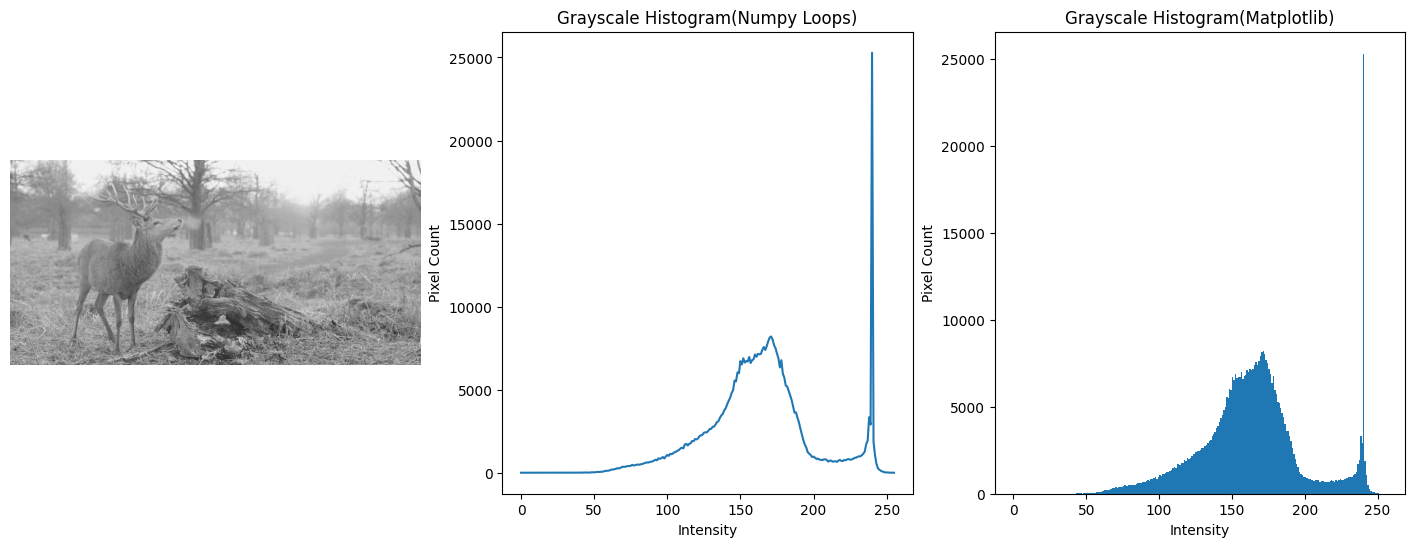

In [3]:
#A1
# Function gray_histogram : Function implementation using nupy and matplotlib only
def gray_histogram(gray_img):
  hist=np.zeros(256) # Initialization
  # pixel values iterates over the size of image(900 x 650)
  for i in range (gray_img.shape[0]):
    for j in range (gray_img.shape[1]):
      hist[gray_img[i,j]]+=1
      # increment by 1 over every iteration to get the count of pixels count at
      # a given intensity
  plt.figure(figsize=(18,6))

  # grayscale image
  plt.subplot(1,3,1)
  plt.imshow(gray_img,cmap="gray")
  plt.axis('off')

 # Histogram obtained using only numpy loops
  plt.subplot(1,3,2)
  plt.plot(range(256),hist)
  plt.xlabel('Intensity')
  plt.ylabel('Pixel Count')
  plt.title('Grayscale Histogram(Numpy Loops)')


  # Histogram obtained using matplotlib functions(just to compare the plots)
  plt.subplot(1,3,3)
  plt.hist(gray_img.ravel(),bins=256,range=(0,256))
  plt.xlabel('Intensity')
  plt.ylabel('Pixel Count')
  plt.title('Grayscale Histogram(Matplotlib)')

  plt.show()

gray_histogram(gray)



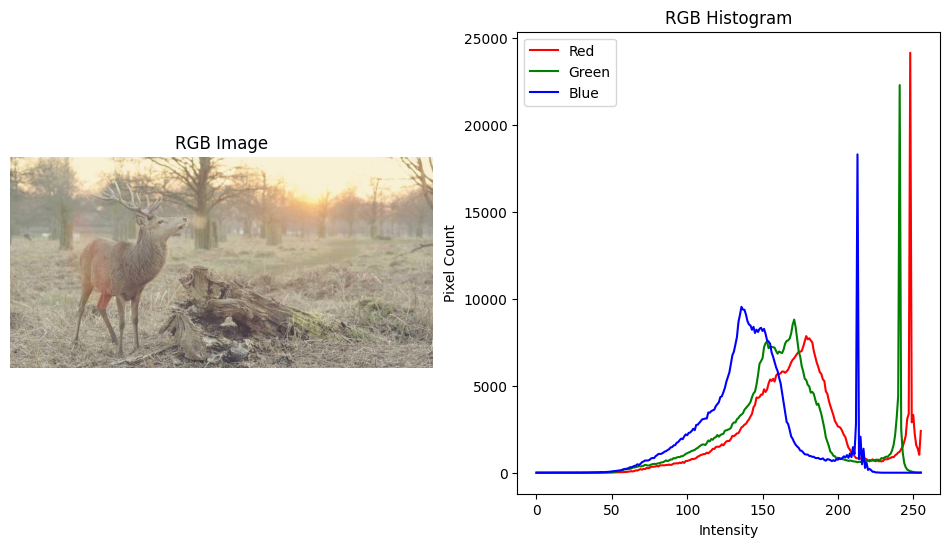

In [4]:
def rgb_histogram(img_rgb):
    hist_r = np.zeros(256)
    hist_g = np.zeros(256)
    hist_b = np.zeros(256)

    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            hist_r[img_rgb[i,j,0]] += 1
            hist_g[img_rgb[i,j,1]] += 1
            hist_b[img_rgb[i,j,2]] += 1

    plt.figure(figsize=(12,6))

    # Show image
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("RGB Image")
    plt.axis('off')

    # Show histogram
    plt.subplot(1,2,2)
    plt.plot(range(256), hist_r, color='red')
    plt.plot(range(256), hist_g, color='green')
    plt.plot(range(256), hist_b, color='blue')

    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.title('RGB Histogram')
    plt.legend(['Red','Green','Blue'])

    plt.show()

img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rgb_histogram(img_rgb)


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

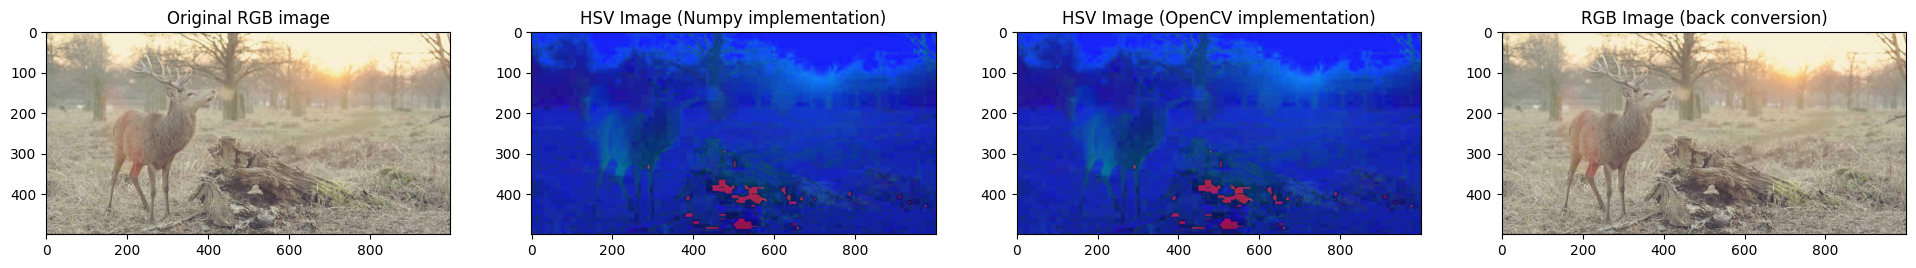

In [5]:
# Manual implementation of converting RGB image to HSV
def rgb_to_hsv(img_rgb):

  # Segregate into Red,Green and Blue Components
  r=img_rgb[:,:,0].astype(float)
  g=img_rgb[:,:,1].astype(float)
  b=img_rgb[:,:,2].astype(float)

  # Initializing h,s,v arrays
  h=np.zeros(img_rgb.shape[0:2])
  s=np.zeros(img_rgb.shape[0:2])
  v=np.zeros(img_rgb.shape[0:2])

  # Compute h,s,v values over each iteration
  for i in range (img_rgb.shape[0]):
    for j in range (img_rgb.shape[1]):
      cmax=max(r[i,j],g[i,j],b[i,j])
      cmin=min(r[i,j],g[i,j],b[i,j])
      delta=cmax-cmin

      #Hue
      if delta==0:
        h[i,j]=0
      elif cmax==r[i,j]:
        h[i,j]=60*((g[i,j]-b[i,j])/delta)
      elif cmax==g[i,j]:
        h[i,j]=60*((b[i,j]-r[i,j])/delta + 2)
      else:
        h[i,j]=60*((r[i,j]-g[i,j])/delta +4)

      if(h[i,j]<0): # Add 360 to hue if it is negative
        h[i,j]+=360

      h[i,j]/=2 # Compatible with Open-CV versions ( as 0<=hue<180)

      # Saturation
      if cmax==0:
        s[i,j]=0
      else:
        s[i,j]=(delta/cmax)*255  # Not normalized

      # Value
      v[i,j]=cmax

# Converting them to type uint8 as to make it compatible with the opencv library data type
  h=h.astype(np.uint8)
  s=s.astype(np.uint8)
  v=v.astype(np.uint8)
  img_hsv=np.stack((h,s,v),axis=-1)

  return img_hsv

img_hsv=rgb_to_hsv(img_rgb)

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.title('Original RGB image')
plt.imshow(img_rgb)


plt.subplot(1,4,2)
plt.title('HSV Image (Numpy implementation)')
plt.imshow(img_hsv)

plt.subplot(1,4,3)
img_hsv_opencv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
plt.title('HSV Image (OpenCV implementation)')
plt.imshow(img_hsv_opencv)

plt.subplot(1,4,4)
# Convert img_hsv to uint8 before passing to cvtColor
img_rgb_opencv=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
plt.title('RGB Image (back conversion)')
plt.imshow(img_rgb_opencv)

plt.show()



## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

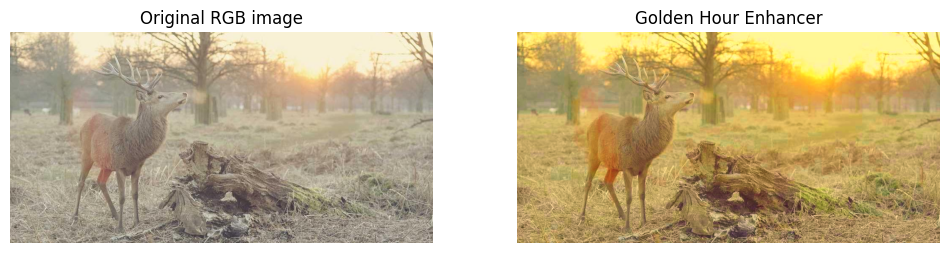

In [6]:
# Filter-1
def Golden_Hour_Enhancer(img_rgb):

  # Vibrance
  img_hsv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
  s=img_hsv[:,:,1]/255.0
  boost=1.5
  delta=(1-s)*boost
  img_hsv[:,:,1]=np.clip((s+delta*s)*255,0,255)


  #Hue-shifting
  # 15 degree shift
  shift=15*179//360
  img_hsv[:,:,0]=np.clip(img_hsv[:,:,0]+shift,0,180)

  # Gamma correction
  gamma=0.95
  img_hsv[:,:,2]=np.power(img_hsv[:,:,2]/255.0,1.0/gamma)*255
  img_rgb_=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)

  img_rgb_=img_rgb_.astype(np.float32)

  #  Add warm golden tint
  img_rgb_[:,:,0] *= 1.15
  img_rgb_[:,:,2] *= 0.9
  # Found them by trying diffrent values
  img_rgb_ = np.clip(img_rgb_, 0, 255).astype(np.uint8)

  img_rgb_=img_rgb_.astype(np.uint8)
  img_rgb_=np.clip(img_rgb_,0,255).astype(np.uint8)

  # Displaying image
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title('Original RGB image')
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('Golden Hour Enhancer')
  plt.imshow(img_rgb_)
  plt.axis('off')
  plt.show()

Golden_Hour_Enhancer(img_rgb)



Reason for using this filter:


1.   Gamma correction: Diffuse soft lighting, apply warm tint to make it appear goldenish, hue shifting to yellow-orangeish bands
2.  Works well with images at sunset/sunrise, desert/savannah/tropical regions and natural landscape views




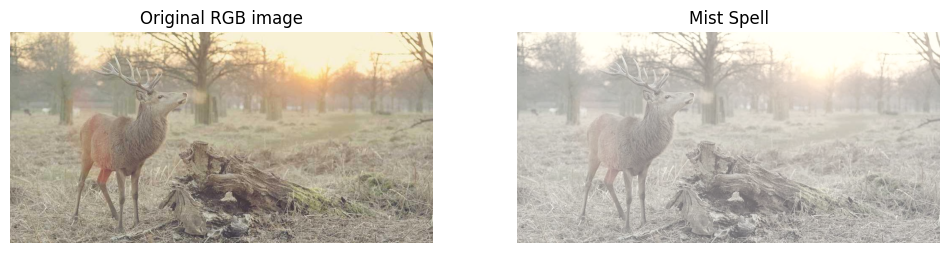

In [7]:
def Mist_Spell(img_rgb):
    # Lower Contrast and Brighten up
    img_rgb_ = cv2.convertScaleAbs(img_rgb, alpha=0.75, beta=75.0)

    # Partial Desaturation
    img_hsv = cv2.cvtColor(img_rgb_, cv2.COLOR_RGB2HSV).astype(np.float32)
    img_hsv[:,:,1] = img_hsv[:,:,1] * 0.5  # Desaturate slightly
    img_hsv = np.clip(img_hsv, 0, 255).astype(np.uint8)
    img_rgb_ = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

    # Add White Tint
    white_intensity = 0.1  # Weighted Method: took a bit help from AI to search about applying tints
    white = np.array([255, 255, 255], dtype=np.float32)
    img_rgb_ = img_rgb_.astype(np.float32)
    img_rgb_ = img_rgb_ * (1-white_intensity) + white * white_intensity
    img_rgb_ = np.clip(img_rgb_, 0, 255).astype(np.uint8)

    # Gamma-Correction
    gamma=0.9
    img_hsv[:,:,2]=np.power(img_hsv[:,:,2]/255.0,1.0/gamma)*255
    img_rgb_=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
    img_rgb_=img_rgb_.astype(np.float32)

    img_rgb_=img_rgb_.astype(np.uint8)

    # Displaying images
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title('Original RGB image')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('Mist Spell')
    plt.imshow(img_rgb_)
    plt.axis('off')
    plt.show()

Mist_Spell(img_rgb)

Reason for using this particular filter:

*    Decreasing contrast: making image soft, Increasing brightness: hazy effect; Decreasing saturation and applying white tints to decrease color intensities to make mist effect more subtle, Gamma correction to again diffuse soft lighting

*   Works well with forest/mountain landscape images, water/ reflection scenes





## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

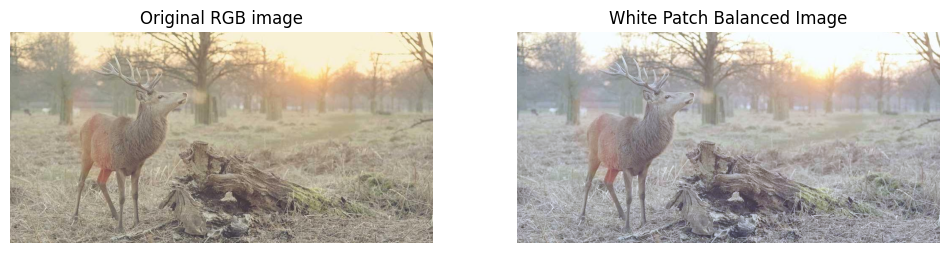

(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   0,   1, ..., 998, 999, 999]), array([1, 2, 1, ..., 2, 1, 2]))


In [8]:
def white_patch_balance(img_rgb):
  img_rgb_=img_rgb.astype(np.float32) # converting to float 32 type
  r,g,b=img_rgb_[:,:,0],img_rgb_[:,:,1],img_rgb_[:,:,2]

  # Brightest Pixel
  V=np.max(img_rgb_,axis=-1)
  idx=np.unravel_index(V.argmax(),V.shape)
  brightest_pixel=img_rgb_[idx]
  r_white,g_white,b_white=brightest_pixel[0],brightest_pixel[1],brightest_pixel[2]

  # Rescaling and Clipping
  scale_r,scale_g,scale_b=255/r_white,255/g_white,255/b_white
  r_new,g_new,b_new=r*scale_r,g*scale_g,b*scale_b
  img_rgb_=np.stack((r_new,g_new,b_new),axis=-1)
  img_wb=np.clip(img_rgb_, 0, 255).astype(np.uint8)

  #Obtaining the display for original and white balanced images
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title('Original RGB image')
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('White Patch Balanced Image')
  plt.imshow(img_wb)
  plt.axis('off')
  plt.show()

  print(np.where(img_rgb!= img_wb)) # Just to compare where all the image pixels differ

white_patch_balance(img_rgb)

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

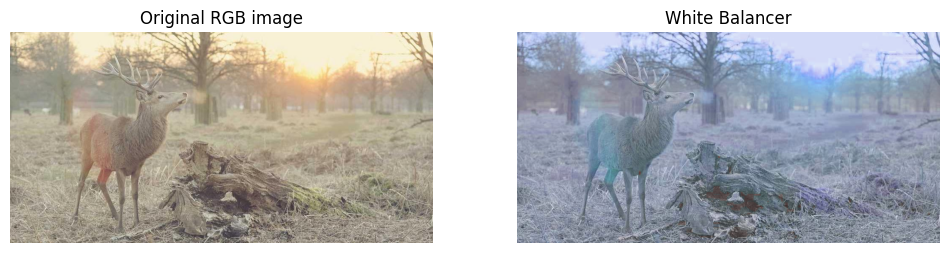

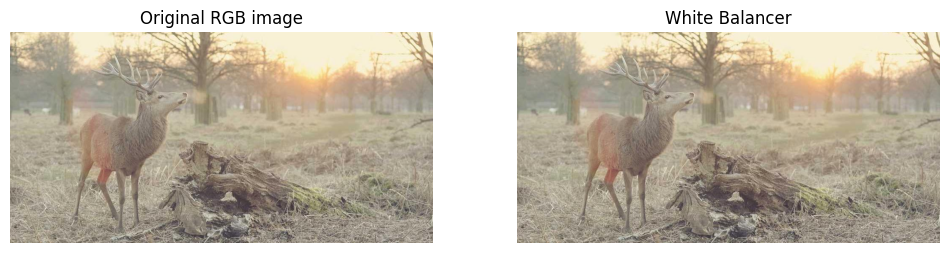

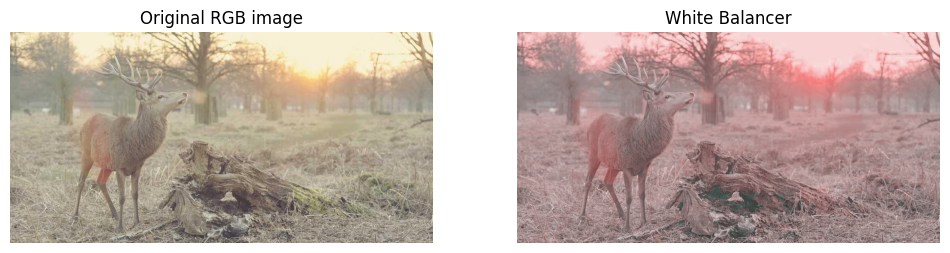

In [9]:
# Incorrect/ Dumb Approach-1 : Based on shifting hue value
def white_patch_balance(img_rgb,value):
  img_hsv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
  value=0.5-value
  h=img_hsv[:,:,0].astype(np.float32)
  shift=value*180
  h=np.clip(h+shift,0,180)
  img_hsv[:,:,0]=h
  img_hsv=img_hsv.astype(np.uint8)
  img_wb=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title('Original RGB image')
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('White Balancer')
  plt.imshow(img_wb)
  plt.axis('off')
  plt.show()

white_patch_balance(img_rgb,0.0)
white_patch_balance(img_rgb,0.5)
white_patch_balance(img_rgb,1.0)







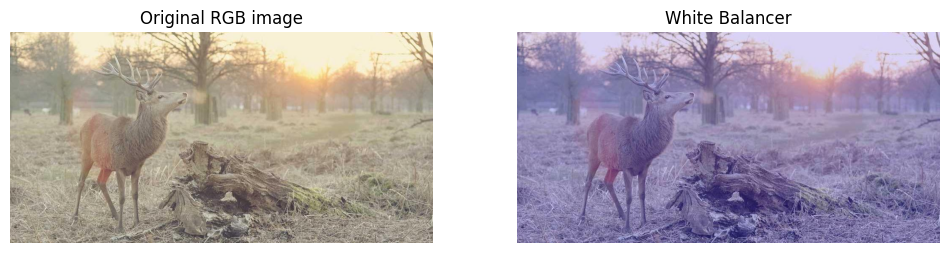

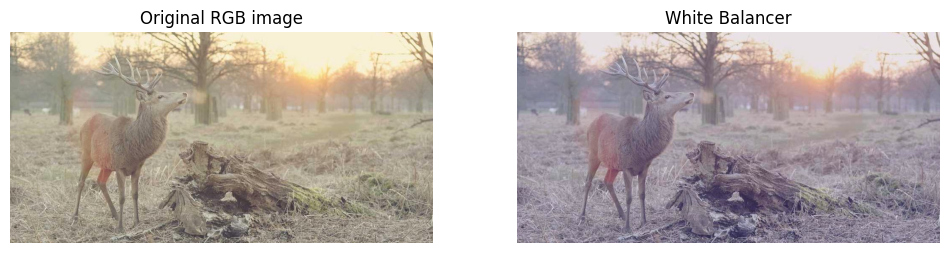

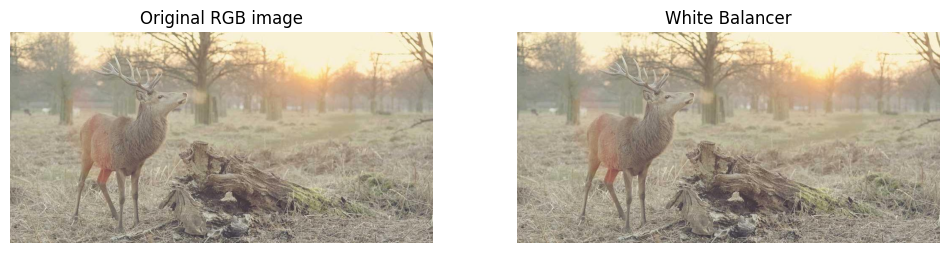

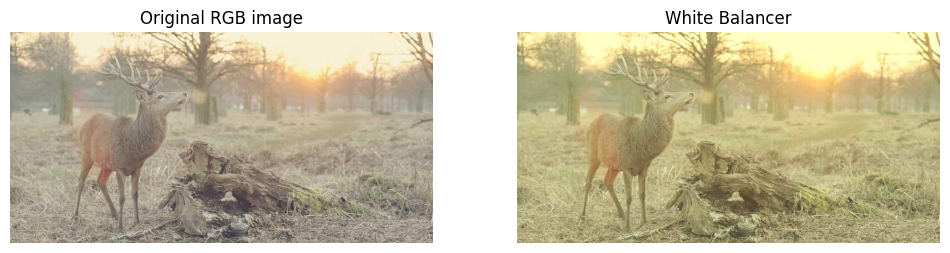

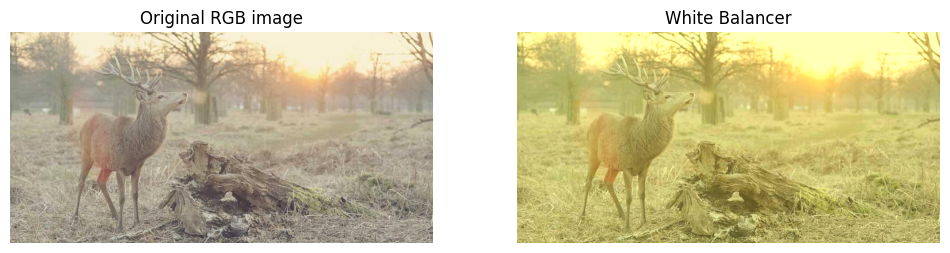

In [10]:
# Realization  for a realistic  white balance slider, we want warmer image towards yellowish(red+green)
# For colder images towards bluish
def white_balance(img_rgb, value):
  # slider value denoted by value
  img_rgb_=img_rgb.astype(np.float32) # converting to float 32 type
  r,g,b=img_rgb_[:,:,0],img_rgb_[:,:,1],img_rgb_[:,:,2]
  value = (value-0.5)*2
  r+=value*30.0
  g+=value*30.0
  b-=value*30.0
  img_rgb_=np.stack((r,g,b),axis=-1)
  img_rgb_=np.clip(img_rgb_, 0, 255).astype(np.uint8)
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title('Original RGB image')
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('White Balancer')
  plt.imshow(img_rgb_)
  plt.axis('off')
  plt.show()

white_balance(img_rgb,0.0)
white_balance(img_rgb,0.25)
white_balance(img_rgb,0.5)
white_balance(img_rgb,0.75)
white_balance(img_rgb,1.0)







While, I had established the correct approach, but the result did not appear to be quite realistic. So, I took a bit web search and consulted AI , and learned that  often  a factor called strength is employed in many standard white balance sliders, which is basically how different colors are perceived.Physically, it resembles close to a quantity called 'spectral power distribution'


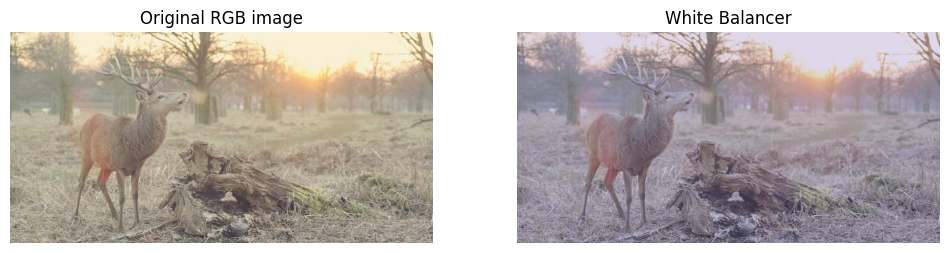

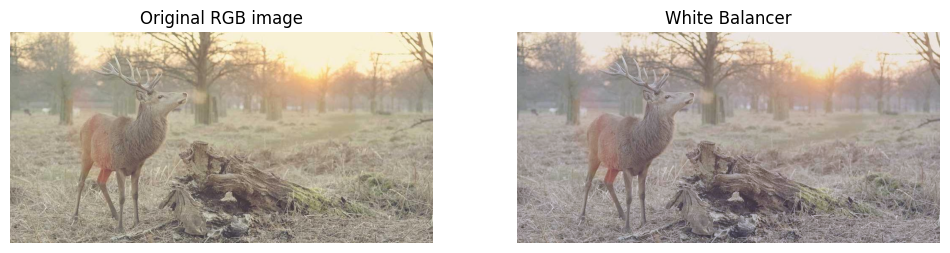

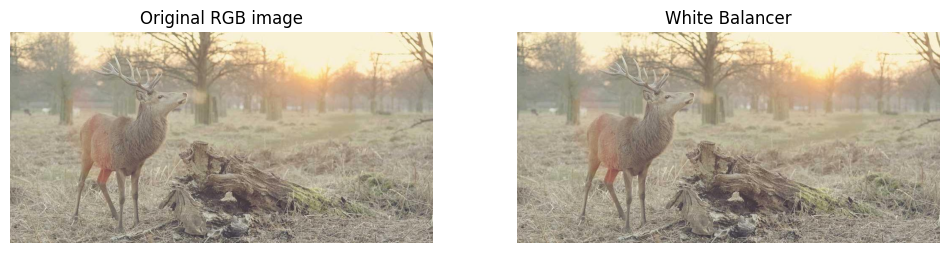

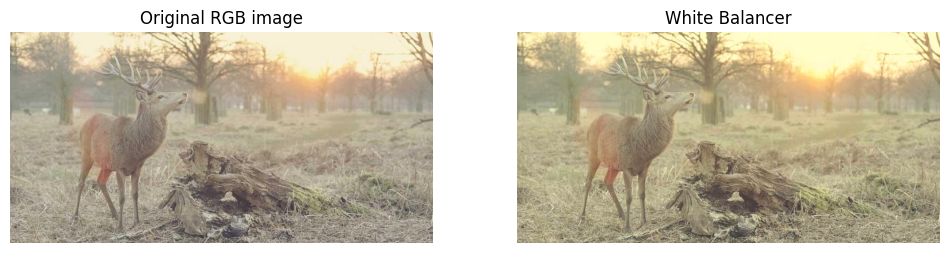

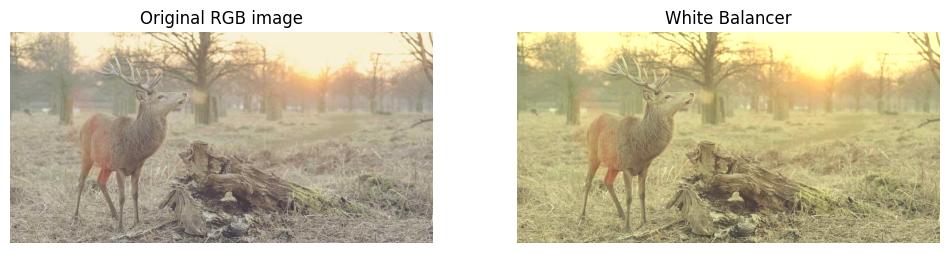

In [11]:
def white_balance(img_rgb,value):
  img_rgb_=img_rgb.astype(np.float32)
  r,g,b=img_rgb_[:,:,0],img_rgb_[:,:,1],img_rgb_[:,:,2]
  value=(value-0.5)*2
  strength=0.10
  r*=(1+value*strength)
  g*=(1+value*strength)
  b*=(1-value*strength)
  img_rgb_=np.stack((r,g,b),axis=-1)
  img_rgb_=np.clip(img_rgb_, 0, 255).astype(np.uint8)
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.title('Original RGB image')
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.title('White Balancer')
  plt.imshow(img_rgb_)
  plt.axis('off')
  plt.show()

white_balance(img_rgb,0.0)
white_balance(img_rgb,0.25)
white_balance(img_rgb,0.5)
white_balance(img_rgb,0.75)
white_balance(img_rgb,1.0)



I Really enjoyed doing the assignment,although I got frustrated at times especially for part C and part E, but it was worth the pain
